In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 가져오기

# Budesliga

## Team 데이터

In [2]:
team_path = './Bundesliga/BL_5years_Team/'
team_path_list = os.listdir(team_path)
team_path_list.sort()
team_path_list.pop(0)
team_path_list

['18_19_BL_Team.csv',
 '19_20_BL_Team.csv',
 '20_21_BL_Team.csv',
 '21_22_BL_Team.csv',
 '22_23_BL_Team.csv']

In [3]:
team_data_list = []

for path in team_path_list:
    team_data_list.append(pd.read_csv(team_path + path))

In [4]:
for data in team_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
team_data_list[3]

,Team,P,W,D,L,GF,GA,GD,Pts,Goals,...,Rating,def_Shotspg,def_Tacklespg,def_Interceptionspg,def_Foulspg,def_Offsidespg,of_Shotspg,of_ShotsOTpg,of_Dribblespg,of_Fouledpg
0,Bayern Munich,34,24,5,5,97,37,60,77,97,...,6.98,9.3,16.6,10.3,9.0,2.2,19.8,7.8,14.5,10.4
1,Borussia Dortmund,34,22,3,9,85,52,33,69,85,...,6.77,10.9,15.9,10.2,10.6,2.1,13.3,5.2,10.4,11.7
2,Bayer Leverkusen,34,19,7,8,80,47,33,64,80,...,6.77,13.4,14.2,10.6,10.7,1.9,13.5,5.6,11.8,9.7
3,RB Leipzig,34,17,7,10,72,37,35,58,72,...,6.77,10.4,14.7,10.3,10.6,1.9,12.9,5.4,10.2,12.5
4,Union Berlin,34,16,9,9,50,44,6,57,50,...,6.61,11.6,15.8,11.1,12.4,1.9,12.1,4.6,7.2,9.8
5,Freiburg,34,15,10,9,58,46,12,55,58,...,6.68,14.2,15.2,10.4,11.5,1.7,13.6,4.8,6.6,11.0
6,FC Koln,34,14,10,10,52,49,3,52,52,...,6.65,12.6,17.6,12.5,12.3,2.0,13.8,4.4,7.4,13.5
7,Mainz 05,34,13,7,14,50,45,5,46,50,...,6.64,11.3,17.0,12.9,14.6,1.9,13.8,4.6,7.9,11.4
8,Hoffenheim,34,13,7,14,58,60,-2,46,58,...,6.59,12.5,14.2,8.4,12.6,2.1,13.3,4.4,7.4,10.2
9,Borussia M.Gladbach,34,12,9,13,54,61,-7,45,52,...,6.67,14.0,17.3,9.8,10.6,2.2,14.8,5.4,10.9,13.9


## Pts 정규화

In [6]:
tmp = team_data_list[0]
mn = tmp['Pts'].min()
mx = tmp['Pts'].max()

team_data_list[0]['Pts'] = (team_data_list[0]['Pts'] - mn) / (mx - mn)
team_data_list[0]

for i in range(5):
    tmp = team_data_list[i]
    mn = tmp['Pts'].min()
    mx = tmp['Pts'].max()
    
    team_data_list[i]['Pts'] = (team_data_list[i]['Pts'] - mn) / (mx - mn)
    
# 정규화가 잘 되었는지 확인
team_data_list[0][['Team', 'Pts']]

,Team,Pts
0,Bayern Munich,1.000000
1,Borussia Dortmund,0.966102
2,RB Leipzig,0.796610
3,Bayer Leverkusen,0.661017
4,Borussia M.Gladbach,0.610169
5,Wolfsburg,0.610169
6,Eintracht Frankfurt,0.593220
7,Werder Bremen,0.576271
8,Hoffenheim,0.542373
9,Fortuna Duesseldorf,0.423729


## player 데이터

In [7]:
player_path = './Bundesliga/BL_5years_player/'
player_path_list = os.listdir(player_path)
player_path_list.sort()
player_path_list

['18_19_BL_Player.csv',
 '19_20_BL_Player.csv',
 '20_21_BL_Player.csv',
 '21_22_BL_Player.csv',
 '22_23_BL_Player.csv']

In [8]:
player_data_list = []

for path in player_path_list:
    player_data_list.append(pd.read_csv(player_path + path))

In [9]:
for data in player_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
player_data_list[3]

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Drb_off,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB
0,Robert Lewandowski,Bayern,35,FW,34,2952,35,3,2,-,...,1.4,1.1,0.6,1.6,1.6,21.6,77.4,0.1,0.4,0.1
1,Christopher Nkunku,RBL,26,"M(CLR),FW",31(3),2735,20,13,2,-,...,1.9,1.8,0.4,1.5,1.5,28.2,81.8,0.6,0.6,0.2
2,Joshua Kimmich,Bayern,29,"D(CR),DMC,M(R)",28,2478,3,11,4,-,...,0.8,1.6,-,0.6,0.6,84.2,88.0,2.4,5,0.3
3,Erling Haaland,Borussia Dortmund,23,FW,21(3),1915,22,7,3,-,...,0.5,0.6,0.6,0.7,0.7,19.2,71.3,-,-,0.1
4,Patrik Schick,Leverkusen,28,"AM(R),FW",26(1),2094,24,3,-,-,...,0.6,0.8,0.2,0.8,0.8,15.1,68.9,-,0.2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Florian Krüger,Arminia Bielefeld,25,"AM(CLR),FW",12(15),1112,1,2,-,-,...,0.3,0.3,0.1,0.3,0.3,9.9,70.1,0.1,0.2,-
288,Jan Morávek,Augsburg,34,M(C),5(12),466,-,-,1,-,...,0.3,0.1,-,0.4,0.4,10.9,70.4,-,0.6,-
289,Dickson Abiama,Greuther Fuerth,25,FW,5(19),715,-,1,3,-,...,0.3,0.5,0.6,0.4,0.4,5.5,63.6,-,-,0.1
290,Julian Green,Greuther Fuerth,28,"M(CL),FW",12(12),1052,-,-,2,-,...,0.3,1.6,-,0.2,0.2,15.5,83.4,0.4,0.7,-


## Team 값 통일

In [11]:
team_data_list[0]['Team'].unique()

array(['Bayern Munich', 'Borussia Dortmund', 'RB Leipzig',
       'Bayer Leverkusen', 'Borussia M.Gladbach', 'Wolfsburg',
       'Eintracht Frankfurt', 'Werder Bremen', 'Hoffenheim',
       'Fortuna Duesseldorf', 'Hertha Berlin', 'Mainz 05', 'Freiburg',
       'Schalke 04', 'Augsburg', 'VfB Stuttgart', 'Hannover 96',
       'Nuernberg'], dtype=object)

In [12]:
player_data_list[0]['Team'].unique()

array(['Bayern', 'Hoffenheim', 'RBL', 'Eintracht Frankfurt',
       'Borussia Dortmund', 'Borussia M.Gladbach', 'Leverkusen',
       'Schalke', 'Hertha Berlin', 'Wolfsburg', 'Werder Bremen',
       'Fortuna Duesseldorf', 'Freiburg', 'Stuttgart', 'Hannover',
       'Mainz', 'Augsburg', 'Nuernberg'], dtype=object)

In [13]:
for team in team_data_list[0]['Team'].unique():
    if team not in player_data_list[0]['Team'].unique():
        print(team)

Bayern Munich
RB Leipzig
Bayer Leverkusen
Mainz 05
Schalke 04
VfB Stuttgart
Hannover 96


In [14]:
Team_list = player_data_list[0]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Schalke':
        Team_list[j] = 'Schalke 04'
        
    elif Team_list[j] == 'Mainz':
        Team_list[j] = 'Mainz 05'
        
    elif Team_list[j] == 'Bayern':
        Team_list[j] = 'Bayern Munich'

    elif Team_list[j] == 'RBL':
        Team_list[j] = 'RB Leipzig'
        
    elif Team_list[j] == 'Leverkusen':
        Team_list[j] = 'Bayer Leverkusen'
        
    elif Team_list[j] == 'Stuttgart':
        Team_list[j] = 'VfB Stuttgart'
        
    elif Team_list[j] == 'Hannover':
        Team_list[j] = 'Hannover 96'
        
player_data_list[0]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/999082967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Bayern Munich'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/999082967.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'RB Leipzig'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/999082967.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [15]:
Team_list = player_data_list[1]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Schalke':
        Team_list[j] = 'Schalke 04'
        
    elif Team_list[j] == 'Mainz':
        Team_list[j] = 'Mainz 05'
        
    elif Team_list[j] == 'Bayern':
        Team_list[j] = 'Bayern Munich'

    elif Team_list[j] == 'RBL':
        Team_list[j] = 'RB Leipzig'
        
    elif Team_list[j] == 'Leverkusen':
        Team_list[j] = 'Bayer Leverkusen'
        
player_data_list[1]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/4103700593.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Bayern Munich'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/4103700593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'RB Leipzig'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/4103700593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [16]:
Team_list = player_data_list[2]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Schalke':
        Team_list[j] = 'Schalke 04'
        
    elif Team_list[j] == 'Mainz':
        Team_list[j] = 'Mainz 05'
        
    elif Team_list[j] == 'Bayern':
        Team_list[j] = 'Bayern Munich'

    elif Team_list[j] == 'RBL':
        Team_list[j] = 'RB Leipzig'
        
    elif Team_list[j] == 'Leverkusen':
        Team_list[j] = 'Bayer Leverkusen'
        
    elif Team_list[j] == 'Stuttgart':
        Team_list[j] = 'VfB Stuttgart'
        
    elif Team_list[j] == 'Hannover':
        Team_list[j] = 'Hannover 96'
        
player_data_list[2]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2786216658.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Bayern Munich'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2786216658.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'RB Leipzig'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2786216658.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [17]:
Team_list = player_data_list[3]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Schalke':
        Team_list[j] = 'Schalke 04'
        
    elif Team_list[j] == 'Mainz':
        Team_list[j] = 'Mainz 05'
        
    elif Team_list[j] == 'Bayern':
        Team_list[j] = 'Bayern Munich'

    elif Team_list[j] == 'RBL':
        Team_list[j] = 'RB Leipzig'
        
    elif Team_list[j] == 'Leverkusen':
        Team_list[j] = 'Bayer Leverkusen'
        
    elif Team_list[j] == 'Stuttgart':
        Team_list[j] = 'VfB Stuttgart'
        
player_data_list[3]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2932556201.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Bayern Munich'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2932556201.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'RB Leipzig'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2932556201.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [18]:
Team_list = player_data_list[4]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Schalke':
        Team_list[j] = 'Schalke 04'
        
    elif Team_list[j] == 'Mainz':
        Team_list[j] = 'Mainz 05'
        
    elif Team_list[j] == 'Bayern':
        Team_list[j] = 'Bayern Munich'

    elif Team_list[j] == 'RBL':
        Team_list[j] = 'RB Leipzig'
        
    elif Team_list[j] == 'Leverkusen':
        Team_list[j] = 'Bayer Leverkusen'
        
    elif Team_list[j] == 'Stuttgart':
        Team_list[j] = 'VfB Stuttgart'
        
player_data_list[4]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2088056268.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Bayern Munich'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2088056268.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'RB Leipzig'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2088056268.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

## Team, Player 데이터 병합

In [19]:
merged_data_list = []

for i in range(5):
    merged_data_list.append(pd.merge(player_data_list[i], team_data_list[i][['Team', 'Pts']] , on='Team', how='inner'))

In [20]:
BL_5_seasons_data = pd.concat([merged_data_list[0], merged_data_list[1], merged_data_list[2], merged_data_list[3], merged_data_list[4]])

In [21]:
BL_5_seasons_data.reset_index().drop('index', axis=1,inplace=True)

In [22]:
BL_5_seasons_data.reset_index(inplace=True)
BL_5_seasons_data.drop('index', axis=1, inplace=True)
BL_5_seasons_data

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Robert Lewandowski,Bayern Munich,35,FW,33,2959,22,7,2,-,...,1.4,0.9,1.5,1.5,22.1,77.5,-,0.6,0.2,1.000000
1,Thiago Alcântara,Bayern Munich,33,M(C),26(4),2409,2,6,5,-,...,1.1,-,0.9,0.9,83.6,91.8,0.5,7.3,0.1,1.000000
2,Joshua Kimmich,Bayern Munich,29,"D(CR),DMC,M(R)",34,3060,2,13,4,-,...,1.5,0.1,0.7,0.7,74.1,90.5,2.2,4.2,0.1,1.000000
3,Kingsley Coman,Bayern Munich,27,"M(LR),FW",17(4),1392,6,4,2,-,...,2,0.1,1.6,1.6,29.4,85.0,0.7,0.5,-,1.000000
4,James Rodríguez,Bayern Munich,32,"AM(CLR),FW",13(7),1143,7,3,2,-,...,0.8,0.3,0.6,0.6,43.9,87.1,1.6,2.4,0.2,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Mads Pedersen,Augsburg,27,"D(L),M(CL)",20(8),1840,-,-,6,-,...,0.8,-,0.5,0.5,17.3,73.8,0.3,0.9,-,0.119048
1392,Elvis Rexhbeçaj,Augsburg,26,M(C),30(1),2536,-,-,6,-,...,1.6,-,0.4,0.4,28.6,69.8,-,1,-,0.119048
1393,Robert Gumny,Augsburg,25,D(CLR),23(6),2021,1,2,5,1,...,0.6,-,0.4,0.4,20.7,66.7,0.1,1.2,-,0.119048
1394,Maximilian Bauer,Augsburg,24,D(C),20(7),1845,-,1,8,-,...,0.9,-,0.2,0.2,27.7,73.1,-,2,-,0.119048


## Position 전처리

In [23]:
BL_5_seasons_data['Position'].unique()

array([' FW', ' M(C)', ' D(CR),DMC,M(R)', ' M(LR),FW', ' AM(CLR),FW',
       ' M(CLR),FW', ' D(C)', ' D(CL),M(CL)', ' M(CR)', ' D(CR)',
       ' D(C),M(C)', ' AM(CL),FW', ' GK', ' AM(LR),FW', ' D(C),M(CL)',
       ' D(R),M(LR)', ' D(L),M(L)', ' M(LR)', ' D(CR),M(C)',
       ' D(CL),M(L)', ' AM(CR),FW', ' M(CLR)', ' D(CLR),M(R)',
       ' D(CR),M(R)', ' DMC', ' D(R),M(CR)', ' D(CR),DMC', ' AM(R),FW',
       ' D(CR),M(CR)', ' D(R),M(R)', ' D(CL)', ' D(L),DMC,M(L)',
       ' AM(CLR)', ' D(LR),M(R)', ' D(L),M(CL)', ' D(CLR),DMC',
       ' D(C),DMC', ' D(CLR)', ' D(R),M(CLR),FW', ' D(LR),M(CLR)',
       ' M(CR),FW', ' D(C),M(CLR)', ' M(C),FW', ' D(R),M(CLR)',
       ' D(CLR),DMC,M(R)', ' M(CL)', ' AM(C),FW', ' D(R),DMC,M(R)',
       ' AM(LR)', ' D(L),M(CR)', ' D(LR),M(LR)', ' D(CLR),DMC,M(LR)',
       ' D(L),M(LR)', ' D(R),M(C)', ' AM(L),FW', ' D(CL),DMC,M(L)',
       ' D(R)', ' D(LR)', ' D(L)', ' AM(CL)', ' AM(CR)', ' D(L),M(CLR)',
       ' M(R)', ' D(LR),DMC,M(LR)', ' D(CLR),M(LR)', ' D(R

In [24]:
# 전체 데이터에서 position 데이터만 추출

position_df = BL_5_seasons_data[['Position']]
position_df

,Position
0,FW
1,M(C)
2,"D(CR),DMC,M(R)"
3,"M(LR),FW"
4,"AM(CLR),FW"
...,...
1391,"D(L),M(CL)"
1392,M(C)
1393,D(CLR)
1394,D(C)


In [25]:
# 리스트 형태로 변환

tmp_li = position_df['Position'].tolist()
tmp_li

[' FW',
 ' M(C)',
 ' D(CR),DMC,M(R)',
 ' M(LR),FW',
 ' AM(CLR),FW',
 ' M(CLR),FW',
 ' D(C)',
 ' AM(CLR),FW',
 ' D(CL),M(CL)',
 ' M(CR)',
 ' D(CR)',
 ' D(C),M(C)',
 ' D(CR)',
 ' AM(CL),FW',
 ' M(CR)',
 ' GK',
 ' M(C)',
 ' AM(LR),FW',
 ' AM(CLR),FW',
 ' AM(CLR),FW',
 ' D(C),M(CL)',
 ' D(R),M(LR)',
 ' D(L),M(L)',
 ' D(CR)',
 ' D(C)',
 ' GK',
 ' FW',
 ' M(LR)',
 ' M(CLR),FW',
 ' D(CR),M(C)',
 ' D(CL),M(L)',
 ' D(C)',
 ' AM(CR),FW',
 ' D(C)',
 ' AM(CLR),FW',
 ' M(CLR)',
 ' AM(CLR),FW',
 ' D(CLR),M(R)',
 ' D(CR),M(R)',
 ' M(CLR),FW',
 ' GK',
 ' DMC',
 ' D(R),M(CR)',
 ' D(CR),DMC',
 ' AM(CL),FW',
 ' AM(R),FW',
 ' FW',
 ' M(LR),FW',
 ' FW',
 ' AM(CLR),FW',
 ' D(CR),M(CR)',
 ' D(R),M(R)',
 ' GK',
 ' M(CLR)',
 ' D(C)',
 ' D(CL)',
 ' DMC',
 ' M(CLR)',
 ' D(L),DMC,M(L)',
 ' AM(CLR)',
 ' D(CR),M(R)',
 ' M(CLR),FW',
 ' DMC',
 ' D(C),M(C)',
 ' D(LR),M(R)',
 ' D(L),M(CL)',
 ' M(CLR),FW',
 ' AM(R),FW',
 ' D(CL)',
 ' D(CL)',
 ' M(CLR),FW',
 ' D(CLR),DMC',
 ' D(C),DMC',
 ' GK',
 ' AM(CLR),FW',
 ' AM(CLR)

In [26]:
# 포지션이 여러 개인 경우 하나의 포지션만 남긴다.

for i in range(len(tmp_li)):
    tmp = tmp_li[i]
    if ',' in tmp:
        tmp_li[i] = tmp.split(',')[0]

In [27]:
tmp = pd.DataFrame(tmp_li)
tmp.columns = ['Position']
tmp

,Position
0,FW
1,M(C)
2,D(CR)
3,M(LR)
4,AM(CLR)
...,...
1391,D(L)
1392,M(C)
1393,D(CLR)
1394,D(C)


In [28]:
# 전체 데이터에 새로운 포지션 값 적용

BL_5_seasons_data['Position'] = tmp['Position']
BL_5_seasons_data['Position'] # 변경이 되었는지 확인

0             FW
1           M(C)
2          D(CR)
3          M(LR)
4        AM(CLR)
          ...   
1391        D(L)
1392        M(C)
1393      D(CLR)
1394        D(C)
1395     AM(CLR)
Name: Position, Length: 1396, dtype: object

In [29]:
# unique값 확인
# 공백이 있는 경우 같은 포지션도 다르게 판단 -> 공백을 지워준다.

tmp_li = BL_5_seasons_data['Position'].tolist()
tmp_li

[' FW',
 ' M(C)',
 ' D(CR)',
 ' M(LR)',
 ' AM(CLR)',
 ' M(CLR)',
 ' D(C)',
 ' AM(CLR)',
 ' D(CL)',
 ' M(CR)',
 ' D(CR)',
 ' D(C)',
 ' D(CR)',
 ' AM(CL)',
 ' M(CR)',
 ' GK',
 ' M(C)',
 ' AM(LR)',
 ' AM(CLR)',
 ' AM(CLR)',
 ' D(C)',
 ' D(R)',
 ' D(L)',
 ' D(CR)',
 ' D(C)',
 ' GK',
 ' FW',
 ' M(LR)',
 ' M(CLR)',
 ' D(CR)',
 ' D(CL)',
 ' D(C)',
 ' AM(CR)',
 ' D(C)',
 ' AM(CLR)',
 ' M(CLR)',
 ' AM(CLR)',
 ' D(CLR)',
 ' D(CR)',
 ' M(CLR)',
 ' GK',
 ' DMC',
 ' D(R)',
 ' D(CR)',
 ' AM(CL)',
 ' AM(R)',
 ' FW',
 ' M(LR)',
 ' FW',
 ' AM(CLR)',
 ' D(CR)',
 ' D(R)',
 ' GK',
 ' M(CLR)',
 ' D(C)',
 ' D(CL)',
 ' DMC',
 ' M(CLR)',
 ' D(L)',
 ' AM(CLR)',
 ' D(CR)',
 ' M(CLR)',
 ' DMC',
 ' D(C)',
 ' D(LR)',
 ' D(L)',
 ' M(CLR)',
 ' AM(R)',
 ' D(CL)',
 ' D(CL)',
 ' M(CLR)',
 ' D(CLR)',
 ' D(C)',
 ' GK',
 ' AM(CLR)',
 ' AM(CLR)',
 ' M(CLR)',
 ' M(CLR)',
 ' D(CLR)',
 ' GK',
 ' AM(CLR)',
 ' D(R)',
 ' D(CR)',
 ' M(C)',
 ' D(L)',
 ' D(CR)',
 ' M(C)',
 ' D(R)',
 ' D(C)',
 ' M(LR)',
 ' D(LR)',
 ' AM(CLR)',
 ' M(

In [30]:
# 공백 삭제

for i in range(len(tmp_li)):
    tmp_li[i] = tmp_li[i].replace(' ', '')
tmp_li

['FW',
 'M(C)',
 'D(CR)',
 'M(LR)',
 'AM(CLR)',
 'M(CLR)',
 'D(C)',
 'AM(CLR)',
 'D(CL)',
 'M(CR)',
 'D(CR)',
 'D(C)',
 'D(CR)',
 'AM(CL)',
 'M(CR)',
 'GK',
 'M(C)',
 'AM(LR)',
 'AM(CLR)',
 'AM(CLR)',
 'D(C)',
 'D(R)',
 'D(L)',
 'D(CR)',
 'D(C)',
 'GK',
 'FW',
 'M(LR)',
 'M(CLR)',
 'D(CR)',
 'D(CL)',
 'D(C)',
 'AM(CR)',
 'D(C)',
 'AM(CLR)',
 'M(CLR)',
 'AM(CLR)',
 'D(CLR)',
 'D(CR)',
 'M(CLR)',
 'GK',
 'DMC',
 'D(R)',
 'D(CR)',
 'AM(CL)',
 'AM(R)',
 'FW',
 'M(LR)',
 'FW',
 'AM(CLR)',
 'D(CR)',
 'D(R)',
 'GK',
 'M(CLR)',
 'D(C)',
 'D(CL)',
 'DMC',
 'M(CLR)',
 'D(L)',
 'AM(CLR)',
 'D(CR)',
 'M(CLR)',
 'DMC',
 'D(C)',
 'D(LR)',
 'D(L)',
 'M(CLR)',
 'AM(R)',
 'D(CL)',
 'D(CL)',
 'M(CLR)',
 'D(CLR)',
 'D(C)',
 'GK',
 'AM(CLR)',
 'AM(CLR)',
 'M(CLR)',
 'M(CLR)',
 'D(CLR)',
 'GK',
 'AM(CLR)',
 'D(R)',
 'D(CR)',
 'M(C)',
 'D(L)',
 'D(CR)',
 'M(C)',
 'D(R)',
 'D(C)',
 'M(LR)',
 'D(LR)',
 'AM(CLR)',
 'M(CLR)',
 'M(CR)',
 'M(C)',
 'DMC',
 'D(CR)',
 'D(C)',
 'D(CL)',
 'M(CLR)',
 'M(CLR)',
 'D(C)',

In [31]:
tmp = pd.DataFrame(tmp_li, columns=['Position'])
tmp

,Position
0,FW
1,M(C)
2,D(CR)
3,M(LR)
4,AM(CLR)
...,...
1391,D(L)
1392,M(C)
1393,D(CLR)
1394,D(C)


In [32]:
# 원래 데이터에 적용

BL_5_seasons_data['Position'] = tmp

In [33]:
BL_5_seasons_data['Position'].unique()

array(['FW', 'M(C)', 'D(CR)', 'M(LR)', 'AM(CLR)', 'M(CLR)', 'D(C)',
       'D(CL)', 'M(CR)', 'AM(CL)', 'GK', 'AM(LR)', 'D(R)', 'D(L)',
       'AM(CR)', 'D(CLR)', 'DMC', 'AM(R)', 'D(LR)', 'M(CL)', 'AM(C)',
       'AM(L)', 'M(R)', 'Forward', 'M(L)'], dtype=object)

## Position 구분
### FW, AM, M, M, DM, D, GK

In [34]:
position_li = BL_5_seasons_data['Position'].unique().tolist()
position_li

['FW',
 'M(C)',
 'D(CR)',
 'M(LR)',
 'AM(CLR)',
 'M(CLR)',
 'D(C)',
 'D(CL)',
 'M(CR)',
 'AM(CL)',
 'GK',
 'AM(LR)',
 'D(R)',
 'D(L)',
 'AM(CR)',
 'D(CLR)',
 'DMC',
 'AM(R)',
 'D(LR)',
 'M(CL)',
 'AM(C)',
 'AM(L)',
 'M(R)',
 'Forward',
 'M(L)']

In [35]:
tmp_li = BL_5_seasons_data['Position'].tolist()

for i in range(BL_5_seasons_data.shape[0]):
    pos_tmp = tmp_li[i]
    if '(' in pos_tmp:
        pos_tmp_li = pos_tmp.split('(')
        tmp_li[i] = pos_tmp_li[0]
        
    if tmp_li[i] == 'Forward':
        tmp_li[i] = 'FW'
        
    elif tmp_li[i] == 'DMC':
        tmp_li[i] = 'DM'
        
    elif tmp_li[i] == 'Midfielder':
        tmp_li[i] = 'M'

In [36]:
# 원본 데이터에 적용

BL_5_seasons_data['Position'] = pd.DataFrame(tmp_li, columns=['Position'])

In [37]:
BL_5_seasons_data['Position'].unique()

array(['FW', 'M', 'D', 'AM', 'GK', 'DM'], dtype=object)

## Apps 전처리

In [38]:
# Apps -> 출전횟수
# 교체 출전의 경우 괄호에 있다.
# 그냥 합쳐준다.
apps_df = BL_5_seasons_data['Apps']
apps_df.head()

0       33
1    26(4)
2       34
3    17(4)
4    13(7)
Name: Apps, dtype: object

In [39]:
tmp_li = apps_df.tolist()
tmp_li

['33',
 '26(4)',
 '34',
 '17(4)',
 '13(7)',
 '28(4)',
 '20(1)',
 '21(9)',
 '29(2)',
 '23(7)',
 '29(2)',
 '16(5)',
 '19(1)',
 '10(15)',
 '4(13)',
 '26',
 '24(2)',
 '20(8)',
 '25(3)',
 '28(2)',
 '27(3)',
 '28(1)',
 '29(1)',
 '16(1)',
 '20(5)',
 '33',
 '15(15)',
 '5(18)',
 '13(8)',
 '28',
 '27(1)',
 '23(1)',
 '27(4)',
 '27(1)',
 '29(1)',
 '25(2)',
 '14(6)',
 '22(4)',
 '14(5)',
 '26(4)',
 '33',
 '24(2)',
 '20(9)',
 '10(9)',
 '9(16)',
 '4(13)',
 '23(6)',
 '33(1)',
 '25(7)',
 '23(5)',
 '28',
 '34',
 '33',
 '17(11)',
 '17',
 '24(3)',
 '28',
 '16(13)',
 '7(16)',
 '26(8)',
 '20',
 '27',
 '27(3)',
 '32(1)',
 '19(2)',
 '17(6)',
 '19(7)',
 '11(15)',
 '15(2)',
 '27(1)',
 '9(11)',
 '25',
 '16(2)',
 '32',
 '16(8)',
 '9(9)',
 '33',
 '19(2)',
 '30',
 '34',
 '28(6)',
 '21(6)',
 '27',
 '13(5)',
 '30(2)',
 '26(3)',
 '25(7)',
 '15(2)',
 '21(10)',
 '10(14)',
 '11(7)',
 '32(2)',
 '30(3)',
 '33(1)',
 '22(2)',
 '16(5)',
 '18(2)',
 '33',
 '25(3)',
 '21(8)',
 '14(5)',
 '25(2)',
 '22(8)',
 '11(16)',
 '13(5)',
 '3

In [40]:
# ()안에 있는 숫자를 그냥 더해줌
# Apps값을 int형으로 변환

for i in range(1396):
    if '(' in tmp_li[i]:
        tmp_li[i] = tmp_li[i].split('(')
        tmp_li[i] = [tmp_li[i][0], tmp_li[i][1].replace(')', '')]
        tmp_li[i] = int(tmp_li[i][0]) + int(tmp_li[i][1])
    else:
        tmp_li[i] = int(tmp_li[i])
    
tmp_df = pd.DataFrame(tmp_li, columns=['Apps'])
tmp_df

,Apps
0,33
1,30
2,34
3,21
4,20
...,...
1391,28
1392,31
1393,29
1394,27


In [41]:
BL_5_seasons_data['Apps'] = tmp_df
BL_5_seasons_data[['Apps']]

,Apps
0,33
1,30
2,34
3,21
4,20
...,...
1391,28
1392,31
1393,29
1394,27


## 결측치 처리

In [42]:
# Apps

tmp = BL_5_seasons_data['Apps'].tolist()
for i in range(len(tmp)):
    tmp[i] = int(tmp[i])
    
BL_5_seasons_data['Apps'] = pd.DataFrame(tmp, columns=['Apps'])

In [43]:
# Goals

tmp = BL_5_seasons_data['Goals'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
BL_5_seasons_data['Goals'] = pd.DataFrame(tmp, columns=['Goals'])

In [44]:
# Assists

tmp = BL_5_seasons_data['Assists'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
BL_5_seasons_data['Assists'] = pd.DataFrame(tmp, columns=['Assists'])

In [45]:
# Yellow

tmp = BL_5_seasons_data['Yellow'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
BL_5_seasons_data['Yellow'] = pd.DataFrame(tmp, columns=['Yellow'])

In [46]:
# Red

tmp = BL_5_seasons_data['Red'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
BL_5_seasons_data['Red'] = pd.DataFrame(tmp, columns=['Red'])

In [47]:
# SpG

tmp = BL_5_seasons_data['SpG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['SpG'] = pd.DataFrame(tmp, columns=['SpG'])

In [48]:
# Aerialswon

tmp = BL_5_seasons_data['Aerialswon'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Aerialswon'] = pd.DataFrame(tmp, columns=['Aerialswon'])

In [49]:
# MotM

tmp = BL_5_seasons_data['MotM'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
BL_5_seasons_data['MotM'] = pd.DataFrame(tmp, columns=['MotM'])

In [50]:
# Tackles

tmp = BL_5_seasons_data['Tackles'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Tackles'] = pd.DataFrame(tmp, columns=['Tackles'])

In [51]:
# Inter 

tmp = BL_5_seasons_data['Inter'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Inter'] = pd.DataFrame(tmp, columns=['Inter'])

In [52]:
# Fouls

tmp = BL_5_seasons_data['Fouls'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Fouls'] = pd.DataFrame(tmp, columns=['Fouls'])

In [53]:
# Offsides

tmp = BL_5_seasons_data['Offsides'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Offsides'] = pd.DataFrame(tmp, columns=['Offsides'])

In [54]:
# Clear

tmp = BL_5_seasons_data['Clear'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Clear'] = pd.DataFrame(tmp, columns=['Clear'])

In [55]:
# Drb_def

tmp = BL_5_seasons_data['Drb_def'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Drb_def'] = pd.DataFrame(tmp, columns=['Drb_def'])

In [56]:
# Blocks

tmp = BL_5_seasons_data['Blocks'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Blocks'] = pd.DataFrame(tmp, columns=['Blocks'])

In [57]:
# OwnG

tmp = BL_5_seasons_data['OwnG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
BL_5_seasons_data['OwnG'] = pd.DataFrame(tmp, columns=['OwnG'])

In [58]:
# Drb_off

tmp = BL_5_seasons_data['Drb_off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Drb_off'] = pd.DataFrame(tmp, columns=['Drb_off'])

In [59]:
# Fouled

tmp = BL_5_seasons_data['Fouled'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Fouled'] = pd.DataFrame(tmp, columns=['Fouled'])

In [60]:
# Off

tmp = BL_5_seasons_data['Off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Off'] = pd.DataFrame(tmp, columns=['Off'])

In [61]:
# Disp

tmp = BL_5_seasons_data['Disp'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Disp'] = pd.DataFrame(tmp, columns=['Disp'])

In [62]:
# UnsTch

tmp = BL_5_seasons_data['UnsTch'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['UnsTch'] = pd.DataFrame(tmp, columns=['UnsTch'])

In [63]:
# Crosses

tmp = BL_5_seasons_data['Crosses'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['Crosses'] = pd.DataFrame(tmp, columns=['Crosses'])

In [64]:
# LonB

tmp = BL_5_seasons_data['LonB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['LonB'] = pd.DataFrame(tmp, columns=['LonB'])

In [65]:
# ThrB

tmp = BL_5_seasons_data['ThrB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
BL_5_seasons_data['ThrB'] = pd.DataFrame(tmp, columns=['ThrB'])

## 포지션별 df 생성

In [66]:
BL_FW_df = BL_5_seasons_data[BL_5_seasons_data['Position'] == 'FW']
BL_FW_df.shape
#FW_player_df.to_csv('BL_FW_Player.csv', encoding='utf-8-sig')

(86, 34)

In [67]:
BL_AM_df = BL_5_seasons_data[BL_5_seasons_data['Position'] == 'AM']
BL_AM_df.shape
#AM_player_df.to_csv('BL_AM_Player.csv', encoding='utf-8-sig')

(259, 34)

In [68]:
BL_M_df = BL_5_seasons_data[BL_5_seasons_data['Position'] == 'M']
BL_M_df.shape
#M_player_df.to_csv('BL_M_Player.csv', encoding='utf-8-sig')

(304, 34)

In [69]:
BL_DM_df = BL_5_seasons_data[BL_5_seasons_data['Position'] == 'DM']
BL_DM_df.shape
#DM_player_df.to_csv('BL_DM_Player.csv', encoding='utf-8-sig')

(50, 34)

In [70]:
BL_D_df = BL_5_seasons_data[BL_5_seasons_data['Position'] == 'D']
BL_D_df.shape
#D_player_df.to_csv('BL_D_Player.csv', encoding='utf-8-sig')

(608, 34)

In [71]:
BL_GK_df = BL_5_seasons_data[BL_5_seasons_data['Position'] == 'GK']
BL_GK_df.shape
#GK_player_df.to_csv('BL_GK_Player.csv', encoding='utf-8-sig')

(89, 34)

# EPL 데이터

## Team 데이터

In [72]:
team_path = './EPL/EPL_5years_Team/'
team_path_list = os.listdir(team_path)
team_path_list.sort()
team_path_list.pop(0)
team_path_list

['18_19_EPL_Team.csv',
 '19_20_EPL_Team.csv',
 '20_21_EPL_Team.csv',
 '21_22_EPL_Team.csv',
 '22_23_EPL_Team.csv']

In [73]:
team_data_list = []

for path in team_path_list:
    team_data_list.append(pd.read_csv(team_path + path))

In [74]:
for data in team_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [75]:
team_data_list[3]

,Team,P,W,D,L,GF,GA,GD,Pts,Goals,...,Rating,def_Shotspg,def_Tacklespg,def_Interceptionspg,def_Foulspg,def_Offsidespg,of_Shotspg,of_ShotsOTpg,of_Dribblespg,of_Fouledpg
0,Manchester City,38,29,6,3,99,26,73,93,99,...,7.12,6.2,13.1,7.3,8.4,1.7,18.8,6.7,11.2,8.7
1,Liverpool,38,28,8,2,94,26,68,92,94,...,7.05,7.8,14.6,9.0,9.6,1.7,19.2,6.7,9.0,7.5
2,Chelsea,38,21,11,6,76,33,43,74,76,...,6.92,9.0,16.3,9.1,10.8,1.8,15.6,5.6,9.6,10.3
3,Tottenham,38,22,5,11,69,40,29,71,69,...,6.87,12.9,15.3,9.3,10.1,1.6,12.8,5.2,9.7,10.5
4,Arsenal,38,22,3,13,61,48,13,69,61,...,6.71,11.2,14.2,7.8,9.6,1.7,15.5,5.2,8.4,9.4
5,Manchester United,38,16,10,12,57,57,0,58,57,...,6.71,13.4,15.4,8.9,10.4,2.3,13.4,4.9,9.7,8.4
6,West Ham,38,16,8,14,60,51,9,56,60,...,6.75,14.4,14.1,9.8,8.5,1.6,11.8,4.1,8.1,7.3
7,Leicester,38,14,10,14,62,59,3,52,62,...,6.70,14.9,18.2,9.7,9.4,1.6,11.4,4.4,7.8,10.4
8,Brighton,38,12,15,11,42,44,-2,51,42,...,6.70,12.5,17.6,9.4,10.3,1.4,12.9,4.0,8.3,9.3
9,Wolves,38,15,6,17,38,43,-5,51,38,...,6.69,13.4,17.7,10.2,9.6,1.6,10.6,3.6,11.8,8.8


In [76]:
tmp = team_data_list[0]
mn = tmp['Pts'].min()
mx = tmp['Pts'].max()

team_data_list[0]['Pts'] = (team_data_list[0]['Pts'] - mn) / (mx - mn)
team_data_list[0]

for i in range(5):
    tmp = team_data_list[i]
    mn = tmp['Pts'].min()
    mx = tmp['Pts'].max()
    
    team_data_list[i]['Pts'] = (team_data_list[i]['Pts'] - mn) / (mx - mn)
    
# 정규화가 잘 되었는지 확인
team_data_list[0][['Team', 'Pts']]

,Team,Pts
0,Manchester City,1.000000
1,Liverpool,0.987805
2,Chelsea,0.682927
3,Tottenham,0.670732
4,Arsenal,0.658537
5,Manchester United,0.609756
6,Wolves,0.500000
7,Everton,0.463415
8,Leicester,0.439024
9,West Ham,0.439024


## Player 데이터

In [77]:
player_path = './EPL/EPL_5years_player/'
player_path_list = os.listdir(player_path)
player_path_list.sort()
player_path_list.pop(0)
player_path_list

['18_19_EPL_Player.csv',
 '19_20_EPL_Player.csv',
 '20_21_EPL_Player.csv',
 '21_22_EPL_Player.csv',
 '22_23_EPL_Player.csv']

In [78]:
player_data_list = []

for path in player_path_list:
    player_data_list.append(pd.read_csv(player_path + path))

In [79]:
for data in player_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
player_data_list[3]

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Drb_off,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB
0,Kevin De Bruyne,Man City,32,"M(CLR),FW",25(5),2205,15,8,2,-,...,1,0.9,0.1,0.7,0.7,45.3,82.5,1,2.4,0.3
1,Mohamed Salah,Liverpool,31,"AM(CLR),FW",30(5),2763,23,13,1,-,...,1.5,0.7,0.3,2.3,2.3,30.8,79.9,0.2,0.5,0.3
2,Son Heung-Min,Tottenham,31,"M(CLR),FW",35,2976,23,7,2,-,...,1.5,1,0.5,1.2,1.2,28.3,86.5,1.2,0.5,0.1
3,Trent Alexander-Arnold,Liverpool,25,"D(R),DMC,M(R)",32,2854,2,12,2,-,...,0.6,0.2,0.3,0.6,0.6,67.3,78.1,2.6,6.3,0.3
4,Harry Kane,Tottenham,30,"AM(C),FW",36(1),3187,17,9,5,-,...,1.5,1.4,0.4,1.6,1.6,23.2,69.9,0.2,1.7,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Nikola Vlasic,West Ham,26,"AM(CLR),FW",6(13),555,1,-,-,-,...,0.5,0.8,0.2,0.5,0.5,10.7,80.8,0.1,0.2,-
295,Ashley Barnes,Burnley,34,"AM(CL),FW",8(15),803,1,-,4,-,...,0.2,0.5,0.4,1,1,8.3,63.7,-,0.1,-
296,Salomón Rondón,Everton,34,FW,8(12),783,1,1,3,1,...,0.2,0.2,0.3,0.5,0.5,9.3,62.4,0.1,0.2,-
297,Andrii Yarmolenko,West Ham,34,"AM(CR),FW",1(18),304,1,-,1,-,...,0.2,0.2,0.2,0.1,0.1,5.3,77.2,0.1,0.1,-


## Team 값 통일

In [81]:
team_data_list[0]['Team'].unique()

array(['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham', 'Arsenal',
       'Manchester United', 'Wolves', 'Everton', 'Leicester', 'West Ham',
       'Watford', 'Crystal Palace', 'Newcastle', 'Bournemouth', 'Burnley',
       'Southampton', 'Brighton', 'Cardiff', 'Fulham', 'Huddersfield'],
      dtype=object)

In [82]:
player_data_list[0]['Team'].unique()

array(['Chelsea', 'Man City', 'Liverpool', 'Tottenham', 'Everton',
       'Leicester', 'Man Utd', 'Newcastle', 'Crystal Palace', 'West Ham',
       'Arsenal', 'Cardiff', 'Watford', 'Wolves', 'Burnley', 'Brighton',
       'Bournemouth', 'Huddersfield', 'Southampton', 'Fulham'],
      dtype=object)

In [83]:
for team in team_data_list[0]['Team'].unique():
    if team not in player_data_list[0]['Team'].unique():
        print(team)

Manchester City
Manchester United


In [84]:
Team_list = player_data_list[0]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Man City':
        Team_list[j] = 'Manchester City'
        
    elif Team_list[j] == 'Man Utd':
        Team_list[j] = 'Manchester United'
        
player_data_list[0]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/720122279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester City'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/720122279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester United'


In [85]:
for team in team_data_list[0]['Team'].unique():
    if team not in player_data_list[0]['Team'].unique():
        print(team)

In [86]:
for team in team_data_list[1]['Team'].unique():
    if team not in player_data_list[1]['Team'].unique():
        print(team)

Manchester City
Manchester United
Sheffield United


In [87]:
player_data_list[1]['Team'].unique()

array(['Man City', 'Leicester', 'Wolves', 'Liverpool', 'Man Utd',
       'Tottenham', 'Chelsea', 'West Ham', 'Newcastle', 'Aston Villa',
       'Everton', 'Burnley', 'Southampton', 'Norwich', 'Arsenal',
       'Bournemouth', 'Watford', 'Crystal Palace', 'Sheff Utd',
       'Brighton'], dtype=object)

In [88]:
Team_list = player_data_list[1]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Man City':
        Team_list[j] = 'Manchester City'
        
    elif Team_list[j] == 'Man Utd':
        Team_list[j] = 'Manchester United'
        
    elif Team_list[j] == 'Sheff Utd':
        Team_list[j] = 'Sheffield United'
        
player_data_list[1]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2276992922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester City'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2276992922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester United'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2276992922.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [89]:
for team in team_data_list[1]['Team'].unique():
    if team not in player_data_list[1]['Team'].unique():
        print(team)

In [90]:
for team in team_data_list[2]['Team'].unique():
    if team not in player_data_list[2]['Team'].unique():
        print(team)

Manchester City
Manchester United
West Bromwich Albion
Sheffield United


In [91]:
player_data_list[2]['Team'].unique()

array(['Tottenham', 'Man City', 'Aston Villa', 'Man Utd', 'West Ham',
       'Chelsea', 'Liverpool', 'Leicester', 'Leeds', 'Everton', 'Wolves',
       'Newcastle', 'Crystal Palace', 'Brighton', 'Southampton',
       'Burnley', 'Fulham', 'WBA', 'Arsenal', 'Sheff Utd'], dtype=object)

In [92]:
Team_list = player_data_list[2]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Man City':
        Team_list[j] = 'Manchester City'
        
    elif Team_list[j] == 'Man Utd':
        Team_list[j] = 'Manchester United'
        
    elif Team_list[j] == 'Sheff Utd':
        Team_list[j] = 'Sheffield United'
        
    elif Team_list[j] == 'WBA':
        Team_list[j] = 'West Bromwich Albion'
        
player_data_list[2]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/3541544736.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester City'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/3541544736.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester United'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/3541544736.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [93]:
for team in team_data_list[2]['Team'].unique():
    if team not in player_data_list[2]['Team'].unique():
        print(team)

In [94]:
for team in team_data_list[3]['Team'].unique():
    if team not in player_data_list[3]['Team'].unique():
        print(team)

Manchester City
Manchester United


In [95]:
Team_list = player_data_list[3]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Man City':
        Team_list[j] = 'Manchester City'
        
    elif Team_list[j] == 'Man Utd':
        Team_list[j] = 'Manchester United'
        
player_data_list[3]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1687807734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester City'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1687807734.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester United'


In [96]:
for team in team_data_list[3]['Team'].unique():
    if team not in player_data_list[3]['Team'].unique():
        print(team)

In [97]:
for team in team_data_list[4]['Team'].unique():
    if team not in player_data_list[4]['Team'].unique():
        print(team)

Manchester City
Manchester United


In [98]:
Team_list = player_data_list[4]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Man City':
        Team_list[j] = 'Manchester City'
        
    elif Team_list[j] == 'Man Utd':
        Team_list[j] = 'Manchester United'
        
player_data_list[4]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2022396203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester City'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2022396203.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Manchester United'


In [99]:
for team in team_data_list[4]['Team'].unique():
    if team not in player_data_list[4]['Team'].unique():
        print(team)

## Team, Player 데이터 병합

In [100]:
merged_data_list = []

for i in range(5):
    merged_data_list.append(pd.merge(player_data_list[i], team_data_list[i][['Team', 'Pts']] , on='Team', how='inner'))

In [101]:
EPL_5_seasons_data = pd.concat([merged_data_list[0], merged_data_list[1], merged_data_list[2], merged_data_list[3], merged_data_list[4]])

In [102]:
EPL_5_seasons_data.reset_index(inplace=True)
EPL_5_seasons_data.drop('index', axis=1, inplace=True)
EPL_5_seasons_data

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Eden Hazard,Chelsea,33,"M(CLR),FW",32(5),2926,16,15,2,-,...,2.8,0.3,2.3,2.3,49.2,84.3,0.9,2.7,0.3,0.682927
1,Marcos Alonso,Chelsea,33,"D(CL),M(L)",31,2761,2,4,6,-,...,1.2,0.1,0.9,0.9,60.7,85.0,0.3,1.4,-,0.682927
2,David Luiz,Chelsea,37,"D(C),DMC",36,3239,3,2,3,-,...,0.8,-,0.1,0.1,72.8,88.0,-,6,0.3,0.682927
3,Willian,Chelsea,35,AM(CLR),26(6),2109,3,6,2,-,...,1,0.3,1.2,1.2,38.4,85.7,1.2,1.2,0.1,0.682927
4,César Azpilicueta,Chelsea,34,"D(CLR),M(R)",38,3403,1,5,4,-,...,0.4,0.1,0.2,0.2,65.3,87.0,0.6,1.3,0.1,0.682927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,Illan Meslier,Leeds,24,GK,34,3060,-,-,3,-,...,0.1,-,-,-,24.8,56.2,-,3.6,-,0.093750
1451,Weston McKennie,Leeds,25,"D(C),M(CLR)",16(3),1440,-,1,7,-,...,0.3,0.1,1.3,1.3,31.1,77.8,0.2,1.5,-,0.093750
1452,Junior Firpo,Leeds,27,"D(L),M(L)",14(5),1368,1,1,5,1,...,0.4,-,0.5,0.5,26.4,73.1,0.3,0.5,-,0.093750
1453,Brenden Aaronson,Leeds,23,AM(CLR),28(8),2384,1,3,2,-,...,1.5,0.2,2.3,2.3,20.0,79.1,0.5,0.2,0.1,0.093750


## Position 전처리

In [103]:
EPL_5_seasons_data['Position'].unique()

array([' M(CLR),FW', ' D(CL),M(L)', ' D(C),DMC', ' AM(CLR)',
       ' D(CLR),M(R)', ' M(C)', ' DMC', ' M(CLR)', ' D(CLR)', ' M(CL)',
       ' GK', ' FW', ' AM(CL),FW', ' D(CR),M(C)', ' D(CL)', ' D(CR),M(R)',
       ' AM(CLR),FW', ' D(CR),DMC', ' AM(LR),FW', ' D(C)',
       ' D(R),DMC,M(R)', ' D(L),M(L)', ' D(LR),M(CLR)', ' D(C),M(CLR)',
       ' AM(C),FW', ' D(LR),M(R)', ' M(CL),FW', ' D(CR)', ' M(CR)',
       ' AM(L),FW', ' D(R),M(LR)', ' D(LR),M(LR)', ' AM(R),FW',
       ' D(L),M(CLR)', ' D(L),M(LR)', ' D(R),M(R)', ' D(R),M(CLR),FW',
       ' D(L),M(C)', ' D(CL),DMC,M(L)', ' D(R),M(CR),FW',
       ' D(CLR),DMC,M(R)', ' D(C),M(CL)', ' D(CLR),M(LR)', ' D(CLR),M(L)',
       ' D(LR),M(CR),FW', ' AM(LR)', ' D(L)', ' D(CL),DMC', ' AM(CR)',
       ' D(R),M(C)', ' M(C),FW', ' D(R),M(CLR)', ' D(LR),DMC,M(R)',
       ' D(L),M(CL)', ' D(CLR),DMC', ' AM(CL)', ' D(R),DMC', ' D(C),M(C)',
       ' M(CR),FW', ' D(CR),DMC,M(R)', ' AM(CR),FW', ' D(R)',
       ' D(CR),M(CR)', ' M(LR)', ' D(R),M(CR)', '

In [104]:
# 전체 데이터에서 position 데이터만 추출

position_df = EPL_5_seasons_data[['Position']]
position_df

,Position
0,"M(CLR),FW"
1,"D(CL),M(L)"
2,"D(C),DMC"
3,AM(CLR)
4,"D(CLR),M(R)"
...,...
1450,GK
1451,"D(C),M(CLR)"
1452,"D(L),M(L)"
1453,AM(CLR)


In [105]:
# 리스트 형태로 변환

tmp_li = position_df['Position'].tolist()
tmp_li

[' M(CLR),FW',
 ' D(CL),M(L)',
 ' D(C),DMC',
 ' AM(CLR)',
 ' D(CLR),M(R)',
 ' M(CLR),FW',
 ' M(C)',
 ' DMC',
 ' M(CLR)',
 ' D(CLR)',
 ' M(CLR)',
 ' M(CL)',
 ' GK',
 ' FW',
 ' M(CLR),FW',
 ' AM(CL),FW',
 ' D(CR),M(C)',
 ' M(CLR),FW',
 ' M(CLR),FW',
 ' M(CLR),FW',
 ' M(C)',
 ' D(CL)',
 ' D(CR),M(R)',
 ' AM(CLR),FW',
 ' D(CR),DMC',
 ' GK',
 ' AM(LR),FW',
 ' AM(CLR),FW',
 ' D(C)',
 ' AM(CLR),FW',
 ' D(R),DMC,M(R)',
 ' M(CLR),FW',
 ' D(L),M(L)',
 ' D(C)',
 ' D(CR),DMC',
 ' D(LR),M(CLR)',
 ' M(CLR)',
 ' GK',
 ' M(C)',
 ' M(CLR)',
 ' D(C),M(CLR)',
 ' AM(C),FW',
 ' D(LR),M(R)',
 ' M(CLR),FW',
 ' M(CLR),FW',
 ' GK',
 ' AM(CLR),FW',
 ' M(CL),FW',
 ' D(CL)',
 ' D(L),M(L)',
 ' D(CR)',
 ' D(C)',
 ' M(CR)',
 ' D(CR),DMC',
 ' D(CL),M(L)',
 ' DMC',
 ' FW',
 ' D(CL),M(L)',
 ' M(CLR),FW',
 ' M(C)',
 ' D(CR)',
 ' AM(CLR),FW',
 ' D(CR),M(R)',
 ' D(CR)',
 ' M(CLR)',
 ' AM(L),FW',
 ' AM(CLR)',
 ' M(CLR),FW',
 ' GK',
 ' AM(CLR),FW',
 ' AM(LR),FW',
 ' D(LR),M(R)',
 ' D(C),DMC',
 ' AM(CLR)',
 ' D(L),M(L)',
 ' 

In [106]:
# 포지션이 여러 개인 경우 하나의 포지션만 남긴다.

for i in range(len(tmp_li)):
    tmp = tmp_li[i]
    if ',' in tmp:
        tmp_li[i] = tmp.split(',')[0]

In [107]:
tmp = pd.DataFrame(tmp_li)
tmp.columns = ['Position']
tmp

,Position
0,M(CLR)
1,D(CL)
2,D(C)
3,AM(CLR)
4,D(CLR)
...,...
1450,GK
1451,D(C)
1452,D(L)
1453,AM(CLR)


In [108]:
# 전체 데이터에 새로운 포지션 값 적용

EPL_5_seasons_data['Position'] = tmp['Position']
EPL_5_seasons_data['Position'] # 변경이 되었는지 확인

0         M(CLR)
1          D(CL)
2           D(C)
3        AM(CLR)
4         D(CLR)
          ...   
1450          GK
1451        D(C)
1452        D(L)
1453     AM(CLR)
1454     AM(CLR)
Name: Position, Length: 1455, dtype: object

In [109]:
# unique값 확인
# 공백이 있는 경우 같은 포지션도 다르게 판단 -> 공백을 지워준다.

tmp_li = EPL_5_seasons_data['Position'].tolist()
tmp_li

[' M(CLR)',
 ' D(CL)',
 ' D(C)',
 ' AM(CLR)',
 ' D(CLR)',
 ' M(CLR)',
 ' M(C)',
 ' DMC',
 ' M(CLR)',
 ' D(CLR)',
 ' M(CLR)',
 ' M(CL)',
 ' GK',
 ' FW',
 ' M(CLR)',
 ' AM(CL)',
 ' D(CR)',
 ' M(CLR)',
 ' M(CLR)',
 ' M(CLR)',
 ' M(C)',
 ' D(CL)',
 ' D(CR)',
 ' AM(CLR)',
 ' D(CR)',
 ' GK',
 ' AM(LR)',
 ' AM(CLR)',
 ' D(C)',
 ' AM(CLR)',
 ' D(R)',
 ' M(CLR)',
 ' D(L)',
 ' D(C)',
 ' D(CR)',
 ' D(LR)',
 ' M(CLR)',
 ' GK',
 ' M(C)',
 ' M(CLR)',
 ' D(C)',
 ' AM(C)',
 ' D(LR)',
 ' M(CLR)',
 ' M(CLR)',
 ' GK',
 ' AM(CLR)',
 ' M(CL)',
 ' D(CL)',
 ' D(L)',
 ' D(CR)',
 ' D(C)',
 ' M(CR)',
 ' D(CR)',
 ' D(CL)',
 ' DMC',
 ' FW',
 ' D(CL)',
 ' M(CLR)',
 ' M(C)',
 ' D(CR)',
 ' AM(CLR)',
 ' D(CR)',
 ' D(CR)',
 ' M(CLR)',
 ' AM(L)',
 ' AM(CLR)',
 ' M(CLR)',
 ' GK',
 ' AM(CLR)',
 ' AM(LR)',
 ' D(LR)',
 ' D(C)',
 ' AM(CLR)',
 ' D(L)',
 ' D(C)',
 ' AM(L)',
 ' D(CL)',
 ' D(C)',
 ' D(R)',
 ' GK',
 ' AM(CLR)',
 ' M(C)',
 ' AM(C)',
 ' AM(CLR)',
 ' M(CL)',
 ' M(C)',
 ' AM(CLR)',
 ' D(CL)',
 ' AM(LR)',
 ' D(LR)',


In [110]:
# 공백 삭제

for i in range(len(tmp_li)):
    tmp_li[i] = tmp_li[i].replace(' ', '')
tmp_li

['M(CLR)',
 'D(CL)',
 'D(C)',
 'AM(CLR)',
 'D(CLR)',
 'M(CLR)',
 'M(C)',
 'DMC',
 'M(CLR)',
 'D(CLR)',
 'M(CLR)',
 'M(CL)',
 'GK',
 'FW',
 'M(CLR)',
 'AM(CL)',
 'D(CR)',
 'M(CLR)',
 'M(CLR)',
 'M(CLR)',
 'M(C)',
 'D(CL)',
 'D(CR)',
 'AM(CLR)',
 'D(CR)',
 'GK',
 'AM(LR)',
 'AM(CLR)',
 'D(C)',
 'AM(CLR)',
 'D(R)',
 'M(CLR)',
 'D(L)',
 'D(C)',
 'D(CR)',
 'D(LR)',
 'M(CLR)',
 'GK',
 'M(C)',
 'M(CLR)',
 'D(C)',
 'AM(C)',
 'D(LR)',
 'M(CLR)',
 'M(CLR)',
 'GK',
 'AM(CLR)',
 'M(CL)',
 'D(CL)',
 'D(L)',
 'D(CR)',
 'D(C)',
 'M(CR)',
 'D(CR)',
 'D(CL)',
 'DMC',
 'FW',
 'D(CL)',
 'M(CLR)',
 'M(C)',
 'D(CR)',
 'AM(CLR)',
 'D(CR)',
 'D(CR)',
 'M(CLR)',
 'AM(L)',
 'AM(CLR)',
 'M(CLR)',
 'GK',
 'AM(CLR)',
 'AM(LR)',
 'D(LR)',
 'D(C)',
 'AM(CLR)',
 'D(L)',
 'D(C)',
 'AM(L)',
 'D(CL)',
 'D(C)',
 'D(R)',
 'GK',
 'AM(CLR)',
 'M(C)',
 'AM(C)',
 'AM(CLR)',
 'M(CL)',
 'M(C)',
 'AM(CLR)',
 'D(CL)',
 'AM(LR)',
 'D(LR)',
 'AM(R)',
 'D(CR)',
 'DMC',
 'AM(CLR)',
 'D(CLR)',
 'M(CLR)',
 'AM(CLR)',
 'GK',
 'D(C)',
 

In [111]:
tmp = pd.DataFrame(tmp_li, columns=['Position'])
tmp

,Position
0,M(CLR)
1,D(CL)
2,D(C)
3,AM(CLR)
4,D(CLR)
...,...
1450,GK
1451,D(C)
1452,D(L)
1453,AM(CLR)


In [112]:
# 원래 데이터에 적용

EPL_5_seasons_data['Position'] = tmp

In [113]:
EPL_5_seasons_data['Position'].unique()

array(['M(CLR)', 'D(CL)', 'D(C)', 'AM(CLR)', 'D(CLR)', 'M(C)', 'DMC',
       'M(CL)', 'GK', 'FW', 'AM(CL)', 'D(CR)', 'AM(LR)', 'D(R)', 'D(L)',
       'D(LR)', 'AM(C)', 'M(CR)', 'AM(L)', 'AM(R)', 'AM(CR)', 'M(LR)',
       'M(L)'], dtype=object)

## 포지션 구분
### FW, AM, M, DM, D, GK

In [114]:
position_li = EPL_5_seasons_data['Position'].unique().tolist()
position_li

['M(CLR)',
 'D(CL)',
 'D(C)',
 'AM(CLR)',
 'D(CLR)',
 'M(C)',
 'DMC',
 'M(CL)',
 'GK',
 'FW',
 'AM(CL)',
 'D(CR)',
 'AM(LR)',
 'D(R)',
 'D(L)',
 'D(LR)',
 'AM(C)',
 'M(CR)',
 'AM(L)',
 'AM(R)',
 'AM(CR)',
 'M(LR)',
 'M(L)']

In [115]:
tmp_li = EPL_5_seasons_data['Position'].tolist()

for i in range(EPL_5_seasons_data.shape[0]):
    pos_tmp = tmp_li[i]
    if '(' in pos_tmp:
        pos_tmp_li = pos_tmp.split('(')
        tmp_li[i] = pos_tmp_li[0]
        
    if tmp_li[i] == 'Forward':
        tmp_li[i] = 'FW'
        
    elif tmp_li[i] == 'DMC':
        tmp_li[i] = 'DM'
        
    elif tmp_li[i] == 'Midfielder':
        tmp_li[i] = 'M'

In [116]:
# 원본 데이터에 적용

EPL_5_seasons_data['Position'] = pd.DataFrame(tmp_li, columns=['Position'])

In [117]:
EPL_5_seasons_data['Position'].unique()

array(['M', 'D', 'AM', 'DM', 'GK', 'FW'], dtype=object)

## Apps 전처리

In [118]:
# Apps -> 출전횟수
# 교체 출전의 경우 괄호에 있다.
# 그냥 합쳐준다.
apps_df = EPL_5_seasons_data['Apps']
apps_df.head()

0    32(5)
1       31
2       36
3    26(6)
4       38
Name: Apps, dtype: object

In [119]:
tmp_li = apps_df.tolist()
tmp_li

['32(5)',
 '31',
 '36',
 '26(6)',
 '38',
 '21(10)',
 '36',
 '37',
 '6(18)',
 '33',
 '13(14)',
 '21(11)',
 '36',
 '7(20)',
 '31(3)',
 '31(2)',
 '27(2)',
 '28(5)',
 '31(5)',
 '21(10)',
 '23(8)',
 '34(1)',
 '30(3)',
 '14(13)',
 '20(4)',
 '38',
 '8(21)',
 '37(1)',
 '38',
 '35(1)',
 '27(2)',
 '31(3)',
 '36',
 '17(5)',
 '21(7)',
 '19(12)',
 '32(3)',
 '38',
 '16(9)',
 '11(13)',
 '21(11)',
 '27(1)',
 '26(1)',
 '23(8)',
 '30(5)',
 '33',
 '25(7)',
 '22(3)',
 '22',
 '20(6)',
 '33(1)',
 '22(1)',
 '27(2)',
 '18(2)',
 '20(7)',
 '17(9)',
 '6(14)',
 '33(2)',
 '36(2)',
 '32(1)',
 '33',
 '32(3)',
 '29',
 '29(3)',
 '24(3)',
 '19(16)',
 '25(9)',
 '24(13)',
 '38',
 '3(18)',
 '10(15)',
 '35',
 '37(1)',
 '35(1)',
 '36',
 '31',
 '30(4)',
 '21(3)',
 '21(1)',
 '18(9)',
 '38',
 '23(11)',
 '23(8)',
 '9(21)',
 '1(20)',
 '34(1)',
 '16(6)',
 '26(7)',
 '29',
 '18(9)',
 '28(2)',
 '22(10)',
 '24',
 '28',
 '16(6)',
 '29(1)',
 '9(11)',
 '19(8)',
 '38',
 '22(2)',
 '30(2)',
 '21(4)',
 '35(1)',
 '34(3)',
 '32',
 '21(5)',
 '

In [120]:
# ()안에 있는 숫자를 그냥 더해줌
# Apps값을 int형으로 변환

for i in range(EPL_5_seasons_data.shape[0]):
    if '(' in tmp_li[i]:
        tmp_li[i] = tmp_li[i].split('(')
        tmp_li[i] = [tmp_li[i][0], tmp_li[i][1].replace(')', '')]
        tmp_li[i] = int(tmp_li[i][0]) + int(tmp_li[i][1])
    else:
        tmp_li[i] = int(tmp_li[i])
    
tmp_df = pd.DataFrame(tmp_li, columns=['Apps'])
tmp_df

,Apps
0,37
1,31
2,36
3,32
4,38
...,...
1450,34
1451,19
1452,19
1453,36


In [121]:
EPL_5_seasons_data['Apps'] = tmp_df
EPL_5_seasons_data[['Apps']]

,Apps
0,37
1,31
2,36
3,32
4,38
...,...
1450,34
1451,19
1452,19
1453,36


## 결측치 처리

In [122]:
EPL_5_seasons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1455 non-null   object 
 1   Team        1455 non-null   object 
 2   Age         1455 non-null   int64  
 3   Position    1455 non-null   object 
 4   Apps        1455 non-null   int64  
 5   Mins        1455 non-null   int64  
 6   Goals       1455 non-null   object 
 7   Assists     1455 non-null   object 
 8   Yellow      1455 non-null   object 
 9   Red         1455 non-null   object 
 10  SpG         1455 non-null   object 
 11  PS          1455 non-null   float64
 12  Aerialswon  1455 non-null   object 
 13  MotM        1455 non-null   object 
 14  Rating      1455 non-null   float64
 15  Tackles     1455 non-null   object 
 16  Inter       1455 non-null   object 
 17  Fouls       1455 non-null   object 
 18  Offsides    1455 non-null   object 
 19  Clear       1455 non-null  

In [123]:
# Apps

tmp = EPL_5_seasons_data['Apps'].tolist()
for i in range(len(tmp)):
    tmp[i] = int(tmp[i])
    
EPL_5_seasons_data['Apps'] = pd.DataFrame(tmp, columns=['Apps'])

In [124]:
# Goals

tmp = EPL_5_seasons_data['Goals'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
EPL_5_seasons_data['Goals'] = pd.DataFrame(tmp, columns=['Goals'])

In [125]:
# Assists

tmp = EPL_5_seasons_data['Assists'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
EPL_5_seasons_data['Assists'] = pd.DataFrame(tmp, columns=['Assists'])

In [126]:
# Yellow

tmp = EPL_5_seasons_data['Yellow'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
EPL_5_seasons_data['Yellow'] = pd.DataFrame(tmp, columns=['Yellow'])

In [127]:
# Red

tmp = EPL_5_seasons_data['Red'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
EPL_5_seasons_data['Red'] = pd.DataFrame(tmp, columns=['Red'])

In [128]:
# SpG

tmp = EPL_5_seasons_data['SpG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['SpG'] = pd.DataFrame(tmp, columns=['SpG'])

In [129]:
# Aerialswon

tmp = EPL_5_seasons_data['Aerialswon'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Aerialswon'] = pd.DataFrame(tmp, columns=['Aerialswon'])

In [130]:
# MotM

tmp = EPL_5_seasons_data['MotM'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
EPL_5_seasons_data['MotM'] = pd.DataFrame(tmp, columns=['MotM'])

In [131]:
# Tackles

tmp = EPL_5_seasons_data['Tackles'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Tackles'] = pd.DataFrame(tmp, columns=['Tackles'])

In [132]:
# Inter 

tmp = EPL_5_seasons_data['Inter'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Inter'] = pd.DataFrame(tmp, columns=['Inter'])

In [133]:
# Fouls

tmp = EPL_5_seasons_data['Fouls'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Fouls'] = pd.DataFrame(tmp, columns=['Fouls'])

In [134]:
# Offsides

tmp = EPL_5_seasons_data['Offsides'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Offsides'] = pd.DataFrame(tmp, columns=['Offsides'])

In [135]:
# Clear

tmp = EPL_5_seasons_data['Clear'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Clear'] = pd.DataFrame(tmp, columns=['Clear'])

In [136]:
# Drb_def

tmp = EPL_5_seasons_data['Drb_def'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Drb_def'] = pd.DataFrame(tmp, columns=['Drb_def'])

In [137]:
# Blocks

tmp = EPL_5_seasons_data['Blocks'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Blocks'] = pd.DataFrame(tmp, columns=['Blocks'])

In [138]:
# OwnG

tmp = EPL_5_seasons_data['OwnG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
EPL_5_seasons_data['OwnG'] = pd.DataFrame(tmp, columns=['OwnG'])

In [139]:
# Drb_off

tmp = EPL_5_seasons_data['Drb_off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Drb_off'] = pd.DataFrame(tmp, columns=['Drb_off'])

In [140]:
# Fouled

tmp = EPL_5_seasons_data['Fouled'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Fouled'] = pd.DataFrame(tmp, columns=['Fouled'])

In [141]:
# Off

tmp = EPL_5_seasons_data['Off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Off'] = pd.DataFrame(tmp, columns=['Off'])

In [142]:
# Disp

tmp = EPL_5_seasons_data['Disp'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Disp'] = pd.DataFrame(tmp, columns=['Disp'])

In [143]:
# UnsTch

tmp = EPL_5_seasons_data['UnsTch'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['UnsTch'] = pd.DataFrame(tmp, columns=['UnsTch'])

In [144]:
# Crosses

tmp = EPL_5_seasons_data['Crosses'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['Crosses'] = pd.DataFrame(tmp, columns=['Crosses'])

In [145]:
# LonB

tmp = EPL_5_seasons_data['LonB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['LonB'] = pd.DataFrame(tmp, columns=['LonB'])

In [146]:
# ThrB

tmp = EPL_5_seasons_data['ThrB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
EPL_5_seasons_data['ThrB'] = pd.DataFrame(tmp, columns=['ThrB'])

## 포지션별 df 생성

In [147]:
EPL_FW_df = EPL_5_seasons_data[EPL_5_seasons_data['Position'] == 'FW']
print(EPL_FW_df.shape)
#FW_player_df.to_csv('EPL_FW_Player.csv', encoding='utf-8-sig')

(63, 34)


In [148]:
EPL_AM_df = EPL_5_seasons_data[EPL_5_seasons_data['Position'] == 'AM']
EPL_AM_df.shape
#AM_player_df.to_csv('EPL_AM_Player.csv', encoding='utf-8-sig')

(317, 34)

In [149]:
EPL_M_df = EPL_5_seasons_data[EPL_5_seasons_data['Position'] == 'M']
EPL_M_df.shape
#M_player_df.to_csv('EPL_M_Player.csv', encoding='utf-8-sig')

(320, 34)

In [150]:
EPL_DM_df = EPL_5_seasons_data[EPL_5_seasons_data['Position'] == 'DM']
EPL_DM_df.shape
#DM_player_df.to_csv('EPL_DM_Player.csv', encoding='utf-8-sig')

(61, 34)

In [151]:
EPL_D_df = EPL_5_seasons_data[EPL_5_seasons_data['Position'] == 'D']
EPL_D_df.shape
#D_player_df.to_csv('EPL_D_Player.csv', encoding='utf-8-sig')

(596, 34)

In [152]:
EPL_GK_df = EPL_5_seasons_data[EPL_5_seasons_data['Position'] == 'GK']
EPL_GK_df.shape
#GK_player_df.to_csv('EPL_GK_Player.csv', encoding='utf-8-sig')

(98, 34)

# Laliga 데이터

## Team 데이터

In [153]:
team_path = './Laliga/LL_5years_Team/'
team_path_list = os.listdir(team_path)
team_path_list.sort()
team_path_list

['18_19_LL_Team.csv',
 '19_20_LL_Team.csv',
 '20_21_LL_Team.csv',
 '21_22_LL_Team.csv',
 '22_23_LL_Team.csv']

In [154]:
team_data_list = []

for path in team_path_list:
    team_data_list.append(pd.read_csv(team_path + path))

In [155]:
for data in team_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [156]:
team_data_list[3]

,Team,P,W,D,L,GF,GA,GD,Pts,Goals,...,Rating,def_Shotspg,def_Tacklespg,def_Interceptionspg,def_Foulspg,def_Offsidespg,of_Shotspg,of_ShotsOTpg,of_Dribblespg,of_Fouledpg
0,Real Madrid,38,26,8,4,80,31,49,86,80,...,6.90,11.4,14.7,8.8,10.4,2.8,17.3,6.8,12.0,12.5
1,Barcelona,38,21,10,7,68,38,30,73,68,...,6.77,9.3,15.4,8.6,13.1,2.6,13.6,4.9,12.5,12.9
2,Atletico Madrid,38,21,8,9,65,43,22,71,65,...,6.68,9.4,16.7,9.6,12.4,2.2,12.2,4.2,10.1,13.2
3,Sevilla,38,18,16,4,53,30,23,70,53,...,6.65,11.2,14.1,7.1,12.2,2.1,11.4,3.8,8.0,12.2
4,Real Betis,38,19,8,11,62,40,22,65,62,...,6.72,11.4,17.4,9.5,12.8,1.9,13.6,5.0,9.8,12.4
5,Real Sociedad,38,17,11,10,40,37,3,62,40,...,6.64,11.0,15.4,9.2,12.9,2.0,11.6,4.1,9.5,12.2
6,Villarreal,38,16,11,11,63,37,26,59,63,...,6.72,10.9,14.2,8.7,12.4,2.4,12.0,4.6,11.9,12.1
7,Athletic Club,38,14,13,11,43,36,7,55,43,...,6.59,11.7,13.4,8.9,12.8,2.3,12.3,4.3,7.8,12.7
8,Valencia,38,11,15,12,48,53,-5,48,48,...,6.54,11.7,15.6,8.9,16.9,1.4,10.6,3.8,9.5,15.4
9,Osasuna,38,12,11,15,37,51,-14,47,37,...,6.55,11.7,15.2,9.7,13.1,1.7,11.4,3.3,6.9,10.3


In [157]:
tmp = team_data_list[0]
mn = tmp['Pts'].min()
mx = tmp['Pts'].max()

team_data_list[0]['Pts'] = (team_data_list[0]['Pts'] - mn) / (mx - mn)
team_data_list[0]

for i in range(5):
    tmp = team_data_list[i]
    mn = tmp['Pts'].min()
    mx = tmp['Pts'].max()
    
    team_data_list[i]['Pts'] = (team_data_list[i]['Pts'] - mn) / (mx - mn)
    
# 정규화가 잘 되었는지 확인
team_data_list[0][['Team', 'Pts']]

,Team,Pts
0,Barcelona,1.000000
1,Atletico Madrid,0.800000
2,Real Madrid,0.654545
3,Valencia,0.527273
4,Getafe,0.490909
5,Sevilla,0.490909
6,Espanyol,0.381818
7,Athletic Club,0.381818
8,Real Sociedad,0.327273
9,Real Betis,0.327273


# Player 데이터

In [158]:
player_path = './Laliga/LL_5years_player/'
player_path_list = os.listdir(player_path)
player_path_list.sort()
player_path_list

['18_19_LL_Player.csv',
 '19_20_LL_Player.csv',
 '20_21_LL_Player.csv',
 '21_22_LL_Player.csv',
 '22_23_LL_Player.csv']

In [159]:
player_data_list = []

for path in player_path_list:
    player_data_list.append(pd.read_csv(player_path + path))

In [160]:
for data in player_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [161]:
player_data_list[3]

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Drb_off,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB
0,Karim Benzema,Real Madrid,36,FW,31(1),2600,27,12,-,-,...,1.1,0.3,1,0.8,0.8,38.1,85.2,0.1,1,0.1
1,Vinícius Júnior,Real Madrid,23,"AM(L),FW",30(5),2701,17,10,6,-,...,2.7,2.1,0.7,1.7,1.7,35.1,85.9,0.3,1.2,0.1
2,Ousmane Dembélé,Barcelona,26,"AM(CLR),FW",15(6),1413,1,13,3,-,...,2.8,0.8,0.2,1.3,1.3,31.7,84.4,1.4,1.1,0.3
3,Nabil Fekir,Real Betis,30,"AM(CLR),FW",33(1),2812,6,8,7,1,...,2.4,2.7,0.3,2.4,2.4,38.8,86.4,1.8,1.3,0.2
4,Casemiro,Real Madrid,32,"D(C),DMC",31(1),2576,1,3,11,-,...,0.6,1.2,0.1,0.4,0.4,61.3,86.0,0.1,5.5,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Oier Sanjurjo,Osasuna,37,"D(CR),M(C)",9(17),751,1,-,3,-,...,0.1,0.2,0.1,0.2,0.2,11.9,72.2,0.1,0.7,-
339,Augusto Solari,Celta Vigo,32,AM(CR),4(22),700,-,-,5,-,...,0.3,0.4,-,0.5,0.5,14.3,69.3,0.3,0.4,-
340,Wu Lei,Espanyol,32,"AM(CLR),FW",4(19),461,1,-,-,-,...,-,0.2,0.2,-,-,3.6,69.9,-,0.1,-
341,Jaime Mata,Getafe,35,"AM(L),FW",5(18),664,1,-,7,-,...,0.2,0.7,0.4,0.3,0.3,8.4,68.4,-,0.1,-


## Team 값 통일

In [162]:
Team_list = player_data_list[0]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Atletico':
        Team_list[j] = 'Atletico Madrid'
        
player_data_list[0]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2728531791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Atletico Madrid'


In [163]:
for team in team_data_list[0]['Team'].unique():
    if team not in player_data_list[0]['Team'].unique():
        print(team)

In [164]:
Team_list = player_data_list[1]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Atletico':
        Team_list[j] = 'Atletico Madrid'
        
player_data_list[1]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/3026304975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Atletico Madrid'


In [165]:
for team in team_data_list[1]['Team'].unique():
    if team not in player_data_list[1]['Team'].unique():
        print(team)

In [166]:
Team_list = player_data_list[2]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Atletico':
        Team_list[j] = 'Atletico Madrid'
        
player_data_list[2]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/3355603433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Atletico Madrid'


In [167]:
for team in team_data_list[2]['Team'].unique():
    if team not in player_data_list[2]['Team'].unique():
        print(team)

In [168]:
Team_list = player_data_list[3]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Atletico':
        Team_list[j] = 'Atletico Madrid'
        
player_data_list[3]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/393877161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Atletico Madrid'


In [169]:
for team in team_data_list[3]['Team'].unique():
    if team not in player_data_list[3]['Team'].unique():
        print(team)

In [170]:
Team_list = player_data_list[4]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'Atletico':
        Team_list[j] = 'Atletico Madrid'
        
player_data_list[4]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1680539606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Atletico Madrid'


In [171]:
for team in team_data_list[4]['Team'].unique():
    if team not in player_data_list[4]['Team'].unique():
        print(team)

## Team, Player 데이터 병합

In [172]:
merged_data_list = []

for i in range(5):
    merged_data_list.append(pd.merge(player_data_list[i], team_data_list[i][['Team', 'Pts']] , on='Team', how='inner'))

In [173]:
LL_5_seasons_data = pd.concat([merged_data_list[0], merged_data_list[1], merged_data_list[2], merged_data_list[3], merged_data_list[4]])

In [174]:
LL_5_seasons_data.reset_index(inplace=True)
LL_5_seasons_data.drop('index', axis=1,inplace=True)
LL_5_seasons_data

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Lionel Messi,Barcelona,36,"AM(CR),FW",29(5),2710,36,13,3,-,...,1.9,0.5,2.3,2.3,53.8,81.3,0.4,3.4,0.9,1.0
1,Luis Suárez,Barcelona,37,"AM(CLR),FW",31(2),2830,21,6,5,-,...,1.7,0.8,1.6,1.6,29.0,75.3,0.2,1.5,0.1,1.0
2,Ousmane Dembélé,Barcelona,26,"AM(CLR),FW",20(9),1673,8,5,1,-,...,0.8,0.3,1.5,1.5,31.4,80.7,0.8,1.0,0.1,1.0
3,Gerard Piqué,Barcelona,37,D(C),35,3150,4,2,6,-,...,0.6,0.1,0.3,0.3,68.3,91.4,-,4.3,-,1.0
4,Ivan Rakitic,Barcelona,36,M(CL),29(5),2643,3,5,5,1,...,1.6,0.1,0.7,0.7,74.6,91.4,0.1,4.6,0.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Fidel,Elche,34,M(CLR),21(6),1730,3,2,6,-,...,0.7,0.3,0.9,0.9,30.6,74.3,0.5,1.6,0.1,0.0
1639,Helibelton Palacios,Elche,30,D(CR),23(1),1922,-,-,7,-,...,0.8,-,0.3,0.3,28.0,77.1,0.2,1,-,0.0
1640,Enzo Roco,Elche,31,D(C),19(3),1657,-,-,4,1,...,0.5,-,-,-,32.2,82.2,-,2.7,-,0.0
1641,Ezequiel Ponce,Elche,27,"AM(L),FW",8(26),1115,4,-,2,1,...,0.3,0.2,0.9,0.9,8.4,75.6,-,0.2,-,0.0


## Position 전처리

In [175]:
LL_5_seasons_data['Position'].unique()

array([' AM(CR),FW', ' AM(CLR),FW', ' D(C)', ' M(CL)', ' D(L),M(L)',
       ' DMC', ' M(CLR)', ' D(R),M(CR)', ' M(CR)', ' GK', ' D(LR),M(R)',
       ' FW', ' D(C),DMC', ' D(CR),M(R)', ' D(L)', ' M(C)', ' D(CR)',
       ' M(CLR),FW', ' AM(L),FW', ' D(LR),M(CLR)', ' AM(LR),FW',
       ' AM(C),FW', ' D(R)', ' D(CLR)', ' D(R),M(R)', ' D(CL),M(CLR)',
       ' AM(CLR)', ' D(L),M(CLR),FW', ' M(LR)', ' D(CL)', ' D(LR),M(CR)',
       ' D(LR),M(LR),FW', ' D(CL),M(L)', ' D(C),M(C)', ' D(R),M(CLR)',
       ' D(R),M(CLR),FW', ' D(CLR),M(R)', ' AM(R),FW', ' AM(CR)',
       ' D(LR),M(L)', ' M(CR),FW', ' D(CR),DMC', ' D(R),M(LR)',
       ' D(L),M(CL)', ' AM(R)', ' M(C),FW', ' DMC,M(L)', ' AM(CL)',
       ' D(R),DMC', ' D(LR),M(CL)', ' AM(C)', ' D(CL),DMC', ' M(R)',
       ' AM(LR)', ' AM(CL),FW', ' D(R),M(CR),FW', ' AM(L)', ' D(CR),M(C)',
       ' D(LR)', ' M(L)', ' D(L),M(LR)', ' M(LR),FW', ' Forward',
       ' D(CL),M(CL)', ' D(LR),M(CLR),FW', ' M(CL),FW', ' Defender',
       ' D(L),DMC', ' D(LR),M(

In [176]:
# 전체 데이터에서 position 데이터만 추출

position_df = LL_5_seasons_data[['Position']]
position_df

,Position
0,"AM(CR),FW"
1,"AM(CLR),FW"
2,"AM(CLR),FW"
3,D(C)
4,M(CL)
...,...
1638,M(CLR)
1639,D(CR)
1640,D(C)
1641,"AM(L),FW"


In [177]:
# 리스트 형태로 변환

tmp_li = position_df['Position'].tolist()
tmp_li

[' AM(CR),FW',
 ' AM(CLR),FW',
 ' AM(CLR),FW',
 ' D(C)',
 ' M(CL)',
 ' D(L),M(L)',
 ' DMC',
 ' M(CLR)',
 ' D(R),M(CR)',
 ' M(CR)',
 ' D(C)',
 ' GK',
 ' D(LR),M(R)',
 ' DMC',
 ' AM(CR),FW',
 ' AM(CLR),FW',
 ' AM(CR),FW',
 ' FW',
 ' D(C),DMC',
 ' D(CR),M(R)',
 ' D(L)',
 ' D(C)',
 ' D(C)',
 ' GK',
 ' DMC',
 ' AM(CLR),FW',
 ' DMC',
 ' M(C)',
 ' M(C)',
 ' M(CLR)',
 ' D(L),M(L)',
 ' D(C),DMC',
 ' D(CR)',
 ' M(CLR),FW',
 ' D(C)',
 ' AM(CLR),FW',
 ' D(CR)',
 ' M(CLR)',
 ' AM(L),FW',
 ' D(LR),M(CLR)',
 ' AM(LR),FW',
 ' GK',
 ' D(C),DMC',
 ' AM(LR),FW',
 ' AM(C),FW',
 ' FW',
 ' D(C),DMC',
 ' M(C)',
 ' D(R)',
 ' M(C)',
 ' D(CR)',
 ' M(CLR),FW',
 ' D(L),M(L)',
 ' AM(CLR),FW',
 ' D(C)',
 ' M(CL)',
 ' GK',
 ' M(CLR),FW',
 ' D(CLR)',
 ' D(R),M(R)',
 ' AM(CLR),FW',
 ' D(C),DMC',
 ' D(CL),M(CLR)',
 ' D(CR)',
 ' M(CLR)',
 ' D(C)',
 ' D(L)',
 ' D(R),M(CR)',
 ' D(R),M(R)',
 ' GK',
 ' AM(CLR)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' AM(CLR),FW',
 ' M(CLR),FW',
 '

In [178]:
# 포지션이 여러 개인 경우 하나의 포지션만 남긴다.

for i in range(len(tmp_li)):
    tmp = tmp_li[i]
    if ',' in tmp:
        tmp_li[i] = tmp.split(',')[0]

In [179]:
tmp = pd.DataFrame(tmp_li)
tmp.columns = ['Position']
tmp

,Position
0,AM(CR)
1,AM(CLR)
2,AM(CLR)
3,D(C)
4,M(CL)
...,...
1638,M(CLR)
1639,D(CR)
1640,D(C)
1641,AM(L)


In [180]:
# 전체 데이터에 새로운 포지션 값 적용

LL_5_seasons_data['Position'] = tmp['Position']
LL_5_seasons_data['Position'] # 변경이 되었는지 확인

0         AM(CR)
1        AM(CLR)
2        AM(CLR)
3           D(C)
4          M(CL)
          ...   
1638      M(CLR)
1639       D(CR)
1640        D(C)
1641       AM(L)
1642         DMC
Name: Position, Length: 1643, dtype: object

In [181]:
# unique값 확인
# 공백이 있는 경우 같은 포지션도 다르게 판단 -> 공백을 지워준다.

tmp_li = LL_5_seasons_data['Position'].tolist()
tmp_li

[' AM(CR)',
 ' AM(CLR)',
 ' AM(CLR)',
 ' D(C)',
 ' M(CL)',
 ' D(L)',
 ' DMC',
 ' M(CLR)',
 ' D(R)',
 ' M(CR)',
 ' D(C)',
 ' GK',
 ' D(LR)',
 ' DMC',
 ' AM(CR)',
 ' AM(CLR)',
 ' AM(CR)',
 ' FW',
 ' D(C)',
 ' D(CR)',
 ' D(L)',
 ' D(C)',
 ' D(C)',
 ' GK',
 ' DMC',
 ' AM(CLR)',
 ' DMC',
 ' M(C)',
 ' M(C)',
 ' M(CLR)',
 ' D(L)',
 ' D(C)',
 ' D(CR)',
 ' M(CLR)',
 ' D(C)',
 ' AM(CLR)',
 ' D(CR)',
 ' M(CLR)',
 ' AM(L)',
 ' D(LR)',
 ' AM(LR)',
 ' GK',
 ' D(C)',
 ' AM(LR)',
 ' AM(C)',
 ' FW',
 ' D(C)',
 ' M(C)',
 ' D(R)',
 ' M(C)',
 ' D(CR)',
 ' M(CLR)',
 ' D(L)',
 ' AM(CLR)',
 ' D(C)',
 ' M(CL)',
 ' GK',
 ' M(CLR)',
 ' D(CLR)',
 ' D(R)',
 ' AM(CLR)',
 ' D(C)',
 ' D(CL)',
 ' D(CR)',
 ' M(CLR)',
 ' D(C)',
 ' D(L)',
 ' D(R)',
 ' D(R)',
 ' GK',
 ' AM(CLR)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' D(R)',
 ' AM(CLR)',
 ' M(CLR)',
 ' AM(C)',
 ' D(L)',
 ' M(C)',
 ' FW',
 ' D(R)',
 ' D(C)',
 ' D(C)',
 ' AM(CLR)',
 ' D(CR)',
 ' D(CR)',
 ' D(L)',
 ' M(CLR)',
 ' GK',
 ' DMC

In [182]:
# 공백 삭제

for i in range(len(tmp_li)):
    tmp_li[i] = tmp_li[i].replace(' ', '')
tmp_li

['AM(CR)',
 'AM(CLR)',
 'AM(CLR)',
 'D(C)',
 'M(CL)',
 'D(L)',
 'DMC',
 'M(CLR)',
 'D(R)',
 'M(CR)',
 'D(C)',
 'GK',
 'D(LR)',
 'DMC',
 'AM(CR)',
 'AM(CLR)',
 'AM(CR)',
 'FW',
 'D(C)',
 'D(CR)',
 'D(L)',
 'D(C)',
 'D(C)',
 'GK',
 'DMC',
 'AM(CLR)',
 'DMC',
 'M(C)',
 'M(C)',
 'M(CLR)',
 'D(L)',
 'D(C)',
 'D(CR)',
 'M(CLR)',
 'D(C)',
 'AM(CLR)',
 'D(CR)',
 'M(CLR)',
 'AM(L)',
 'D(LR)',
 'AM(LR)',
 'GK',
 'D(C)',
 'AM(LR)',
 'AM(C)',
 'FW',
 'D(C)',
 'M(C)',
 'D(R)',
 'M(C)',
 'D(CR)',
 'M(CLR)',
 'D(L)',
 'AM(CLR)',
 'D(C)',
 'M(CL)',
 'GK',
 'M(CLR)',
 'D(CLR)',
 'D(R)',
 'AM(CLR)',
 'D(C)',
 'D(CL)',
 'D(CR)',
 'M(CLR)',
 'D(C)',
 'D(L)',
 'D(R)',
 'D(R)',
 'GK',
 'AM(CLR)',
 'D(R)',
 'D(R)',
 'D(R)',
 'D(R)',
 'D(R)',
 'D(R)',
 'D(R)',
 'D(R)',
 'AM(CLR)',
 'M(CLR)',
 'AM(C)',
 'D(L)',
 'M(C)',
 'FW',
 'D(R)',
 'D(C)',
 'D(C)',
 'AM(CLR)',
 'D(CR)',
 'D(CR)',
 'D(L)',
 'M(CLR)',
 'GK',
 'DMC',
 'D(C)',
 'FW',
 'M(LR)',
 'D(CLR)',
 'M(C)',
 'D(CL)',
 'D(C)',
 'GK',
 'DMC',
 'D(LR)',
 '

In [183]:
tmp = pd.DataFrame(tmp_li, columns=['Position'])
tmp

,Position
0,AM(CR)
1,AM(CLR)
2,AM(CLR)
3,D(C)
4,M(CL)
...,...
1638,M(CLR)
1639,D(CR)
1640,D(C)
1641,AM(L)


In [184]:
# 원래 데이터에 적용

LL_5_seasons_data['Position'] = tmp

In [185]:
LL_5_seasons_data['Position'].unique()

array(['AM(CR)', 'AM(CLR)', 'D(C)', 'M(CL)', 'D(L)', 'DMC', 'M(CLR)',
       'D(R)', 'M(CR)', 'GK', 'D(LR)', 'FW', 'D(CR)', 'M(C)', 'AM(L)',
       'AM(LR)', 'AM(C)', 'D(CLR)', 'D(CL)', 'M(LR)', 'AM(R)', 'AM(CL)',
       'M(R)', 'M(L)', 'Forward', 'Defender'], dtype=object)

## 포지션 구분
### FW, AM, M, DM, D, GK

In [186]:
position_li = LL_5_seasons_data['Position'].unique().tolist()
position_li

['AM(CR)',
 'AM(CLR)',
 'D(C)',
 'M(CL)',
 'D(L)',
 'DMC',
 'M(CLR)',
 'D(R)',
 'M(CR)',
 'GK',
 'D(LR)',
 'FW',
 'D(CR)',
 'M(C)',
 'AM(L)',
 'AM(LR)',
 'AM(C)',
 'D(CLR)',
 'D(CL)',
 'M(LR)',
 'AM(R)',
 'AM(CL)',
 'M(R)',
 'M(L)',
 'Forward',
 'Defender']

In [187]:
tmp_li = LL_5_seasons_data['Position'].tolist()

for i in range(LL_5_seasons_data.shape[0]):
    pos_tmp = tmp_li[i]
    if '(' in pos_tmp:
        pos_tmp_li = pos_tmp.split('(')
        tmp_li[i] = pos_tmp_li[0]
        
    if tmp_li[i] == 'Forward':
        tmp_li[i] = 'FW'
        
    elif tmp_li[i] == 'DMC':
        tmp_li[i] = 'DM'
        
    elif tmp_li[i] == 'Midfielder':
        tmp_li[i] = 'M'
    
    elif tmp_li[i] == 'Defender':
        tmp_li[i] = 'D'

In [188]:
# 원본 데이터에 적용

LL_5_seasons_data['Position'] = pd.DataFrame(tmp_li, columns=['Position'])

In [189]:
LL_5_seasons_data['Position'].unique()

array(['AM', 'D', 'M', 'DM', 'GK', 'FW'], dtype=object)

## Apps 전처리

In [190]:
# Apps -> 출전횟수
# 교체 출전의 경우 괄호에 있다.
# 그냥 합쳐준다.
apps_df = LL_5_seasons_data['Apps']
apps_df.head()

0    29(5)
1    31(2)
2    20(9)
3       35
4    29(5)
Name: Apps, dtype: object

In [191]:
tmp_li = apps_df.tolist()
tmp_li

['29(5)',
 '31(2)',
 '20(9)',
 '35',
 '29(5)',
 '32(4)',
 '30(5)',
 '22(12)',
 '23(6)',
 '22(11)',
 '22(1)',
 '35',
 '20(6)',
 '19(8)',
 '26(1)',
 '25(10)',
 '27(4)',
 '33(2)',
 '26(4)',
 '35',
 '21',
 '30(2)',
 '21(3)',
 '25',
 '27(4)',
 '8(17)',
 '16(14)',
 '14(6)',
 '35(1)',
 '20(6)',
 '35',
 '14(5)',
 '30',
 '29(4)',
 '24',
 '18(7)',
 '21(2)',
 '27(4)',
 '19(8)',
 '26(6)',
 '23(7)',
 '34',
 '16(6)',
 '8(16)',
 '16(17)',
 '35(1)',
 '27(2)',
 '26(2)',
 '23(1)',
 '31(3)',
 '28',
 '21(8)',
 '21(2)',
 '19(11)',
 '31(1)',
 '13(10)',
 '27',
 '11(16)',
 '19(1)',
 '15(16)',
 '37',
 '32(2)',
 '32(1)',
 '19(2)',
 '29(1)',
 '28(2)',
 '24(3)',
 '22(10)',
 '20(5)',
 '37',
 '22(9)',
 '18(4)',
 '18(4)',
 '18(4)',
 '18(4)',
 '18(4)',
 '18(4)',
 '18(4)',
 '18(4)',
 '20(16)',
 '5(15)',
 '31(4)',
 '30(3)',
 '32',
 '25(2)',
 '31(1)',
 '24',
 '25(1)',
 '26(8)',
 '19(4)',
 '31(1)',
 '18(3)',
 '15(18)',
 '33',
 '20(11)',
 '22(1)',
 '33(1)',
 '34(2)',
 '28(3)',
 '27(1)',
 '33',
 '36',
 '35',
 '25(9)',
 '23

In [192]:
# ()안에 있는 숫자를 그냥 더해줌
# Apps값을 int형으로 변환

for i in range(LL_5_seasons_data.shape[0]):
    if '(' in tmp_li[i]:
        tmp_li[i] = tmp_li[i].split('(')
        tmp_li[i] = [tmp_li[i][0], tmp_li[i][1].replace(')', '')]
        tmp_li[i] = int(tmp_li[i][0]) + int(tmp_li[i][1])
    else:
        tmp_li[i] = int(tmp_li[i])
    
tmp_df = pd.DataFrame(tmp_li, columns=['Apps'])
tmp_df

,Apps
0,34
1,33
2,29
3,35
4,34
...,...
1638,27
1639,24
1640,22
1641,34


In [193]:
LL_5_seasons_data['Apps'] = tmp_df
LL_5_seasons_data[['Apps']]

,Apps
0,34
1,33
2,29
3,35
4,34
...,...
1638,27
1639,24
1640,22
1641,34


## 결측치 처리

In [194]:
LL_5_seasons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1643 non-null   object 
 1   Team        1643 non-null   object 
 2   Age         1643 non-null   int64  
 3   Position    1643 non-null   object 
 4   Apps        1643 non-null   int64  
 5   Mins        1643 non-null   int64  
 6   Goals       1643 non-null   object 
 7   Assists     1643 non-null   object 
 8   Yellow      1643 non-null   object 
 9   Red         1643 non-null   object 
 10  SpG         1643 non-null   object 
 11  PS          1643 non-null   float64
 12  Aerialswon  1643 non-null   object 
 13  MotM        1643 non-null   object 
 14  Rating      1643 non-null   float64
 15  Tackles     1643 non-null   object 
 16  Inter       1643 non-null   object 
 17  Fouls       1643 non-null   object 
 18  Offsides    1643 non-null   object 
 19  Clear       1643 non-null  

In [195]:
# Apps

tmp = LL_5_seasons_data['Apps'].tolist()
for i in range(len(tmp)):
    tmp[i] = int(tmp[i])
    
LL_5_seasons_data['Apps'] = pd.DataFrame(tmp, columns=['Apps'])

In [196]:
# Goals

tmp = LL_5_seasons_data['Goals'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
LL_5_seasons_data['Goals'] = pd.DataFrame(tmp, columns=['Goals'])

In [197]:
# Assists

tmp = LL_5_seasons_data['Assists'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
LL_5_seasons_data['Assists'] = pd.DataFrame(tmp, columns=['Assists'])

In [198]:
# Yellow

tmp = LL_5_seasons_data['Yellow'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
LL_5_seasons_data['Yellow'] = pd.DataFrame(tmp, columns=['Yellow'])

In [199]:
# Red

tmp = LL_5_seasons_data['Red'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
LL_5_seasons_data['Red'] = pd.DataFrame(tmp, columns=['Red'])

In [200]:
# SpG

tmp = LL_5_seasons_data['SpG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['SpG'] = pd.DataFrame(tmp, columns=['SpG'])

In [201]:
# Aerialswon

tmp = LL_5_seasons_data['Aerialswon'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Aerialswon'] = pd.DataFrame(tmp, columns=['Aerialswon'])

In [202]:
# MotM

tmp = LL_5_seasons_data['MotM'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
LL_5_seasons_data['MotM'] = pd.DataFrame(tmp, columns=['MotM'])

In [203]:
# Tackles

tmp = LL_5_seasons_data['Tackles'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Tackles'] = pd.DataFrame(tmp, columns=['Tackles'])

In [204]:
# Inter 

tmp = LL_5_seasons_data['Inter'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Inter'] = pd.DataFrame(tmp, columns=['Inter'])

In [205]:
# Fouls

tmp = LL_5_seasons_data['Fouls'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Fouls'] = pd.DataFrame(tmp, columns=['Fouls'])

In [206]:
# Offsides

tmp = LL_5_seasons_data['Offsides'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Offsides'] = pd.DataFrame(tmp, columns=['Offsides'])

In [207]:
# Clear

tmp = LL_5_seasons_data['Clear'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Clear'] = pd.DataFrame(tmp, columns=['Clear'])

In [208]:
# Drb_def

tmp = LL_5_seasons_data['Drb_def'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Drb_def'] = pd.DataFrame(tmp, columns=['Drb_def'])

In [209]:
# Blocks

tmp = LL_5_seasons_data['Blocks'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Blocks'] = pd.DataFrame(tmp, columns=['Blocks'])

In [210]:
# OwnG

tmp = LL_5_seasons_data['OwnG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
LL_5_seasons_data['OwnG'] = pd.DataFrame(tmp, columns=['OwnG'])

In [211]:
# Drb_off

tmp = LL_5_seasons_data['Drb_off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Drb_off'] = pd.DataFrame(tmp, columns=['Drb_off'])

In [212]:
# Fouled

tmp = LL_5_seasons_data['Fouled'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Fouled'] = pd.DataFrame(tmp, columns=['Fouled'])

In [213]:
# Off

tmp = LL_5_seasons_data['Off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Off'] = pd.DataFrame(tmp, columns=['Off'])

In [214]:
# Disp

tmp = LL_5_seasons_data['Disp'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Disp'] = pd.DataFrame(tmp, columns=['Disp'])

In [215]:
# UnsTch

tmp = LL_5_seasons_data['UnsTch'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['UnsTch'] = pd.DataFrame(tmp, columns=['UnsTch'])

In [216]:
# Crosses

tmp = LL_5_seasons_data['Crosses'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['Crosses'] = pd.DataFrame(tmp, columns=['Crosses'])

In [217]:
# LonB

tmp = LL_5_seasons_data['LonB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['LonB'] = pd.DataFrame(tmp, columns=['LonB'])

In [218]:
# ThrB

tmp = LL_5_seasons_data['ThrB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
LL_5_seasons_data['ThrB'] = pd.DataFrame(tmp, columns=['ThrB'])

## 포지션별 df 생성

In [219]:
LL_FW_df = LL_5_seasons_data[LL_5_seasons_data['Position'] == 'FW']
LL_FW_df.shape
#FW_player_df.to_csv('BL_FW_Player.csv', encoding='utf-8-sig')

(129, 34)

In [220]:
LL_AM_df = LL_5_seasons_data[LL_5_seasons_data['Position'] == 'AM']
LL_AM_df.shape
#AM_player_df.to_csv('LL_AM_Player.csv', encoding='utf-8-sig')

(354, 34)

In [221]:
LL_M_df = LL_5_seasons_data[LL_5_seasons_data['Position'] == 'M']
LL_M_df.shape
#M_player_df.to_csv('LL_M_Player.csv', encoding='utf-8-sig')

(277, 34)

In [222]:
LL_DM_df = LL_5_seasons_data[LL_5_seasons_data['Position'] == 'DM']
LL_DM_df.shape
#DM_player_df.to_csv('LL_DM_Player.csv', encoding='utf-8-sig')

(111, 34)

In [223]:
LL_D_df = LL_5_seasons_data[LL_5_seasons_data['Position'] == 'D']
LL_D_df.shape
#D_player_df.to_csv('LL_D_Player.csv', encoding='utf-8-sig')

(671, 34)

In [224]:
LL_GK_df = LL_5_seasons_data[LL_5_seasons_data['Position'] == 'GK']
LL_GK_df.shape
#GK_player_df.to_csv('LL_GK_Player.csv', encoding='utf-8-sig')

(101, 34)

# Ligue 1

## Team 데이터

In [225]:
team_path = './League1/L1_5years_Team/'
team_path_list = os.listdir(team_path)
team_path_list.sort()
team_path_list.pop(0)
team_path_list

['18_19_L1_Team.csv',
 '19_20_L1_Team.csv',
 '20_21_L1_Team.csv',
 '21_22_L1_Team.csv',
 '22_23_L1_Team.csv']

In [226]:
team_data_list = []

for path in team_path_list:
    team_data_list.append(pd.read_csv(team_path + path))

In [227]:
for data in team_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [228]:
team_data_list[3]

,Team,P,W,D,L,GF,GA,GD,Pts,Goals,...,Rating,def_Shotspg,def_Tacklespg,def_Interceptionspg,def_Foulspg,def_Offsidespg,of_Shotspg,of_ShotsOTpg,of_Dribblespg,of_Fouledpg
0,Paris Saint-Germain,38,26,8,4,90,36,54,86,90,...,6.90,10.8,16.0,8.0,9.4,2.4,14.8,5.7,12.9,10.9
1,Marseille,38,21,8,9,63,38,25,71,63,...,6.71,8.7,14.6,8.6,9.1,1.6,13.1,4.4,8.1,12.1
2,Monaco,38,20,9,9,65,40,25,69,65,...,6.71,11.0,19.6,11.2,13.1,2.5,11.9,4.4,9.6,10.7
3,Rennes,38,20,6,12,82,40,42,66,82,...,6.78,9.4,14.4,8.3,11.4,1.6,14.5,5.3,7.6,9.9
4,Nice,38,20,7,11,52,36,16,66,52,...,6.71,11.4,16.1,11.6,12.0,1.4,11.9,4.0,10.2,9.8
5,Strasbourg,38,17,12,9,60,43,17,63,60,...,6.71,10.9,17.4,11.4,13.1,1.6,12.6,4.2,7.2,10.5
6,Lyon,38,17,11,10,66,51,15,62,66,...,6.78,12.2,16.6,10.4,11.5,1.6,14.6,5.4,12.8,11.2
7,Lens,38,17,11,10,62,48,14,62,62,...,6.67,10.9,15.6,12.0,11.1,1.5,13.6,5.1,9.1,9.4
8,Nantes,38,15,10,13,55,48,7,55,55,...,6.65,12.5,18.0,10.9,13.2,1.4,11.2,4.1,8.8,9.8
9,Lille,38,14,13,11,48,48,0,55,48,...,6.62,11.8,17.2,9.9,11.7,2.3,12.3,4.1,8.2,11.6


In [229]:
tmp = team_data_list[0]
mn = tmp['Pts'].min()
mx = tmp['Pts'].max()

team_data_list[0]['Pts'] = (team_data_list[0]['Pts'] - mn) / (mx - mn)
team_data_list[0]

for i in range(5):
    tmp = team_data_list[i]
    mn = tmp['Pts'].min()
    mx = tmp['Pts'].max()
    
    team_data_list[i]['Pts'] = (team_data_list[i]['Pts'] - mn) / (mx - mn)
    
# 정규화가 잘 되었는지 확인
team_data_list[0][['Team', 'Pts']]

,Team,Pts
0,Paris Saint-Germain,1.000000
1,Lille,0.750000
2,Lyon,0.703125
3,Saint-Etienne,0.609375
4,Marseille,0.531250
5,Montpellier,0.500000
6,Nice,0.453125
7,Reims,0.437500
8,Nimes,0.406250
9,Rennes,0.390625


## Player 데이터

In [230]:
player_path = './League1/L1_5years_player/'
player_path_list = os.listdir(player_path)
player_path_list.sort()
player_path_list.pop(0)
player_path_list

['18_19_L1_Player.csv',
 '19_20_L1_Player.csv',
 '20_21_L1_Player.csv',
 '21_22_L1_Player.csv',
 '22_23_L1_Player.csv']

In [231]:
player_data_list = []

for path in player_path_list:
    player_data_list.append(pd.read_csv(player_path + path))

In [232]:
for data in player_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [233]:
player_data_list[0]

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Drb_off,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB
0,Kylian Mbappé,PSG,25,"AM(CLR),FW",24(5),2344,33,7,5,1,...,2.2,1.5,1,1.5,1.5,26.9,79.4,0.2,0.6,0.1
1,Téji Savanier,Nimes,32,M(C),32,2866,6,14,7,1,...,2.5,3,-,1.3,1.3,50.4,71.4,2.3,6.6,0.1
2,Nicolas Pépé,Lille,28,"AM(CLR),FW",37(1),3332,22,11,1,-,...,2.7,2.8,0.3,2.9,2.9,31.6,79.1,0.4,0.7,0.3
3,Ángel Di María,PSG,36,"M(CLR),FW",28(2),2339,12,11,2,-,...,1.4,0.6,0.2,1.5,1.5,42.1,78.8,1,1.7,0.2
4,Youcef Atal,Nice,27,"D(R),M(R)",25(4),2261,6,-,8,-,...,3.5,2,0.3,1.1,1.1,34.9,83.6,0.3,0.9,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Wilfried Kanga,Angers,26,FW,4(14),483,2,-,3,-,...,0.2,0.3,-,0.4,0.4,4.8,68.6,0.1,0.1,-
317,Rúnar Rúnarsson,Dijon,29,GK,25,2250,-,-,-,-,...,0.1,0.2,-,-,-,29.7,67.1,-,7.9,-
318,Cristian López,Angers,35,Forward,2(17),359,2,-,2,-,...,0.1,0.7,0.1,0.4,0.4,5.2,67.7,-,-,-
319,Moussa Sylla,Monaco,24,"AM(R),FW",7(11),762,-,-,1,-,...,0.4,0.7,0.1,0.7,0.7,9.2,63.9,-,0.1,-


## Team값 통일

In [234]:
for team in team_data_list[0]['Team'].unique():
    if team not in player_data_list[0]['Team'].unique():
        print(team)

Paris Saint-Germain


In [235]:
player_data_list[0]['Team'].unique()

array(['PSG', 'Nimes', 'Lille', 'Nice', 'Rennes', 'Lyon', 'Angers',
       'Montpellier', 'Saint-Etienne', 'Marseille', 'Toulouse',
       'Strasbourg', 'Nantes', 'Reims', 'Dijon', 'Guingamp', 'Bordeaux',
       'Caen', 'Monaco', 'Amiens'], dtype=object)

In [236]:
Team_list = player_data_list[0]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'PSG':
        Team_list[j] = 'Paris Saint-Germain'
        
player_data_list[0]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1058758100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Paris Saint-Germain'


In [237]:
for team in team_data_list[0]['Team'].unique():
    if team not in player_data_list[0]['Team'].unique():
        print(team)

In [238]:
for team in team_data_list[1]['Team'].unique():
    if team not in player_data_list[1]['Team'].unique():
        print(team)

Paris Saint-Germain


In [239]:
Team_list = player_data_list[1]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'PSG':
        Team_list[j] = 'Paris Saint-Germain'
        
player_data_list[1]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/857214204.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Paris Saint-Germain'


In [240]:
for team in team_data_list[2]['Team'].unique():
    if team not in player_data_list[2]['Team'].unique():
        print(team)

Paris Saint-Germain


In [241]:
Team_list = player_data_list[2]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'PSG':
        Team_list[j] = 'Paris Saint-Germain'
        
player_data_list[2]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/4283148967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Paris Saint-Germain'


In [242]:
for team in team_data_list[3]['Team'].unique():
    if team not in player_data_list[3]['Team'].unique():
        print(team)

Paris Saint-Germain


In [243]:
Team_list = player_data_list[3]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'PSG':
        Team_list[j] = 'Paris Saint-Germain'
        
player_data_list[3]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2640491838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Paris Saint-Germain'


In [244]:
for team in team_data_list[4]['Team'].unique():
    if team not in player_data_list[4]['Team'].unique():
        print(team)

Paris Saint-Germain


In [245]:
Team_list = player_data_list[4]['Team']
Team_list

for j in range(len(Team_list)):
    if Team_list[j] == 'PSG':
        Team_list[j] = 'Paris Saint-Germain'
        
player_data_list[4]['Team'] = pd.DataFrame(Team_list)

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1465200108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Team_list[j] = 'Paris Saint-Germain'


## Team, Player 데이터 병합

In [246]:
merged_data_list = []

for i in range(5):
    merged_data_list.append(pd.merge(player_data_list[i], team_data_list[i][['Team', 'Pts']] , on='Team', how='inner'))

In [247]:
L1_5_seasons_data = pd.concat([merged_data_list[0], merged_data_list[1], merged_data_list[2], merged_data_list[3], merged_data_list[4]])

In [248]:
L1_5_seasons_data.reset_index(inplace=True)
L1_5_seasons_data.drop('index', axis=1,inplace=True)
L1_5_seasons_data

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Kylian Mbappé,Paris Saint-Germain,25,"AM(CLR),FW",24(5),2344,33,7,5,1,...,1.5,1,1.5,1.5,26.9,79.4,0.2,0.6,0.1,1.000000
1,Ángel Di María,Paris Saint-Germain,36,"M(CLR),FW",28(2),2339,12,11,2,-,...,0.6,0.2,1.5,1.5,42.1,78.8,1,1.7,0.2,1.000000
2,Edinson Cavani,Paris Saint-Germain,37,"AM(LR),FW",20(1),1676,18,5,1,-,...,0.8,0.5,0.6,0.6,16.7,76.3,-,0.3,-,1.000000
3,Marquinhos,Paris Saint-Germain,29,"D(CR),DMC",30,2695,3,1,2,1,...,0.3,-,0.3,0.3,75.3,91.9,-,4.1,0.1,1.000000
4,Marco Verratti,Paris Saint-Germain,31,M(C),23(3),1887,-,2,7,-,...,2.2,-,1.4,1.4,79.5,90.9,-,2.6,0.5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,Kevin Spadanuda,AC Ajaccio,27,M(L),13(9),1069,-,1,3,-,...,1,-,1,1,11.3,81.5,-,0.2,-,0.119403
1573,Benjamin Leroy,AC Ajaccio,35,GK,32,2799,-,-,1,-,...,0.1,-,-,-,24.8,57.6,-,7.3,-,0.119403
1574,Mathieu Coutadeur,AC Ajaccio,38,M(C),22(5),1951,-,-,2,-,...,0.5,-,0.3,0.3,43.9,84.6,-,2.9,0.1,0.119403
1575,Riad Nouri,AC Ajaccio,38,M(LR),16(17),1692,1,1,3,-,...,0.5,0.2,0.5,0.5,15.9,74.0,0.8,0.5,-,0.119403


## Position 전처리

In [249]:
L1_5_seasons_data['Position'].unique()

array([' AM(CLR),FW', ' M(CLR),FW', ' AM(LR),FW', ' D(CR),DMC', ' M(C)',
       ' D(R),M(R)', ' D(C)', ' D(R),M(CR)', ' D(CLR),M(R)',
       ' D(L),M(CL)', ' GK', ' D(L),M(L)', ' D(R),M(CLR),FW', ' D(R)',
       ' D(R),M(LR)', ' AM(CL)', ' D(L),M(LR)', ' FW', ' D(LR)', ' DMC',
       ' D(CR),M(CR)', ' D(CL),M(L)', ' D(CR)', ' AM(CL),FW', ' M(LR),FW',
       ' M(R),FW', ' M(CLR)', ' D(CL)', ' D(C),M(C)', ' D(C),DMC',
       ' M(CR)', ' M(CL)', ' M(CR),FW', ' D(R),M(CLR)', ' D(CL),DMC,M(L)',
       ' D(LR),M(R)', ' AM(R),FW', ' D(L),M(LR),FW', ' D(CLR)',
       ' D(L),M(CLR)', ' Forward', ' AM(CLR)', ' D(LR),M(L)',
       ' D(CR),M(R)', ' DMC,M(L)', ' AM(L),FW', ' D(CL),DMC', ' AM(C),FW',
       ' D(CLR),M(LR)', ' AM(LR)', ' D(R),M(C)', ' AM(CR),FW',
       ' D(LR),M(LR)', ' AM(CR)', ' D(L)', ' D(R),M(LR),FW',
       ' D(LR),DMC,M(LR)', ' D(L),M(CLR),FW', ' M(LR)', ' M(CL),FW',
       ' D(L),DMC', ' DMC,M(R)', ' D(LR),M(CLR)', ' D(LR),M(LR),FW',
       ' M(L)', ' AM(L)', ' D(LR),DMC', ' 

In [250]:
# 전체 데이터에서 position 데이터만 추출

position_df = L1_5_seasons_data[['Position']]
position_df

,Position
0,"AM(CLR),FW"
1,"M(CLR),FW"
2,"AM(LR),FW"
3,"D(CR),DMC"
4,M(C)
...,...
1572,M(L)
1573,GK
1574,M(C)
1575,M(LR)


In [251]:
# 리스트 형태로 변환

tmp_li = position_df['Position'].tolist()
tmp_li

[' AM(CLR),FW',
 ' M(CLR),FW',
 ' AM(LR),FW',
 ' D(CR),DMC',
 ' M(C)',
 ' D(R),M(R)',
 ' D(C)',
 ' D(R),M(CR)',
 ' AM(CLR),FW',
 ' D(CLR),M(R)',
 ' M(CLR),FW',
 ' D(L),M(CL)',
 ' GK',
 ' D(C)',
 ' D(L),M(L)',
 ' M(CLR),FW',
 ' M(CLR),FW',
 ' M(C)',
 ' D(R),M(CLR),FW',
 ' D(C)',
 ' D(R)',
 ' M(CLR),FW',
 ' GK',
 ' M(C)',
 ' D(R),M(LR)',
 ' D(C)',
 ' AM(CL)',
 ' D(L),M(LR)',
 ' FW',
 ' FW',
 ' D(LR)',
 ' FW',
 ' DMC',
 ' AM(CLR),FW',
 ' D(CR),M(CR)',
 ' D(CL),M(L)',
 ' AM(CLR),FW',
 ' D(C)',
 ' D(L),M(L)',
 ' D(L),M(L)',
 ' D(L),M(L)',
 ' D(L),M(L)',
 ' D(L),M(L)',
 ' D(L),M(L)',
 ' D(L),M(L)',
 ' D(L),M(L)',
 ' D(R),M(R)',
 ' AM(CLR),FW',
 ' GK',
 ' D(CR)',
 ' AM(CL),FW',
 ' M(C)',
 ' M(LR),FW',
 ' DMC',
 ' M(R),FW',
 ' AM(CLR),FW',
 ' DMC',
 ' D(R),M(R)',
 ' AM(CLR),FW',
 ' D(CR)',
 ' GK',
 ' M(C)',
 ' D(C)',
 ' M(CLR)',
 ' D(CL)',
 ' D(C),M(C)',
 ' D(C),DMC',
 ' AM(LR),FW',
 ' D(L),M(LR)',
 ' M(CR)',
 ' M(CL)',
 ' M(CR),FW',
 ' D(R),M(CLR)',
 ' AM(CLR),FW',
 ' AM(LR),FW',
 ' D(C)',
 '

In [252]:
# 포지션이 여러 개인 경우 하나의 포지션만 남긴다.

for i in range(len(tmp_li)):
    tmp = tmp_li[i]
    if ',' in tmp:
        tmp_li[i] = tmp.split(',')[0]

In [253]:
tmp = pd.DataFrame(tmp_li)
tmp.columns = ['Position']
tmp

,Position
0,AM(CLR)
1,M(CLR)
2,AM(LR)
3,D(CR)
4,M(C)
...,...
1572,M(L)
1573,GK
1574,M(C)
1575,M(LR)


In [254]:
# 전체 데이터에 새로운 포지션 값 적용

L1_5_seasons_data['Position'] = tmp['Position']
L1_5_seasons_data['Position'] # 변경이 되었는지 확인

0        AM(CLR)
1         M(CLR)
2         AM(LR)
3          D(CR)
4           M(C)
          ...   
1572        M(L)
1573          GK
1574        M(C)
1575       M(LR)
1576        D(C)
Name: Position, Length: 1577, dtype: object

In [255]:
# unique값 확인
# 공백이 있는 경우 같은 포지션도 다르게 판단 -> 공백을 지워준다.

tmp_li = L1_5_seasons_data['Position'].tolist()
tmp_li

[' AM(CLR)',
 ' M(CLR)',
 ' AM(LR)',
 ' D(CR)',
 ' M(C)',
 ' D(R)',
 ' D(C)',
 ' D(R)',
 ' AM(CLR)',
 ' D(CLR)',
 ' M(CLR)',
 ' D(L)',
 ' GK',
 ' D(C)',
 ' D(L)',
 ' M(CLR)',
 ' M(CLR)',
 ' M(C)',
 ' D(R)',
 ' D(C)',
 ' D(R)',
 ' M(CLR)',
 ' GK',
 ' M(C)',
 ' D(R)',
 ' D(C)',
 ' AM(CL)',
 ' D(L)',
 ' FW',
 ' FW',
 ' D(LR)',
 ' FW',
 ' DMC',
 ' AM(CLR)',
 ' D(CR)',
 ' D(CL)',
 ' AM(CLR)',
 ' D(C)',
 ' D(L)',
 ' D(L)',
 ' D(L)',
 ' D(L)',
 ' D(L)',
 ' D(L)',
 ' D(L)',
 ' D(L)',
 ' D(R)',
 ' AM(CLR)',
 ' GK',
 ' D(CR)',
 ' AM(CL)',
 ' M(C)',
 ' M(LR)',
 ' DMC',
 ' M(R)',
 ' AM(CLR)',
 ' DMC',
 ' D(R)',
 ' AM(CLR)',
 ' D(CR)',
 ' GK',
 ' M(C)',
 ' D(C)',
 ' M(CLR)',
 ' D(CL)',
 ' D(C)',
 ' D(C)',
 ' AM(LR)',
 ' D(L)',
 ' M(CR)',
 ' M(CL)',
 ' M(CR)',
 ' D(R)',
 ' AM(CLR)',
 ' AM(LR)',
 ' D(C)',
 ' D(CL)',
 ' M(CL)',
 ' D(C)',
 ' D(R)',
 ' M(CLR)',
 ' AM(CLR)',
 ' GK',
 ' AM(CLR)',
 ' D(LR)',
 ' D(C)',
 ' M(CLR)',
 ' AM(CL)',
 ' AM(CLR)',
 ' D(C)',
 ' D(L)',
 ' M(CL)',
 ' D(LR)',
 ' M(C)',


In [256]:
# 공백 삭제

for i in range(len(tmp_li)):
    tmp_li[i] = tmp_li[i].replace(' ', '')
tmp_li

['AM(CLR)',
 'M(CLR)',
 'AM(LR)',
 'D(CR)',
 'M(C)',
 'D(R)',
 'D(C)',
 'D(R)',
 'AM(CLR)',
 'D(CLR)',
 'M(CLR)',
 'D(L)',
 'GK',
 'D(C)',
 'D(L)',
 'M(CLR)',
 'M(CLR)',
 'M(C)',
 'D(R)',
 'D(C)',
 'D(R)',
 'M(CLR)',
 'GK',
 'M(C)',
 'D(R)',
 'D(C)',
 'AM(CL)',
 'D(L)',
 'FW',
 'FW',
 'D(LR)',
 'FW',
 'DMC',
 'AM(CLR)',
 'D(CR)',
 'D(CL)',
 'AM(CLR)',
 'D(C)',
 'D(L)',
 'D(L)',
 'D(L)',
 'D(L)',
 'D(L)',
 'D(L)',
 'D(L)',
 'D(L)',
 'D(R)',
 'AM(CLR)',
 'GK',
 'D(CR)',
 'AM(CL)',
 'M(C)',
 'M(LR)',
 'DMC',
 'M(R)',
 'AM(CLR)',
 'DMC',
 'D(R)',
 'AM(CLR)',
 'D(CR)',
 'GK',
 'M(C)',
 'D(C)',
 'M(CLR)',
 'D(CL)',
 'D(C)',
 'D(C)',
 'AM(LR)',
 'D(L)',
 'M(CR)',
 'M(CL)',
 'M(CR)',
 'D(R)',
 'AM(CLR)',
 'AM(LR)',
 'D(C)',
 'D(CL)',
 'M(CL)',
 'D(C)',
 'D(R)',
 'M(CLR)',
 'AM(CLR)',
 'GK',
 'AM(CLR)',
 'D(LR)',
 'D(C)',
 'M(CLR)',
 'AM(CL)',
 'AM(CLR)',
 'D(C)',
 'D(L)',
 'M(CL)',
 'D(LR)',
 'M(C)',
 'FW',
 'AM(R)',
 'D(CR)',
 'D(L)',
 'AM(CL)',
 'GK',
 'DMC',
 'D(LR)',
 'M(CLR)',
 'M(C)',
 '

In [257]:
tmp = pd.DataFrame(tmp_li, columns=['Position'])
tmp

,Position
0,AM(CLR)
1,M(CLR)
2,AM(LR)
3,D(CR)
4,M(C)
...,...
1572,M(L)
1573,GK
1574,M(C)
1575,M(LR)


In [258]:
# 원래 데이터에 적용

L1_5_seasons_data['Position'] = tmp

In [259]:
L1_5_seasons_data['Position'].unique()

array(['AM(CLR)', 'M(CLR)', 'AM(LR)', 'D(CR)', 'M(C)', 'D(R)', 'D(C)',
       'D(CLR)', 'D(L)', 'GK', 'AM(CL)', 'FW', 'D(LR)', 'DMC', 'D(CL)',
       'M(LR)', 'M(R)', 'M(CR)', 'M(CL)', 'AM(R)', 'Forward', 'AM(L)',
       'AM(C)', 'AM(CR)', 'M(L)', 'Midfielder'], dtype=object)

## 포지션 구분
### FW, AM, M, DM, D, GK

In [260]:
position_li = L1_5_seasons_data['Position'].unique().tolist()
position_li

['AM(CLR)',
 'M(CLR)',
 'AM(LR)',
 'D(CR)',
 'M(C)',
 'D(R)',
 'D(C)',
 'D(CLR)',
 'D(L)',
 'GK',
 'AM(CL)',
 'FW',
 'D(LR)',
 'DMC',
 'D(CL)',
 'M(LR)',
 'M(R)',
 'M(CR)',
 'M(CL)',
 'AM(R)',
 'Forward',
 'AM(L)',
 'AM(C)',
 'AM(CR)',
 'M(L)',
 'Midfielder']

In [261]:
tmp_li = L1_5_seasons_data['Position'].tolist()

for i in range(L1_5_seasons_data.shape[0]):
    pos_tmp = tmp_li[i]
    if '(' in pos_tmp:
        pos_tmp_li = pos_tmp.split('(')
        tmp_li[i] = pos_tmp_li[0]
        
    if tmp_li[i] == 'Forward':
        tmp_li[i] = 'FW'
        
    elif tmp_li[i] == 'DMC':
        tmp_li[i] = 'DM'
        
    elif tmp_li[i] == 'Midfielder':
        tmp_li[i] = 'M'

In [262]:
# 원본 데이터에 적용

L1_5_seasons_data['Position'] = pd.DataFrame(tmp_li, columns=['Position'])

In [263]:
L1_5_seasons_data['Position'].unique()

array(['AM', 'M', 'D', 'GK', 'FW', 'DM'], dtype=object)

## Apps 처리

In [264]:
# Apps -> 출전횟수
# 교체 출전의 경우 괄호에 있다.
# 그냥 합쳐준다.
apps_df = L1_5_seasons_data['Apps']
apps_df.head()

0    24(5)
1    28(2)
2    20(1)
3       30
4    23(3)
Name: Apps, dtype: object

In [265]:
tmp_li = apps_df.tolist()
tmp_li

['24(5)',
 '28(2)',
 '20(1)',
 '30',
 '23(3)',
 '19(3)',
 '24(1)',
 '19(4)',
 '22(9)',
 '19(8)',
 '13(9)',
 '21(4)',
 '21',
 '23(1)',
 '11(8)',
 '10(15)',
 '8(14)',
 '32',
 '34(4)',
 '33',
 '23(2)',
 '29(6)',
 '38',
 '21(3)',
 '27(11)',
 '19(3)',
 '24(6)',
 '25(2)',
 '11(16)',
 '15(9)',
 '14(6)',
 '14(11)',
 '20(11)',
 '37(1)',
 '35',
 '19(1)',
 '35(3)',
 '36',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '34',
 '34(4)',
 '38',
 '20',
 '16(8)',
 '26(1)',
 '14(12)',
 '5(13)',
 '5(13)',
 '6(19)',
 '10(14)',
 '25(4)',
 '34',
 '33',
 '35',
 '27(2)',
 '36',
 '26(4)',
 '34(1)',
 '34(3)',
 '18(4)',
 '9(11)',
 '8(14)',
 '8(11)',
 '11(14)',
 '23(3)',
 '28(2)',
 '32(3)',
 '19(10)',
 '32(1)',
 '24(1)',
 '29(4)',
 '29',
 '33(1)',
 '28(6)',
 '14(5)',
 '32(1)',
 '15(14)',
 '14(6)',
 '12(10)',
 '14(10)',
 '29(7)',
 '24(5)',
 '33',
 '27(3)',
 '35(2)',
 '21(4)',
 '31(3)',
 '21(12)',
 '24(10)',
 '31',
 '12(15)',
 '16(16)',
 '34',
 '20(10)',
 '11(7)',
 '34(2)',
 '26(1)',
 '31',
 '21(5)',
 '29

In [266]:
# ()안에 있는 숫자를 그냥 더해줌
# Apps값을 int형으로 변환

for i in range(L1_5_seasons_data.shape[0]):
    if '(' in tmp_li[i]:
        tmp_li[i] = tmp_li[i].split('(')
        tmp_li[i] = [tmp_li[i][0], tmp_li[i][1].replace(')', '')]
        tmp_li[i] = int(tmp_li[i][0]) + int(tmp_li[i][1])
    else:
        tmp_li[i] = int(tmp_li[i])
    
tmp_df = pd.DataFrame(tmp_li, columns=['Apps'])
tmp_df

,Apps
0,29
1,30
2,21
3,30
4,26
...,...
1572,22
1573,32
1574,27
1575,33


In [267]:
L1_5_seasons_data['Apps'] = tmp_df
L1_5_seasons_data[['Apps']]

,Apps
0,29
1,30
2,21
3,30
4,26
...,...
1572,22
1573,32
1574,27
1575,33


## 결측치 처리

In [268]:
# Apps

tmp = L1_5_seasons_data['Apps'].tolist()
for i in range(len(tmp)):
    tmp[i] = int(tmp[i])
    
L1_5_seasons_data['Apps'] = pd.DataFrame(tmp, columns=['Apps'])

In [269]:
# Goals

tmp = L1_5_seasons_data['Goals'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
L1_5_seasons_data['Goals'] = pd.DataFrame(tmp, columns=['Goals'])

In [270]:
# Assists

tmp = L1_5_seasons_data['Assists'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
L1_5_seasons_data['Assists'] = pd.DataFrame(tmp, columns=['Assists'])

In [271]:
# Yellow

tmp = L1_5_seasons_data['Yellow'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
L1_5_seasons_data['Yellow'] = pd.DataFrame(tmp, columns=['Yellow'])

In [272]:
# Red

tmp = L1_5_seasons_data['Red'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
L1_5_seasons_data['Red'] = pd.DataFrame(tmp, columns=['Red'])

In [273]:
# SpG

tmp = L1_5_seasons_data['SpG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['SpG'] = pd.DataFrame(tmp, columns=['SpG'])

In [274]:
# Aerialswon

tmp = L1_5_seasons_data['Aerialswon'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Aerialswon'] = pd.DataFrame(tmp, columns=['Aerialswon'])

In [275]:
# MotM

tmp = L1_5_seasons_data['MotM'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
L1_5_seasons_data['MotM'] = pd.DataFrame(tmp, columns=['MotM'])

In [276]:
# Tackles

tmp = L1_5_seasons_data['Tackles'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Tackles'] = pd.DataFrame(tmp, columns=['Tackles'])

In [277]:
# Inter 

tmp = L1_5_seasons_data['Inter'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Inter'] = pd.DataFrame(tmp, columns=['Inter'])

In [278]:
# Fouls

tmp = L1_5_seasons_data['Fouls'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Fouls'] = pd.DataFrame(tmp, columns=['Fouls'])

In [279]:
# Offsides

tmp = L1_5_seasons_data['Offsides'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Offsides'] = pd.DataFrame(tmp, columns=['Offsides'])

In [280]:
# Clear

tmp = L1_5_seasons_data['Clear'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Clear'] = pd.DataFrame(tmp, columns=['Clear'])

In [281]:
# Drb_def

tmp = L1_5_seasons_data['Drb_def'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Drb_def'] = pd.DataFrame(tmp, columns=['Drb_def'])

In [282]:
# Blocks

tmp = L1_5_seasons_data['Blocks'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Blocks'] = pd.DataFrame(tmp, columns=['Blocks'])

In [283]:
# OwnG

tmp = L1_5_seasons_data['OwnG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
L1_5_seasons_data['OwnG'] = pd.DataFrame(tmp, columns=['OwnG'])

In [284]:
# Drb_off

tmp = L1_5_seasons_data['Drb_off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Drb_off'] = pd.DataFrame(tmp, columns=['Drb_off'])

In [285]:
# Fouled

tmp = L1_5_seasons_data['Fouled'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Fouled'] = pd.DataFrame(tmp, columns=['Fouled'])

In [286]:
# Off

tmp = L1_5_seasons_data['Off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Off'] = pd.DataFrame(tmp, columns=['Off'])

In [287]:
# Disp

tmp = L1_5_seasons_data['Disp'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Disp'] = pd.DataFrame(tmp, columns=['Disp'])

In [288]:
# UnsTch

tmp = L1_5_seasons_data['UnsTch'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['UnsTch'] = pd.DataFrame(tmp, columns=['UnsTch'])

In [289]:
# Crosses

tmp = L1_5_seasons_data['Crosses'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['Crosses'] = pd.DataFrame(tmp, columns=['Crosses'])

In [290]:
# LonB

tmp = L1_5_seasons_data['LonB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['LonB'] = pd.DataFrame(tmp, columns=['LonB'])

In [291]:
# ThrB

tmp = L1_5_seasons_data['ThrB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
L1_5_seasons_data['ThrB'] = pd.DataFrame(tmp, columns=['ThrB'])

## 포지션별 df 생성

In [292]:
L1_FW_df = L1_5_seasons_data[L1_5_seasons_data['Position'] == 'FW']
L1_FW_df.shape
#FW_player_df.to_csv('LL_FW_Player.csv', encoding='utf-8-sig')

(91, 34)

In [293]:
L1_AM_df = L1_5_seasons_data[L1_5_seasons_data['Position'] == 'AM']
L1_AM_df.shape
#AM_player_df.to_csv('LL_AM_Player.csv', encoding='utf-8-sig')

(311, 34)

In [294]:
L1_M_df = L1_5_seasons_data[L1_5_seasons_data['Position'] == 'M']
L1_M_df.shape
#M_player_df.to_csv('LL_M_Player.csv', encoding='utf-8-sig')

(301, 34)

In [295]:
L1_DM_df = L1_5_seasons_data[L1_5_seasons_data['Position'] == 'DM']
L1_DM_df.shape
#DM_player_df.to_csv('LL_DM_Player.csv', encoding='utf-8-sig')

(124, 34)

In [296]:
L1_D_df = L1_5_seasons_data[L1_5_seasons_data['Position'] == 'D']
L1_D_df.shape
#D_player_df.to_csv('LL_D_Player.csv', encoding='utf-8-sig')

(650, 34)

In [297]:
L1_GK_df = L1_5_seasons_data[L1_5_seasons_data['Position'] == 'GK']
L1_GK_df.shape
#GK_player_df.to_csv('LL_GK_Player.csv', encoding='utf-8-sig')

(100, 34)

# SerieA

## Team 데이터

In [298]:
team_path = './SerieA/SA_5years_Team/'
team_path_list = os.listdir(team_path)
team_path_list.sort()
team_path_list.pop(0)
team_path_list

['18_19_SA_Team.csv',
 '19_20_SA_Team.csv',
 '20_21_SA_Team.csv',
 '21_22_SA_Team.csv',
 '22_23_SA_Team.csv']

In [299]:
team_data_list = []

for path in team_path_list:
    team_data_list.append(pd.read_csv(team_path + path))

In [300]:
for data in team_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [301]:
team_data_list[4]

,Team,Goals,Shotspg,Yellow,Red,Possession,Pass,AerialsWon,Rating,def_Shotspg,...,of_Dribblespg,of_Fouledpg,P,W,D,L,GF,GA,GD,Pts
0,Napoli,77,16.2,47,1,62.1,87.8,12.8,6.81,9.6,...,8.9,12.3,38,28,6,4,77,28,49,90
1,Lazio,60,11.5,87,2,52.2,85.4,10.7,6.74,12.2,...,7.5,12.4,38,22,8,8,60,30,30,74
2,Inter,71,16.6,62,3,55.7,85.6,13.3,6.71,11.2,...,5.8,10.7,38,23,3,12,71,42,29,72
3,Juventus,56,14.1,72,6,49.4,83.6,12.8,6.71,12.3,...,7.7,10.8,38,22,6,10,56,33,23,62
4,AC Milan,64,14.5,86,2,55.6,82.6,14.8,6.70,10.7,...,9.7,11.5,38,20,10,8,64,43,21,70
5,Atalanta,66,13.5,81,3,49.9,80.6,15.2,6.67,11.8,...,9.0,10.1,38,19,7,12,66,48,18,64
6,Roma,50,13.1,78,4,48.1,81.3,14.4,6.64,10.4,...,7.3,13.3,38,18,9,11,50,38,12,63
7,Bologna,53,12.8,81,3,55.0,83.0,9.8,6.60,12.7,...,7.2,11.2,38,14,12,12,53,49,4,54
8,Fiorentina,53,15.9,89,3,56.4,82.3,15.5,6.60,9.1,...,8.5,13.4,38,15,11,12,53,43,10,56
9,Udinese,47,13.3,86,3,47.5,81.8,12.7,6.58,12.3,...,8.7,12.5,38,11,13,14,47,48,-1,46


In [302]:
tmp = team_data_list[0]
mn = tmp['Pts'].min()
mx = tmp['Pts'].max()

team_data_list[0]['Pts'] = (team_data_list[0]['Pts'] - mn) / (mx - mn)
team_data_list[0]

for i in range(5):
    tmp = team_data_list[i]
    mn = tmp['Pts'].min()
    mx = tmp['Pts'].max()
    
    team_data_list[i]['Pts'] = (team_data_list[i]['Pts'] - mn) / (mx - mn)
    
# 정규화가 잘 되었는지 확인
team_data_list[0][['Team', 'Pts']]

,Team,Pts
0,Juventus,1.000000
1,Napoli,0.849315
2,Atalanta,0.712329
3,Roma,0.671233
4,Torino,0.630137
5,Inter,0.712329
6,AC Milan,0.698630
7,Lazio,0.575342
8,Sampdoria,0.493151
9,Fiorentina,0.328767


## Player 데이터

In [303]:
player_path = './SerieA/SA_5years_player/'
player_path_list = os.listdir(player_path)
player_path_list.sort()
player_path_list.pop(0)
player_path_list

['18_19_SA_Player.csv',
 '19_20_SA_Player.csv',
 '20_21_SA_Player.csv',
 '21_22_SA_Player.csv',
 '22_23_SA_Player.csv']

In [304]:
player_data_list = []

for path in player_path_list:
    player_data_list.append(pd.read_csv(player_path + path))

In [305]:
for data in player_data_list:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [306]:
player_data_list[3]

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Drb_off,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB
0,Domenico Berardi,Sassuolo,29,"AM(R),FW",33,2838,15,14,9,-,...,0.9,2.3,0.3,1.3,1.3,38.9,74.8,0.8,3.1,0.3
1,Rafael Leão,AC Milan,24,"AM(CL),FW",31(3),2621,11,8,4,-,...,2.9,1.3,0.2,1.5,1.5,20.7,74.8,0.4,1,0.1
2,Sergej Milinkovic-Savic,Lazio,29,AM(C),36(1),3111,11,11,4,1,...,1.2,1.2,0.1,1.3,1.3,62.2,81.4,0.3,2.6,0.1
3,Lorenzo Pellegrini,Roma,27,M(CL),27(1),2300,9,5,6,1,...,1.5,1.8,0.3,0.9,0.9,32.9,77.7,2,1.9,0.1
4,Dusan Vlahovic,Fiorentina,24,FW,21,1862,17,2,2,-,...,1,2.3,0.9,2,2,18.0,70.6,0.2,1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Goran Pandev,Genoa,40,"M(CR),FW",7(13),837,-,1,1,-,...,0.5,1.9,0.3,1.3,1.3,11.6,71.9,0.1,0.1,0.1
332,Nicola Murru,Sampdoria,29,"D(L),M(L)",13(9),987,1,-,5,-,...,0.2,0.3,0.1,0.5,0.5,16.1,68.7,0.3,0.8,-
333,Gabriele Zappa,Cagliari,24,"D(CR),M(R)",11(14),1140,-,-,2,1,...,0.4,0.4,-,0.4,0.4,19.9,75.9,0.2,1.1,-
334,Hernani,Genoa,30,M(CL),7(11),681,-,-,-,-,...,0.3,0.6,0.1,0.6,0.6,12.3,75.6,0.2,0.6,-


## Team값 통일

In [307]:
for team in team_data_list[0]['Team'].unique():
    if team not in player_data_list[0]['Team'].unique():
        print(team)

In [308]:
for team in team_data_list[1]['Team'].unique():
    if team not in player_data_list[1]['Team'].unique():
        print(team)

In [309]:
for team in team_data_list[2]['Team'].unique():
    if team not in player_data_list[2]['Team'].unique():
        print(team)

In [310]:
for team in team_data_list[3]['Team'].unique():
    if team not in player_data_list[3]['Team'].unique():
        print(team)

In [311]:
for team in team_data_list[4]['Team'].unique():
    if team not in player_data_list[4]['Team'].unique():
        print(team)

## Team, Player 데이터 병합

In [312]:
merged_data_list = []

for i in range(5):
    merged_data_list.append(pd.merge(player_data_list[i], team_data_list[i][['Team', 'Pts']] , on='Team', how='inner'))

In [313]:
SA_5_seasons_data = pd.concat([merged_data_list[0], merged_data_list[1], merged_data_list[2], merged_data_list[3], merged_data_list[4]])

In [314]:
SA_5_seasons_data.reset_index(inplace=True)
SA_5_seasons_data.drop('index', axis=1,inplace=True)
SA_5_seasons_data

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Cristiano Ronaldo,Juventus,39,"M(L),FW",30(1),2689,21,8,3,-,...,1.6,0.9,1.3,1.3,33.3,85.1,0.5,1,-,1.000000
1,Mario Mandzukic,Juventus,37,"M(L),FW",23(2),2020,9,6,4,-,...,1.4,0.3,0.8,0.8,23.4,71.1,0.2,0.4,-,1.000000
2,João Cancelo,Juventus,29,"D(LR),M(R)",22(3),1967,1,3,6,-,...,1,-,0.9,0.9,50.3,86.2,1,2.4,-,1.000000
3,Alex Sandro,Juventus,33,"D(CL),M(L)",28(3),2392,1,2,7,-,...,1.6,0.1,0.8,0.8,51.0,84.6,0.6,2.5,-,1.000000
4,Paulo Dybala,Juventus,30,"AM(CR),FW",24(6),2137,5,4,2,-,...,2.2,0.2,1.4,1.4,39.1,89.3,0.9,3.7,0.1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,Mattia Caldara,Spezia,30,D(C),13(7),1251,-,-,6,-,...,0.5,0.1,0.2,0.2,29.4,77.0,-,1.5,-,0.169014
1649,Albin Ekdal,Spezia,34,M(C),18(13),1732,-,2,4,1,...,0.9,-,0.5,0.5,25.0,77.8,0.1,0.6,-,0.169014
1650,Dimitrios Nikolaou,Spezia,25,D(CL),34(2),2964,1,-,9,1,...,0.6,-,0.3,0.3,43.6,82.4,0.1,2.8,-,0.169014
1651,Daniele Verde,Spezia,27,"AM(CLR),FW",11(14),997,3,-,1,-,...,0.6,0.1,0.5,0.5,14.2,76.9,0.8,0.6,-,0.169014


## Position 전처리

In [315]:
SA_5_seasons_data['Position'].unique()

array([' M(L),FW', ' D(LR),M(R)', ' D(CL),M(L)', ' AM(CR),FW', ' M(C)',
       ' D(C)', ' D(CLR),DMC', ' D(CLR),M(LR)', ' D(R),M(CLR),FW',
       ' M(CL)', ' GK', ' M(CLR),FW', ' AM(CLR),FW', ' FW', ' D(L),M(CL)',
       ' DMC', ' D(C),DMC', ' D(R),M(R)', ' D(CR)', ' AM(CL),FW',
       ' D(CL)', ' D(L),M(CLR)', ' M(LR)', ' AM(C)', ' D(R)', ' M(CR)',
       ' D(R),DMC,M(R)', ' D(CLR)', ' D(LR),M(CLR)', ' D(C),M(C)',
       ' M(CLR)', ' AM(R),FW', ' AM(C),FW', ' D(CR),M(R)', ' M(LR),FW',
       ' D(L),M(L)', ' D(CLR),M(CLR)', ' D(LR),M(CLR),FW', ' AM(LR),FW',
       ' M(CR),FW', ' D(R),M(LR)', ' D(LR),M(LR)', ' AM(CR)',
       ' D(CLR),M(R)', ' D(LR),M(CR)', ' AM(CLR)', ' D(CR),M(CR)',
       ' D(R),M(CR)', ' DMC,M(R)', ' AM(CL)', ' D(CR),M(LR)', ' M(C),FW',
       ' D(R),M(CLR)', ' M(L)', ' DMC,M(L)', ' D(LR),M(L)', ' Midfielder',
       ' D(L)', ' D(L),DMC,M(L)', ' AM(LR)', ' D(L),DMC', ' D(R),M(C)',
       ' AM(L),FW', ' D(C),M(CLR)', ' D(CR),DMC', ' DMC,M(LR)', ' AM(R)',
       ' D(L

In [316]:
# 전체 데이터에서 position 데이터만 추출

position_df = SA_5_seasons_data[['Position']]
position_df

,Position
0,"M(L),FW"
1,"M(L),FW"
2,"D(LR),M(R)"
3,"D(CL),M(L)"
4,"AM(CR),FW"
...,...
1648,D(C)
1649,M(C)
1650,D(CL)
1651,"AM(CLR),FW"


In [317]:
# 리스트 형태로 변환

tmp_li = position_df['Position'].tolist()
tmp_li

[' M(L),FW',
 ' M(L),FW',
 ' D(LR),M(R)',
 ' D(CL),M(L)',
 ' AM(CR),FW',
 ' M(C)',
 ' D(C)',
 ' D(CLR),DMC',
 ' D(CLR),M(LR)',
 ' D(R),M(CLR),FW',
 ' M(CL)',
 ' M(C)',
 ' GK',
 ' D(C)',
 ' M(CLR),FW',
 ' M(CLR),FW',
 ' AM(CLR),FW',
 ' FW',
 ' D(L),M(CL)',
 ' DMC',
 ' D(C),DMC',
 ' D(CLR),M(LR)',
 ' D(R),M(R)',
 ' D(C),DMC',
 ' D(C)',
 ' D(C)',
 ' D(C)',
 ' D(CR)',
 ' M(CLR),FW',
 ' GK',
 ' GK',
 ' AM(CL),FW',
 ' AM(CLR),FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' DMC',
 ' M(CLR),FW',
 ' M(C)',
 ' D(CL)',
 ' GK',
 ' D(CL),M(L)',
 ' D(LR),M(R)',
 ' D(C)',
 ' D(R),M(R)',
 ' M(CLR),FW',
 ' AM(CLR),FW',
 ' D(L),M(CLR)',
 ' FW',
 ' AM(CLR),FW',
 ' D(CL)',
 ' GK',
 ' AM(CLR),FW',
 ' DMC',
 ' M(C)',
 ' M(C)',
 ' D(C)',
 ' D(C)',
 ' M(LR)',
 ' AM(CL),FW',
 ' D(CLR),M(LR)',
 ' FW',
 ' GK',
 ' M(C)',
 ' AM(C)',
 ' D(R)',
 ' AM(CLR),FW',
 ' M(CR)',
 ' D(C)',
 ' D(R),DMC,M(R)',
 ' D(CLR)',
 ' D(C)',
 ' DMC',
 ' D(LR),M(CLR)',
 ' M(CLR),FW',
 ' FW',
 ' D(CL),M(L)',
 ' D(C

In [318]:
# 포지션이 여러 개인 경우 하나의 포지션만 남긴다.

for i in range(len(tmp_li)):
    tmp = tmp_li[i]
    if ',' in tmp:
        tmp_li[i] = tmp.split(',')[0]

In [319]:
tmp = pd.DataFrame(tmp_li)
tmp.columns = ['Position']
tmp

,Position
0,M(L)
1,M(L)
2,D(LR)
3,D(CL)
4,AM(CR)
...,...
1648,D(C)
1649,M(C)
1650,D(CL)
1651,AM(CLR)


In [320]:
# 전체 데이터에 새로운 포지션 값 적용

SA_5_seasons_data['Position'] = tmp['Position']
SA_5_seasons_data['Position'] # 변경이 되었는지 확인

0           M(L)
1           M(L)
2          D(LR)
3          D(CL)
4         AM(CR)
          ...   
1648        D(C)
1649        M(C)
1650       D(CL)
1651     AM(CLR)
1652      M(CLR)
Name: Position, Length: 1653, dtype: object

In [321]:
# unique값 확인
# 공백이 있는 경우 같은 포지션도 다르게 판단 -> 공백을 지워준다.

tmp_li = SA_5_seasons_data['Position'].tolist()
tmp_li

[' M(L)',
 ' M(L)',
 ' D(LR)',
 ' D(CL)',
 ' AM(CR)',
 ' M(C)',
 ' D(C)',
 ' D(CLR)',
 ' D(CLR)',
 ' D(R)',
 ' M(CL)',
 ' M(C)',
 ' GK',
 ' D(C)',
 ' M(CLR)',
 ' M(CLR)',
 ' AM(CLR)',
 ' FW',
 ' D(L)',
 ' DMC',
 ' D(C)',
 ' D(CLR)',
 ' D(R)',
 ' D(C)',
 ' D(C)',
 ' D(C)',
 ' D(C)',
 ' D(CR)',
 ' M(CLR)',
 ' GK',
 ' GK',
 ' AM(CL)',
 ' AM(CLR)',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' FW',
 ' DMC',
 ' M(CLR)',
 ' M(C)',
 ' D(CL)',
 ' GK',
 ' D(CL)',
 ' D(LR)',
 ' D(C)',
 ' D(R)',
 ' M(CLR)',
 ' AM(CLR)',
 ' D(L)',
 ' FW',
 ' AM(CLR)',
 ' D(CL)',
 ' GK',
 ' AM(CLR)',
 ' DMC',
 ' M(C)',
 ' M(C)',
 ' D(C)',
 ' D(C)',
 ' M(LR)',
 ' AM(CL)',
 ' D(CLR)',
 ' FW',
 ' GK',
 ' M(C)',
 ' AM(C)',
 ' D(R)',
 ' AM(CLR)',
 ' M(CR)',
 ' D(C)',
 ' D(R)',
 ' D(CLR)',
 ' D(C)',
 ' DMC',
 ' D(LR)',
 ' M(CLR)',
 ' FW',
 ' D(CL)',
 ' D(C)',
 ' M(C)',
 ' M(CL)',
 ' D(LR)',
 ' D(C)',
 ' D(C)',
 ' D(C)',
 ' AM(CLR)',
 ' M(CLR)',
 ' AM(CLR)',
 ' AM(R)',
 ' GK',
 ' D(CL)',
 ' M(CL)',
 ' AM(CLR)

In [322]:
# 공백 삭제

for i in range(len(tmp_li)):
    tmp_li[i] = tmp_li[i].replace(' ', '')
tmp_li

['M(L)',
 'M(L)',
 'D(LR)',
 'D(CL)',
 'AM(CR)',
 'M(C)',
 'D(C)',
 'D(CLR)',
 'D(CLR)',
 'D(R)',
 'M(CL)',
 'M(C)',
 'GK',
 'D(C)',
 'M(CLR)',
 'M(CLR)',
 'AM(CLR)',
 'FW',
 'D(L)',
 'DMC',
 'D(C)',
 'D(CLR)',
 'D(R)',
 'D(C)',
 'D(C)',
 'D(C)',
 'D(C)',
 'D(CR)',
 'M(CLR)',
 'GK',
 'GK',
 'AM(CL)',
 'AM(CLR)',
 'FW',
 'FW',
 'FW',
 'FW',
 'FW',
 'FW',
 'FW',
 'FW',
 'DMC',
 'M(CLR)',
 'M(C)',
 'D(CL)',
 'GK',
 'D(CL)',
 'D(LR)',
 'D(C)',
 'D(R)',
 'M(CLR)',
 'AM(CLR)',
 'D(L)',
 'FW',
 'AM(CLR)',
 'D(CL)',
 'GK',
 'AM(CLR)',
 'DMC',
 'M(C)',
 'M(C)',
 'D(C)',
 'D(C)',
 'M(LR)',
 'AM(CL)',
 'D(CLR)',
 'FW',
 'GK',
 'M(C)',
 'AM(C)',
 'D(R)',
 'AM(CLR)',
 'M(CR)',
 'D(C)',
 'D(R)',
 'D(CLR)',
 'D(C)',
 'DMC',
 'D(LR)',
 'M(CLR)',
 'FW',
 'D(CL)',
 'D(C)',
 'M(C)',
 'M(CL)',
 'D(LR)',
 'D(C)',
 'D(C)',
 'D(C)',
 'AM(CLR)',
 'M(CLR)',
 'AM(CLR)',
 'AM(R)',
 'GK',
 'D(CL)',
 'M(CL)',
 'AM(CLR)',
 'AM(CL)',
 'DMC',
 'AM(C)',
 'D(CR)',
 'D(C)',
 'M(LR)',
 'M(CLR)',
 'D(C)',
 'D(LR)',
 'D(L)

In [323]:
tmp = pd.DataFrame(tmp_li, columns=['Position'])
tmp

,Position
0,M(L)
1,M(L)
2,D(LR)
3,D(CL)
4,AM(CR)
...,...
1648,D(C)
1649,M(C)
1650,D(CL)
1651,AM(CLR)


In [324]:
# 원래 데이터에 적용

SA_5_seasons_data['Position'] = tmp

In [325]:
SA_5_seasons_data['Position'].unique()

array(['M(L)', 'D(LR)', 'D(CL)', 'AM(CR)', 'M(C)', 'D(C)', 'D(CLR)',
       'D(R)', 'M(CL)', 'GK', 'M(CLR)', 'AM(CLR)', 'FW', 'D(L)', 'DMC',
       'D(CR)', 'AM(CL)', 'M(LR)', 'AM(C)', 'M(CR)', 'AM(R)', 'AM(LR)',
       'Midfielder', 'AM(L)', 'Forward', 'M(R)'], dtype=object)

## 포지션 구분
### FW, AM, M, DM, D, GK

In [326]:
position_li = SA_5_seasons_data['Position'].unique().tolist()
position_li

['M(L)',
 'D(LR)',
 'D(CL)',
 'AM(CR)',
 'M(C)',
 'D(C)',
 'D(CLR)',
 'D(R)',
 'M(CL)',
 'GK',
 'M(CLR)',
 'AM(CLR)',
 'FW',
 'D(L)',
 'DMC',
 'D(CR)',
 'AM(CL)',
 'M(LR)',
 'AM(C)',
 'M(CR)',
 'AM(R)',
 'AM(LR)',
 'Midfielder',
 'AM(L)',
 'Forward',
 'M(R)']

In [327]:
tmp_li = SA_5_seasons_data['Position'].tolist()

for i in range(SA_5_seasons_data.shape[0]):
    pos_tmp = tmp_li[i]
    if '(' in pos_tmp:
        pos_tmp_li = pos_tmp.split('(')
        tmp_li[i] = pos_tmp_li[0]
        
    if tmp_li[i] == 'Forward':
        tmp_li[i] = 'FW'
        
    elif tmp_li[i] == 'DMC':
        tmp_li[i] = 'DM'
        
    elif tmp_li[i] == 'Midfielder':
        tmp_li[i] = 'M'

In [328]:
# 원본 데이터에 적용

SA_5_seasons_data['Position'] = pd.DataFrame(tmp_li, columns=['Position'])

In [329]:
SA_5_seasons_data['Position'].unique()

array(['M', 'D', 'AM', 'GK', 'FW', 'DM'], dtype=object)

## Apps 전처리

In [330]:
# Apps -> 출전횟수
# 교체 출전의 경우 괄호에 있다.
# 그냥 합쳐준다.
apps_df = SA_5_seasons_data['Apps']
apps_df.head()

0    30(1)
1    23(2)
2    22(3)
3    28(3)
4    24(6)
Name: Apps, dtype: object

In [331]:
tmp_li = apps_df.tolist()
tmp_li

['30(1)',
 '23(2)',
 '22(3)',
 '28(3)',
 '24(6)',
 '27(4)',
 '22(3)',
 '20(9)',
 '19(3)',
 '14(4)',
 '29(2)',
 '21(10)',
 '28',
 '27(2)',
 '14(14)',
 '34(1)',
 '23(8)',
 '32(5)',
 '23(5)',
 '35',
 '34(1)',
 '21(7)',
 '33(2)',
 '25(5)',
 '20(4)',
 '25(5)',
 '20(1)',
 '22(2)',
 '17(16)',
 '20',
 '18',
 '6(16)',
 '35',
 '16(2)',
 '16(2)',
 '16(2)',
 '16(2)',
 '16(2)',
 '16(2)',
 '16(2)',
 '16(2)',
 '26(5)',
 '34(2)',
 '34',
 '32',
 '36',
 '35',
 '22(4)',
 '29',
 '15(4)',
 '10(10)',
 '8(23)',
 '6(14)',
 '12(22)',
 '36',
 '21',
 '29',
 '24(11)',
 '33(2)',
 '17(2)',
 '31',
 '35',
 '24(3)',
 '16(8)',
 '26(10)',
 '36',
 '31(1)',
 '38',
 '20(5)',
 '35',
 '24(2)',
 '30(4)',
 '34(3)',
 '24',
 '17(9)',
 '24(3)',
 '16(2)',
 '17(10)',
 '22(8)',
 '23(5)',
 '28(5)',
 '32(1)',
 '31(3)',
 '29(1)',
 '21(4)',
 '24(5)',
 '27',
 '26(9)',
 '15(3)',
 '20(7)',
 '17(9)',
 '14(15)',
 '15(9)',
 '27',
 '15(5)',
 '20(7)',
 '23(12)',
 '24(4)',
 '28(5)',
 '27(8)',
 '20(4)',
 '35',
 '29(5)',
 '33(3)',
 '19(1)',
 '24(3

In [332]:
# ()안에 있는 숫자를 그냥 더해줌
# Apps값을 int형으로 변환

for i in range(SA_5_seasons_data.shape[0]):
    if '(' in tmp_li[i]:
        tmp_li[i] = tmp_li[i].split('(')
        tmp_li[i] = [tmp_li[i][0], tmp_li[i][1].replace(')', '')]
        tmp_li[i] = int(tmp_li[i][0]) + int(tmp_li[i][1])
    else:
        tmp_li[i] = int(tmp_li[i])
    
tmp_df = pd.DataFrame(tmp_li, columns=['Apps'])
tmp_df

,Apps
0,31
1,25
2,25
3,31
4,30
...,...
1648,20
1649,31
1650,36
1651,25


In [333]:
SA_5_seasons_data['Apps'] = tmp_df
SA_5_seasons_data[['Apps']]

,Apps
0,31
1,25
2,25
3,31
4,30
...,...
1648,20
1649,31
1650,36
1651,25


## 결측치 처리

In [334]:
# Apps

tmp = SA_5_seasons_data['Apps'].tolist()
for i in range(len(tmp)):
    tmp[i] = int(tmp[i])
    
SA_5_seasons_data['Apps'] = pd.DataFrame(tmp, columns=['Apps'])

In [335]:
# Goals

tmp = SA_5_seasons_data['Goals'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
SA_5_seasons_data['Goals'] = pd.DataFrame(tmp, columns=['Goals'])

In [336]:
# Assists

tmp = SA_5_seasons_data['Assists'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
SA_5_seasons_data['Assists'] = pd.DataFrame(tmp, columns=['Assists'])

In [337]:
# Yellow

tmp = SA_5_seasons_data['Yellow'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
SA_5_seasons_data['Yellow'] = pd.DataFrame(tmp, columns=['Yellow'])

In [338]:
# Red

tmp = SA_5_seasons_data['Red'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
SA_5_seasons_data['Red'] = pd.DataFrame(tmp, columns=['Red'])

In [339]:
# SpG

tmp = SA_5_seasons_data['SpG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['SpG'] = pd.DataFrame(tmp, columns=['SpG'])

In [340]:
# Aerialswon

tmp = SA_5_seasons_data['Aerialswon'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Aerialswon'] = pd.DataFrame(tmp, columns=['Aerialswon'])

In [341]:
# MotM

tmp = SA_5_seasons_data['MotM'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
SA_5_seasons_data['MotM'] = pd.DataFrame(tmp, columns=['MotM'])

In [342]:
# Tackles

tmp = SA_5_seasons_data['Tackles'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Tackles'] = pd.DataFrame(tmp, columns=['Tackles'])

In [343]:
# Inter 

tmp = SA_5_seasons_data['Inter'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Inter'] = pd.DataFrame(tmp, columns=['Inter'])

In [344]:
# Fouls

tmp = SA_5_seasons_data['Fouls'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Fouls'] = pd.DataFrame(tmp, columns=['Fouls'])

In [345]:
# Offsides

tmp = SA_5_seasons_data['Offsides'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Offsides'] = pd.DataFrame(tmp, columns=['Offsides'])

In [346]:
# Clear

tmp = SA_5_seasons_data['Clear'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Clear'] = pd.DataFrame(tmp, columns=['Clear'])

In [347]:
# Drb_def

tmp = SA_5_seasons_data['Drb_def'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Drb_def'] = pd.DataFrame(tmp, columns=['Drb_def'])

In [348]:
# Blocks

tmp = SA_5_seasons_data['Blocks'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Blocks'] = pd.DataFrame(tmp, columns=['Blocks'])

In [349]:
# OwnG

tmp = SA_5_seasons_data['OwnG'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = int(tmp[i])
    
SA_5_seasons_data['OwnG'] = pd.DataFrame(tmp, columns=['OwnG'])

In [350]:
# Drb_off

tmp = SA_5_seasons_data['Drb_off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Drb_off'] = pd.DataFrame(tmp, columns=['Drb_off'])

In [351]:
# Fouled

tmp = SA_5_seasons_data['Fouled'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Fouled'] = pd.DataFrame(tmp, columns=['Fouled'])

In [352]:
# Off

tmp = SA_5_seasons_data['Off'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Off'] = pd.DataFrame(tmp, columns=['Off'])

In [353]:
# Disp

tmp = SA_5_seasons_data['Disp'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Disp'] = pd.DataFrame(tmp, columns=['Disp'])

In [354]:
# UnsTch

tmp = SA_5_seasons_data['UnsTch'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['UnsTch'] = pd.DataFrame(tmp, columns=['UnsTch'])

In [355]:
# Crosses

tmp = SA_5_seasons_data['Crosses'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['Crosses'] = pd.DataFrame(tmp, columns=['Crosses'])

In [356]:
# LonB

tmp = SA_5_seasons_data['LonB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['LonB'] = pd.DataFrame(tmp, columns=['LonB'])

In [357]:
# ThrB

tmp = SA_5_seasons_data['ThrB'].tolist()
for i in range(len(tmp)):
    if tmp[i] == '-':
        tmp[i] = 0
    tmp[i] = float(tmp[i])
    
SA_5_seasons_data['ThrB'] = pd.DataFrame(tmp, columns=['ThrB'])

## 포지션별 df 생성

In [358]:
SA_FW_df = SA_5_seasons_data[SA_5_seasons_data['Position'] == 'FW']
SA_FW_df.shape
#FW_player_df.to_csv('LL_FW_Player.csv', encoding='utf-8-sig')

(159, 34)

In [359]:
SA_AM_df = SA_5_seasons_data[SA_5_seasons_data['Position'] == 'AM']
SA_AM_df.shape
#AM_player_df.to_csv('LL_AM_Player.csv', encoding='utf-8-sig')

(283, 34)

In [360]:
SA_M_df = SA_5_seasons_data[SA_5_seasons_data['Position'] == 'M']
SA_M_df.shape
#M_player_df.to_csv('LL_M_Player.csv', encoding='utf-8-sig')

(371, 34)

In [361]:
SA_DM_df = SA_5_seasons_data[SA_5_seasons_data['Position'] == 'DM']
SA_DM_df.shape
#DM_player_df.to_csv('LL_DM_Player.csv', encoding='utf-8-sig')

(83, 34)

In [362]:
SA_D_df = SA_5_seasons_data[SA_5_seasons_data['Position'] == 'D']
SA_D_df.shape
#D_player_df.to_csv('LL_D_Player.csv', encoding='utf-8-sig')

(660, 34)

In [363]:
SA_GK_df = SA_5_seasons_data[SA_5_seasons_data['Position'] == 'GK']
SA_GK_df.shape
#GK_player_df.to_csv('LL_GK_Player.csv', encoding='utf-8-sig')

(97, 34)

# 5대 리그 데이터 통합

## FW

In [426]:
FW_df = pd.concat([BL_FW_df, EPL_FW_df, LL_FW_df, L1_FW_df, SA_FW_df])
FW_df.reset_index(inplace=True)
FW_df.drop('index',axis=1, inplace=True)
FW_df
#FW_df.to_csv('FW_5seasons.csv')

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Robert Lewandowski,Bayern Munich,35,FW,33,2959,22,7,2,0,...,1.4,0.9,1.5,1.5,22.1,77.5,0.0,0.6,0.2,1.000000
1,Ádám Szalai,Hoffenheim,36,FW,30,1621,6,3,3,0,...,0.8,0.3,0.7,0.7,14.0,71.1,0.0,0.4,0.0,0.542373
2,Sébastien Haller,Eintracht Frankfurt,29,FW,29,2181,15,9,3,0,...,1.5,0.7,1.7,1.7,27.0,63.5,0.0,0.4,0.1,0.593220
3,Luka Jovic,Eintracht Frankfurt,26,FW,32,2249,17,5,1,0,...,1.3,0.5,1.4,1.4,18.7,70.4,0.1,0.9,0.1,0.593220
4,Lucas Alario,Bayer Leverkusen,31,FW,27,1256,9,3,1,0,...,0.9,0.5,0.9,0.9,15.0,75.5,0.0,0.3,0.0,0.661017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Cristian Buonaiuto,Cremonese,31,FW,29,970,1,0,3,0,...,0.8,0.0,1.0,1.0,13.0,73.3,0.6,0.4,0.0,0.112676
524,Daniel Ciofani,Cremonese,38,FW,32,1058,8,0,1,0,...,0.5,0.2,0.3,0.3,6.0,62.5,0.0,0.2,0.0,0.112676
525,Felix Afena-Gyan,Cremonese,21,FW,23,812,0,0,4,0,...,0.5,0.3,0.9,0.9,8.0,76.6,0.0,0.1,0.0,0.112676
526,Milan Djuric,Verona,33,FW,28,1364,1,1,3,0,...,1.0,0.2,0.5,0.5,18.5,51.6,0.0,0.1,0.0,0.169014


## AM

In [428]:
AM_df = pd.concat([BL_AM_df, EPL_AM_df, LL_AM_df, L1_AM_df, SA_AM_df])
AM_df.reset_index(inplace=True)
AM_df.drop('index',axis=1, inplace=True)
AM_df
#AM_df.to_csv('AM_5seasons.csv')

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,James Rodríguez,Bayern Munich,32,AM,20,1143,7,3,2,0,...,0.8,0.3,0.6,0.6,43.9,87.1,1.6,2.4,0.2,1.000000
1,Serge Gnabry,Bayern Munich,28,AM,30,1774,10,5,0,0,...,0.5,0.4,1.0,1.0,26.4,83.4,0.3,1.0,0.1,1.000000
2,Franck Ribéry,Bayern Munich,41,AM,25,1168,6,3,3,0,...,0.8,0.4,1.8,1.8,28.1,82.5,0.3,1.0,0.0,1.000000
3,Ishak Belfodil,Hoffenheim,32,AM,28,1864,16,3,3,0,...,0.5,0.8,1.1,1.1,15.6,72.2,0.1,0.1,0.0,0.542373
4,Joelinton,Hoffenheim,27,AM,28,2136,7,5,5,0,...,1.0,0.1,2.2,2.2,24.7,79.3,0.2,0.3,0.1,0.542373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,Simone Verdi,Verona,31,AM,24,1093,5,0,3,0,...,1.1,0.0,1.3,1.3,13.7,75.6,0.8,1.1,0.1,0.169014
1520,Yayah Kallon,Verona,22,AM,22,856,1,1,1,0,...,1.0,0.2,0.7,0.7,9.0,68.7,0.4,0.1,0.0,0.169014
1521,Kevin Lasagna,Verona,31,AM,26,1575,1,2,2,0,...,0.8,0.6,1.3,1.3,9.1,64.4,0.1,0.1,0.0,0.169014
1522,Kevin Agudelo,Spezia,25,AM,34,2140,0,1,5,0,...,1.0,0.1,1.6,1.6,20.2,75.5,0.2,0.5,0.1,0.169014


## M

In [430]:
M_df = pd.concat([BL_M_df, EPL_M_df, LL_M_df, L1_M_df, SA_M_df])
M_df.reset_index(inplace=True)
M_df.drop('index',axis=1, inplace=True)
M_df
#M_df.to_csv('M_5seasons.csv')

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Thiago Alcântara,Bayern Munich,33,M,30,2409,2,6,5,0,...,1.1,0.0,0.9,0.9,83.6,91.8,0.5,7.3,0.1,1.000000
1,Kingsley Coman,Bayern Munich,27,M,21,1392,6,4,2,0,...,2.0,0.1,1.6,1.6,29.4,85.0,0.7,0.5,0.0,1.000000
2,Thomas Müller,Bayern Munich,34,M,32,2391,6,9,1,0,...,0.8,0.5,0.5,0.5,37.5,74.7,0.2,1.2,0.1,1.000000
3,Leon Goretzka,Bayern Munich,29,M,30,2021,8,4,3,0,...,0.7,0.0,0.6,0.6,38.4,87.5,0.0,1.2,0.0,1.000000
4,Renato Sanches,Bayern Munich,26,M,17,567,1,1,1,1,...,0.7,0.1,0.5,0.5,19.9,90.8,0.4,0.8,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Miguel Veloso,Verona,37,M,22,1169,0,0,6,0,...,0.4,0.0,0.3,0.3,24.0,76.2,1.0,1.9,0.0,0.169014
1569,Emil Holm,Spezia,23,M,20,1398,1,1,4,0,...,0.8,0.1,1.1,1.1,20.7,61.4,0.4,0.4,0.0,0.169014
1570,Mehdi Bourabia,Spezia,32,M,37,2796,1,3,3,0,...,0.5,0.0,0.7,0.7,32.5,79.9,0.4,1.2,0.1,0.169014
1571,Albin Ekdal,Spezia,34,M,31,1732,0,2,4,1,...,0.9,0.0,0.5,0.5,25.0,77.8,0.1,0.6,0.0,0.169014


## DM

In [432]:
DM_df = pd.concat([BL_DM_df, EPL_DM_df, LL_DM_df, L1_DM_df, SA_DM_df])
DM_df.reset_index(inplace=True)
DM_df.drop('index',axis=1, inplace=True)
DM_df
#DM_df.to_csv('DM_5seasons.csv')

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Diego Demme,RB Leipzig,32,DM,26,2061,0,2,4,0,...,2.0,0.0,0.7,0.7,56.4,81.5,0.4,3.0,0.1,0.796610
1,Gelson Fernandes,Eintracht Frankfurt,37,DM,28,2236,1,0,9,1,...,0.2,0.0,0.5,0.5,30.1,83.4,0.0,0.4,0.0,0.593220
2,Thomas Delaney,Borussia Dortmund,32,DM,30,2290,3,5,7,0,...,0.8,0.1,0.5,0.5,53.6,85.5,0.1,2.7,0.0,0.966102
3,Julian Baumgartlinger,Bayer Leverkusen,36,DM,21,1557,0,1,2,0,...,0.9,0.0,0.7,0.7,65.3,89.6,0.0,3.5,0.0,0.661017
4,Marko Grujic,Hertha Berlin,28,DM,22,1780,5,1,5,0,...,1.0,0.0,0.9,0.9,43.1,81.9,0.0,1.6,0.0,0.406780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Walace,Udinese,29,DM,37,3200,0,1,6,0,...,1.1,0.0,0.8,0.8,46.9,84.7,0.1,3.2,0.0,0.380282
425,Morten Hjulmand,Lecce,24,DM,35,2963,0,4,9,1,...,1.1,0.0,0.5,0.5,37.2,79.3,0.1,2.7,0.0,0.239437
426,Alexis Blin,Lecce,27,DM,35,2380,1,0,8,0,...,0.9,0.0,0.4,0.4,26.1,81.3,0.1,0.8,0.0,0.239437
427,Harry Winks,Sampdoria,28,DM,20,1719,0,0,2,0,...,0.7,0.1,0.8,0.8,45.7,85.4,0.6,2.8,0.1,0.000000


## D

In [436]:
D_df = pd.concat([BL_D_df, EPL_D_df, LL_D_df, L1_D_df, SA_D_df])
D_df.reset_index(inplace=True)
D_df.drop('index',axis=1, inplace=True)
D_df
# D_df.to_csv('D_5seasons.csv')

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Joshua Kimmich,Bayern Munich,29,D,34,3060,2,13,4,0,...,1.5,0.1,0.7,0.7,74.1,90.5,2.2,4.2,0.1,1.000000
1,Mats Hummels,Bayern Munich,35,D,21,1776,1,1,1,0,...,0.4,0.0,0.1,0.1,82.6,89.4,0.0,4.5,0.1,1.000000
2,David Alaba,Bayern Munich,31,D,31,2534,3,3,4,0,...,0.4,0.2,0.6,0.6,56.9,85.5,0.7,1.7,0.0,1.000000
3,Niklas Süle,Bayern Munich,28,D,31,2652,2,0,3,0,...,0.2,0.0,0.2,0.2,82.6,92.9,0.0,5.3,0.0,1.000000
4,Javi Martínez,Bayern Munich,35,D,21,1313,3,0,3,0,...,0.6,0.0,0.1,0.1,43.0,87.8,0.0,1.9,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,Ethan Ampadu,Spezia,23,D,31,2649,0,1,8,1,...,0.6,0.0,0.2,0.2,47.9,81.5,0.2,3.0,0.1,0.169014
3181,Arkadiusz Reca,Spezia,28,D,30,2171,1,1,5,0,...,0.5,0.1,0.3,0.3,28.3,71.5,0.9,1.3,0.0,0.169014
3182,Kelvin Amian,Spezia,26,D,30,2374,0,1,5,1,...,0.2,0.0,0.6,0.6,28.2,75.3,0.4,1.2,0.0,0.169014
3183,Mattia Caldara,Spezia,30,D,20,1251,0,0,6,0,...,0.5,0.1,0.2,0.2,29.4,77.0,0.0,1.5,0.0,0.169014


## GK

In [435]:
GK_df = pd.concat([BL_GK_df, EPL_GK_df, LL_GK_df, L1_GK_df, SA_GK_df])
GK_df.reset_index(inplace=True)
GK_df.drop('index',axis=1, inplace=True)
GK_df
#GK_df.to_csv('GK_5seasons.csv')

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Manuel Neuer,Bayern Munich,38,GK,26,2303,0,0,1,0,...,0.1,0.0,0.0,0.0,31.1,81.6,0.0,5.5,0.0,1.000000
1,Oliver Baumann,Hoffenheim,33,GK,33,2970,0,1,0,0,...,0.2,0.0,0.0,0.0,33.1,76.4,0.0,6.0,0.0,0.542373
2,Péter Gulácsi,RB Leipzig,33,GK,33,2926,0,0,0,0,...,0.1,0.0,0.0,0.0,27.2,58.9,0.0,7.9,0.0,0.796610
3,Kevin Trapp,Eintracht Frankfurt,33,GK,33,2938,0,0,2,0,...,0.2,0.0,0.0,0.0,33.3,63.6,0.0,11.3,0.0,0.593220
4,Roman Bürki,Borussia Dortmund,33,GK,32,2880,0,0,1,0,...,0.3,0.0,0.0,0.0,28.2,65.8,0.0,5.4,0.0,0.966102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Vanja Milinkovic-Savic,Torino,27,GK,38,3420,0,0,4,0,...,0.1,0.0,0.0,0.0,42.3,57.9,0.0,8.6,0.0,0.478873
481,Emil Audero,Sampdoria,27,GK,25,2250,0,0,1,0,...,0.1,0.0,0.0,0.0,32.4,63.6,0.0,8.4,0.0,0.000000
482,Marco Carnesecchi,Cremonese,23,GK,27,2430,0,1,1,0,...,0.2,0.0,0.0,0.0,30.1,53.1,0.0,6.9,0.0,0.112676
483,Lorenzo Montipò,Verona,28,GK,37,3330,0,0,2,0,...,0.1,0.0,0.0,0.0,28.8,58.5,0.0,9.9,0.0,0.169014


# 포지션별 features 추출

## FW

In [439]:
FW_df=pd.read_csv('./position data/FW_5seasons.csv')
FW_df.drop('Unnamed: 0', axis=1, inplace=True)
FW_df

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Robert Lewandowski,Bayern Munich,35,FW,33,2959,22,7,2,0,...,1.4,0.9,1.5,1.5,22.1,77.5,0.0,0.6,0.2,1.000000
1,Ádám Szalai,Hoffenheim,36,FW,30,1621,6,3,3,0,...,0.8,0.3,0.7,0.7,14.0,71.1,0.0,0.4,0.0,0.542373
2,Sébastien Haller,Eintracht Frankfurt,29,FW,29,2181,15,9,3,0,...,1.5,0.7,1.7,1.7,27.0,63.5,0.0,0.4,0.1,0.593220
3,Luka Jovic,Eintracht Frankfurt,26,FW,32,2249,17,5,1,0,...,1.3,0.5,1.4,1.4,18.7,70.4,0.1,0.9,0.1,0.593220
4,Lucas Alario,Bayer Leverkusen,31,FW,27,1256,9,3,1,0,...,0.9,0.5,0.9,0.9,15.0,75.5,0.0,0.3,0.0,0.661017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Cristian Buonaiuto,Cremonese,31,FW,29,970,1,0,3,0,...,0.8,0.0,1.0,1.0,13.0,73.3,0.6,0.4,0.0,0.112676
524,Daniel Ciofani,Cremonese,38,FW,32,1058,8,0,1,0,...,0.5,0.2,0.3,0.3,6.0,62.5,0.0,0.2,0.0,0.112676
525,Felix Afena-Gyan,Cremonese,21,FW,23,812,0,0,4,0,...,0.5,0.3,0.9,0.9,8.0,76.6,0.0,0.1,0.0,0.112676
526,Milan Djuric,Verona,33,FW,28,1364,1,1,3,0,...,1.0,0.2,0.5,0.5,18.5,51.6,0.0,0.1,0.0,0.169014


In [371]:
FW_df.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'Yellow', 'Red', 'SpG', 'PS', 'Aerialswon', 'MotM', 'Rating', 'Tackles',
       'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_def', 'Blocks', 'OwnG',
       'Drb_off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AvgP', 'PSp', 'Crosses',
       'LonB', 'ThrB', 'Pts'],
      dtype='object')

In [372]:
# 수치형 데이터만 뽑아온다.

FW_numeric_df = FW_df.select_dtypes(['int64', 'float64'])

In [373]:
FW_corr_matrix = FW_numeric_df.corr()
FW_corr_matrix

,Age,Apps,Mins,Goals,Assists,Yellow,Red,SpG,PS,Aerialswon,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
Age,1.000000,0.117573,0.123420,0.085120,0.125833,0.114693,0.066809,0.090748,-0.134934,0.195706,...,0.036947,0.202438,-0.105823,-0.105823,0.256584,-0.134934,0.074267,0.219411,0.092063,-0.009202
Apps,0.117573,1.000000,0.765657,0.497334,0.448369,0.342746,0.101469,0.283892,0.002145,0.194219,...,0.259993,0.188356,0.276439,0.276439,0.393330,0.002832,0.159263,0.277816,0.114503,0.067673
Mins,0.123420,0.765657,1.000000,0.757744,0.578130,0.408777,0.118953,0.687048,0.089726,0.390429,...,0.555706,0.503028,0.593760,0.593760,0.761048,0.090894,0.295827,0.497564,0.291503,0.106832
Goals,0.085120,0.497334,0.757744,1.000000,0.571419,0.240501,0.022770,0.796541,0.230219,0.123537,...,0.357998,0.454612,0.438270,0.438270,0.622406,0.232798,0.253990,0.407281,0.334220,0.425341
Assists,0.125833,0.448369,0.578130,0.571419,1.000000,0.106412,0.074374,0.461809,0.194224,0.114409,...,0.199961,0.266338,0.299153,0.299153,0.587183,0.194224,0.237539,0.382896,0.367850,0.357863
Yellow,0.114693,0.342746,0.408777,0.240501,0.106412,1.000000,0.127829,0.263155,-0.105694,0.275988,...,0.408413,0.181225,0.255605,0.255605,0.266416,-0.096452,0.088320,0.227008,0.097975,-0.088596
Red,0.066809,0.101469,0.118953,0.022770,0.074374,0.127829,1.000000,0.051737,-0.050610,0.071753,...,0.121680,0.119793,0.066858,0.066858,0.099393,-0.050610,0.022244,0.164883,0.046424,-0.028382
SpG,0.090748,0.283892,0.687048,0.796541,0.461809,0.263155,0.051737,1.000000,0.204295,0.245569,...,0.489549,0.520571,0.537933,0.537933,0.679444,0.212402,0.336162,0.523516,0.371043,0.331663
PS,-0.134934,0.002145,0.089726,0.230219,0.194224,-0.105694,-0.050610,0.204295,1.000000,-0.513733,...,0.017513,0.083329,0.170338,0.170338,0.127174,0.997803,0.058320,0.182245,0.149702,0.316464
Aerialswon,0.195706,0.194219,0.390429,0.123537,0.114409,0.275988,0.071753,0.245569,-0.513733,1.000000,...,0.328913,0.192587,0.245295,0.245295,0.511978,-0.511938,0.056398,0.155518,0.043247,-0.206679


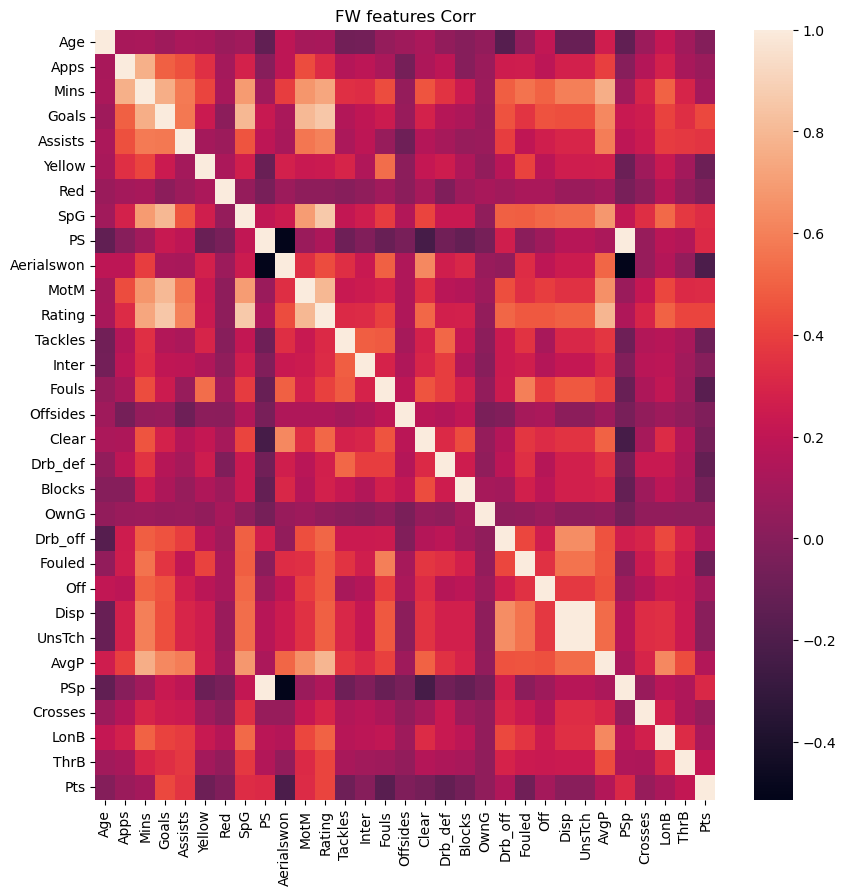

In [374]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(FW_corr_matrix)
plt.title('FW features Corr')
plt.show()

In [375]:
# Pts부분만 뽑아서 상관관계 확인

FW_corr_matrix_Pts = FW_corr_matrix[['Pts']]
FW_corr_matrix_Pts

,Pts
Age,-0.009202
Apps,0.067673
Mins,0.106832
Goals,0.425341
Assists,0.357863
Yellow,-0.088596
Red,-0.028382
SpG,0.331663
PS,0.316464
Aerialswon,-0.206679


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/2438261396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FW_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


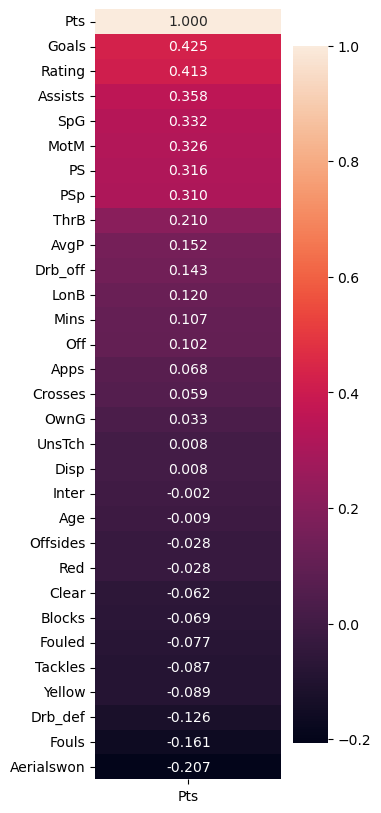

In [376]:
# 내림차순 정렬 후 heatmap으로 시각화

FW_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(FW_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [377]:
index_li = FW_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = FW_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# Goals: 0.425, Rating: 0.413, Assists: 0.358, SpG: 0.332, MotM: 0.326, PS: 0.316, PSp: 0.310, ThrB: 0.210, AvgP: 0.152, Drb_off: 0.143

Goals: 0.425
Rating: 0.413
Assists: 0.358
SpG: 0.332
MotM: 0.326
PS: 0.316
PSp: 0.310
ThrB: 0.210
AvgP: 0.152
Drb_off: 0.143


## AM

In [440]:
AM_df=pd.read_csv('./position data/AM_5seasons.csv')
AM_df.drop('Unnamed: 0', axis=1, inplace=True)
AM_df

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,James Rodríguez,Bayern Munich,32,AM,20,1143,7,3,2,0,...,0.8,0.3,0.6,0.6,43.9,87.1,1.6,2.4,0.2,1.000000
1,Serge Gnabry,Bayern Munich,28,AM,30,1774,10,5,0,0,...,0.5,0.4,1.0,1.0,26.4,83.4,0.3,1.0,0.1,1.000000
2,Franck Ribéry,Bayern Munich,41,AM,25,1168,6,3,3,0,...,0.8,0.4,1.8,1.8,28.1,82.5,0.3,1.0,0.0,1.000000
3,Ishak Belfodil,Hoffenheim,32,AM,28,1864,16,3,3,0,...,0.5,0.8,1.1,1.1,15.6,72.2,0.1,0.1,0.0,0.542373
4,Joelinton,Hoffenheim,27,AM,28,2136,7,5,5,0,...,1.0,0.1,2.2,2.2,24.7,79.3,0.2,0.3,0.1,0.542373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,Simone Verdi,Verona,31,AM,24,1093,5,0,3,0,...,1.1,0.0,1.3,1.3,13.7,75.6,0.8,1.1,0.1,0.169014
1520,Yayah Kallon,Verona,22,AM,22,856,1,1,1,0,...,1.0,0.2,0.7,0.7,9.0,68.7,0.4,0.1,0.0,0.169014
1521,Kevin Lasagna,Verona,31,AM,26,1575,1,2,2,0,...,0.8,0.6,1.3,1.3,9.1,64.4,0.1,0.1,0.0,0.169014
1522,Kevin Agudelo,Spezia,25,AM,34,2140,0,1,5,0,...,1.0,0.1,1.6,1.6,20.2,75.5,0.2,0.5,0.1,0.169014


In [379]:
AM_df.head()

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,James Rodríguez,Bayern Munich,32,AM,20,1143,7,3,2,0,...,0.8,0.3,0.6,0.6,43.9,87.1,1.6,2.4,0.2,1.000000
1,Serge Gnabry,Bayern Munich,28,AM,30,1774,10,5,0,0,...,0.5,0.4,1.0,1.0,26.4,83.4,0.3,1.0,0.1,1.000000
2,Franck Ribéry,Bayern Munich,41,AM,25,1168,6,3,3,0,...,0.8,0.4,1.8,1.8,28.1,82.5,0.3,1.0,0.0,1.000000
3,Ishak Belfodil,Hoffenheim,32,AM,28,1864,16,3,3,0,...,0.5,0.8,1.1,1.1,15.6,72.2,0.1,0.1,0.0,0.542373
4,Joelinton,Hoffenheim,27,AM,28,2136,7,5,5,0,...,1.0,0.1,2.2,2.2,24.7,79.3,0.2,0.3,0.1,0.542373


In [380]:
AM_df[['PS']]

,PS
0,87.1
1,83.4
2,82.5
3,72.2
4,79.3
...,...
1519,75.6
1520,68.7
1521,64.4
1522,75.5


In [381]:
AM_df.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'Yellow', 'Red', 'SpG', 'PS', 'Aerialswon', 'MotM', 'Rating', 'Tackles',
       'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_def', 'Blocks', 'OwnG',
       'Drb_off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AvgP', 'PSp', 'Crosses',
       'LonB', 'ThrB', 'Pts'],
      dtype='object')

In [382]:
# 수치형 데이터만 뽑아온다.

AM_numeric_df = AM_df.select_dtypes(['int64', 'float64'])

In [383]:
AM_corr_matrix = AM_numeric_df.corr()
AM_corr_matrix

,Age,Apps,Mins,Goals,Assists,Yellow,Red,SpG,PS,Aerialswon,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
Age,1.000000,0.047420,0.117944,0.187827,0.065830,0.100174,0.002663,0.167832,-0.133388,0.159921,...,0.040346,0.231106,0.051672,0.051672,0.077413,-0.151287,0.050785,0.111304,0.069156,-0.041258
Apps,0.047420,1.000000,0.809835,0.451962,0.409550,0.342271,0.010574,0.326335,0.007862,0.147059,...,0.205808,0.174722,0.208780,0.208780,0.305375,0.005128,0.127115,0.193863,0.144552,0.064920
Mins,0.117944,0.809835,1.000000,0.600510,0.542049,0.406660,0.052660,0.596370,0.011691,0.244801,...,0.444151,0.315640,0.470575,0.470575,0.567535,0.010330,0.237913,0.362643,0.284173,0.045692
Goals,0.187827,0.451962,0.600510,1.000000,0.434446,0.179440,0.007915,0.770776,-0.058196,0.194348,...,0.192317,0.448675,0.263099,0.263099,0.286885,-0.072493,-0.019738,0.135171,0.288286,0.369582
Assists,0.065830,0.409550,0.542049,0.434446,1.000000,0.145790,0.023341,0.484949,0.163642,-0.060197,...,0.255454,0.158789,0.298084,0.298084,0.563465,0.162448,0.383121,0.408369,0.473345,0.333903
Yellow,0.100174,0.342271,0.406660,0.179440,0.145790,1.000000,0.085798,0.203131,-0.103105,0.167560,...,0.360020,0.166878,0.197706,0.197706,0.234388,-0.104157,0.062465,0.231698,0.090686,-0.061383
Red,0.002663,0.010574,0.052660,0.007915,0.023341,0.085798,1.000000,0.063774,0.027232,0.018800,...,0.155785,0.005777,0.108485,0.108485,0.099035,0.027232,0.073212,0.133742,0.062100,-0.043451
SpG,0.167832,0.326335,0.596370,0.770776,0.484949,0.203131,0.063774,1.000000,-0.053895,0.202862,...,0.303903,0.445644,0.374433,0.374433,0.410933,-0.060087,0.170006,0.284443,0.354618,0.298670
PS,-0.133388,0.007862,0.011691,-0.058196,0.163642,-0.103105,0.027232,-0.053895,1.000000,-0.540166,...,0.101316,-0.313197,0.067547,0.067547,0.471422,0.991431,0.204473,0.334100,0.191801,0.313359
Aerialswon,0.159921,0.147059,0.244801,0.194348,-0.060197,0.167560,0.018800,0.202862,-0.540166,1.000000,...,0.119584,0.315939,0.110630,0.110630,-0.092899,-0.536477,-0.265573,-0.158460,-0.113872,-0.131110


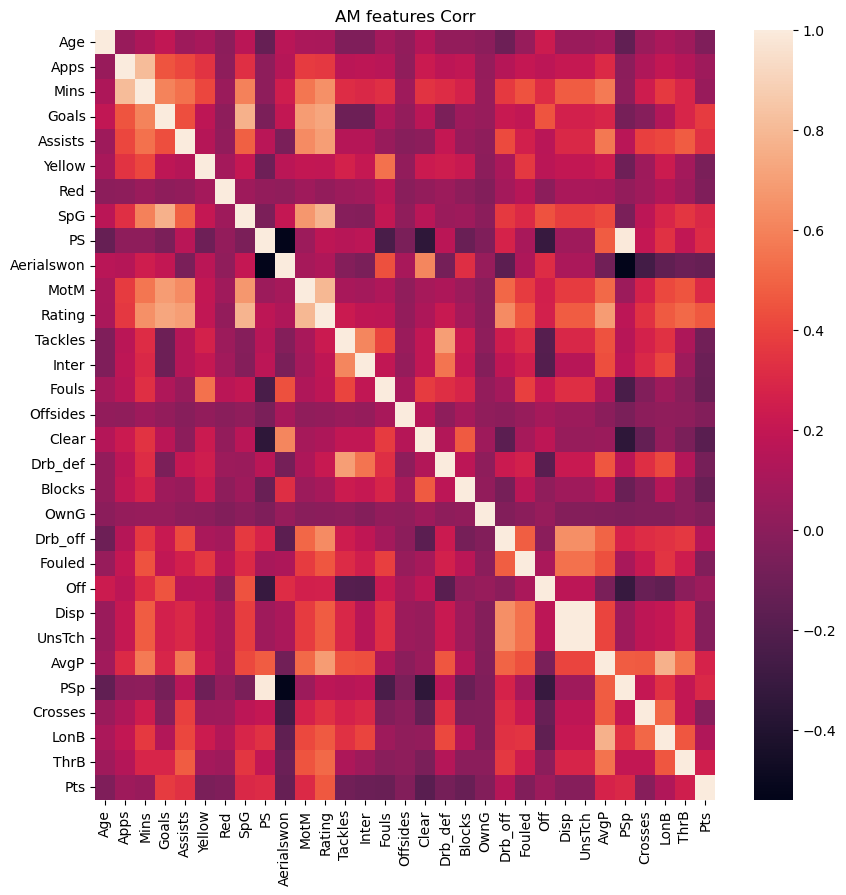

In [384]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(AM_corr_matrix)
plt.title('AM features Corr')
plt.show()

In [385]:
# Pts부분만 뽑아서 상관관계 확인

AM_corr_matrix_Pts = AM_corr_matrix[['Pts']]
AM_corr_matrix_Pts

,Pts
Age,-0.041258
Apps,0.064920
Mins,0.045692
Goals,0.369582
Assists,0.333903
Yellow,-0.061383
Red,-0.043451
SpG,0.298670
PS,0.313359
Aerialswon,-0.131110


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/478085803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


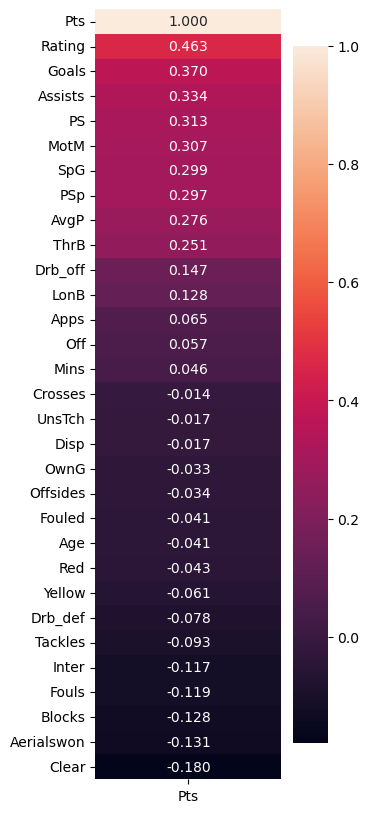

In [386]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

AM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(AM_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [387]:
index_li = AM_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = AM_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# Rating: 0.463 Goals: 0.370 Assists: 0.334 PS: 0.313 MotM: 0.307 SpG: 0.299 PSp: 0.297 AvgP: 0.276 ThrB: 0.251 Drb_off: 0.147

Rating: 0.463
Goals: 0.370
Assists: 0.334
PS: 0.313
MotM: 0.307
SpG: 0.299
PSp: 0.297
AvgP: 0.276
ThrB: 0.251
Drb_off: 0.147


## M

In [441]:
M_df=pd.read_csv('./position data/M_5seasons.csv')
M_df.drop('Unnamed: 0', axis=1, inplace=True)
M_df

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Thiago Alcântara,Bayern Munich,33,M,30,2409,2,6,5,0,...,1.1,0.0,0.9,0.9,83.6,91.8,0.5,7.3,0.1,1.000000
1,Kingsley Coman,Bayern Munich,27,M,21,1392,6,4,2,0,...,2.0,0.1,1.6,1.6,29.4,85.0,0.7,0.5,0.0,1.000000
2,Thomas Müller,Bayern Munich,34,M,32,2391,6,9,1,0,...,0.8,0.5,0.5,0.5,37.5,74.7,0.2,1.2,0.1,1.000000
3,Leon Goretzka,Bayern Munich,29,M,30,2021,8,4,3,0,...,0.7,0.0,0.6,0.6,38.4,87.5,0.0,1.2,0.0,1.000000
4,Renato Sanches,Bayern Munich,26,M,17,567,1,1,1,1,...,0.7,0.1,0.5,0.5,19.9,90.8,0.4,0.8,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Miguel Veloso,Verona,37,M,22,1169,0,0,6,0,...,0.4,0.0,0.3,0.3,24.0,76.2,1.0,1.9,0.0,0.169014
1569,Emil Holm,Spezia,23,M,20,1398,1,1,4,0,...,0.8,0.1,1.1,1.1,20.7,61.4,0.4,0.4,0.0,0.169014
1570,Mehdi Bourabia,Spezia,32,M,37,2796,1,3,3,0,...,0.5,0.0,0.7,0.7,32.5,79.9,0.4,1.2,0.1,0.169014
1571,Albin Ekdal,Spezia,34,M,31,1732,0,2,4,1,...,0.9,0.0,0.5,0.5,25.0,77.8,0.1,0.6,0.0,0.169014


In [389]:
M_df.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'Yellow', 'Red', 'SpG', 'PS', 'Aerialswon', 'MotM', 'Rating', 'Tackles',
       'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_def', 'Blocks', 'OwnG',
       'Drb_off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AvgP', 'PSp', 'Crosses',
       'LonB', 'ThrB', 'Pts'],
      dtype='object')

In [390]:
# 수치형 데이터만 뽑아온다.

M_numeric_df = M_df.select_dtypes(['int64', 'float64'])

In [391]:
M_corr_matrix = M_numeric_df.corr()
M_corr_matrix

,Age,Apps,Mins,Goals,Assists,Yellow,Red,SpG,PS,Aerialswon,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
Age,1.000000,-0.028361,0.041240,0.074383,0.041933,0.032660,0.048105,0.015245,0.024145,0.098706,...,-0.029765,0.127008,-0.103646,-0.103646,0.145793,0.024145,0.097500,0.153910,0.036528,0.012316
Apps,-0.028361,1.000000,0.827897,0.352401,0.377126,0.312585,0.038088,0.258208,0.043869,0.107808,...,0.182891,0.083337,0.165916,0.165916,0.296448,0.043869,0.203868,0.212322,0.137011,0.052789
Mins,0.041240,0.827897,1.000000,0.401091,0.424012,0.406516,0.084521,0.384795,0.062196,0.250458,...,0.358016,0.089554,0.316511,0.316511,0.556517,0.062196,0.288892,0.407959,0.214416,-0.006115
Goals,0.074383,0.352401,0.401091,1.000000,0.463919,-0.044089,0.047489,0.744724,-0.113308,0.053451,...,0.193569,0.521448,0.360470,0.360470,0.054147,-0.113308,0.222428,-0.051218,0.240618,0.258986
Assists,0.041933,0.377126,0.424012,0.463919,1.000000,-0.015881,0.036690,0.487945,-0.006497,-0.088749,...,0.193241,0.233829,0.295165,0.295165,0.244189,-0.006497,0.521487,0.170453,0.439298,0.320826
Yellow,0.032660,0.312585,0.406516,-0.044089,-0.015881,1.000000,0.086881,-0.035416,0.067559,0.281945,...,0.290993,-0.158283,0.018183,0.018183,0.338776,0.067559,0.000298,0.337772,0.003466,-0.141549
Red,0.048105,0.038088,0.084521,0.047489,0.036690,0.086881,1.000000,0.069853,-0.012650,0.070256,...,0.149163,0.006941,0.076159,0.076159,0.090137,-0.012650,0.097074,0.150534,0.086168,-0.057736
SpG,0.015245,0.258208,0.384795,0.744724,0.487945,-0.035416,0.069853,1.000000,-0.184609,0.084604,...,0.296277,0.470700,0.474788,0.474788,0.080372,-0.184609,0.322880,0.025433,0.293100,0.222915
PS,0.024145,0.043869,0.062196,-0.113308,-0.006497,0.067559,-0.012650,-0.184609,1.000000,-0.294344,...,-0.023685,-0.313989,-0.115766,-0.115766,0.571363,1.000000,-0.127291,0.373762,0.071858,0.366730
Aerialswon,0.098706,0.107808,0.250458,0.053451,-0.088749,0.281945,0.070256,0.084604,-0.294344,1.000000,...,0.189370,0.036465,0.035162,0.035162,0.088021,-0.294344,-0.171063,0.021615,-0.085556,-0.125277


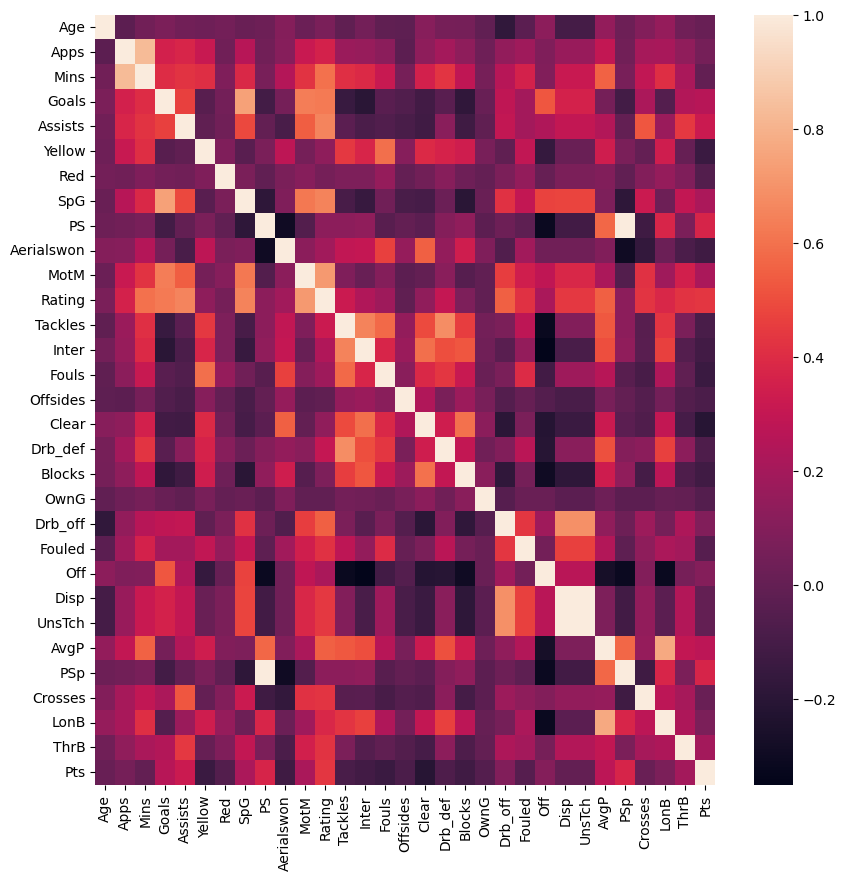

In [392]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(M_corr_matrix)
plt.show()

In [393]:
# Pts부분만 뽑아서 상관관계 확인

M_corr_matrix_Pts = M_corr_matrix[['Pts']]
M_corr_matrix_Pts

,Pts
Age,0.012316
Apps,0.052789
Mins,-0.006115
Goals,0.258986
Assists,0.320826
Yellow,-0.141549
Red,-0.057736
SpG,0.222915
PS,0.366730
Aerialswon,-0.125277


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1254075917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


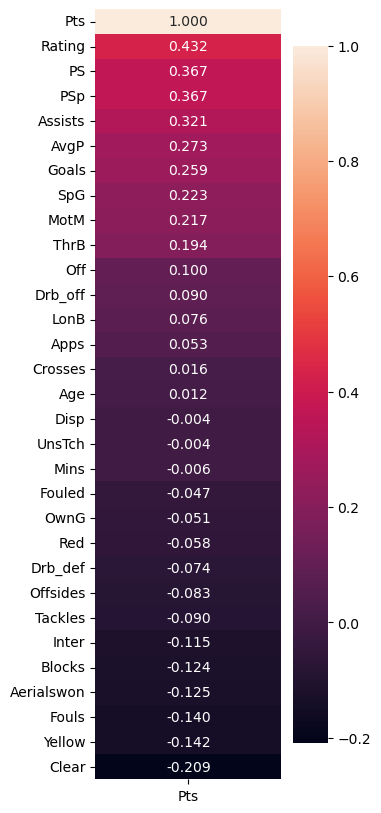

In [394]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

M_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(M_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [395]:
index_li = M_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = M_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# Rating: 0.432 PS: 0.367 PSp: 0.367 Assists: 0.321 AvgP: 0.273 Goals: 0.259 SpG: 0.223 MotM: 0.217 ThrB: 0.194 Off: 0.100

Rating: 0.432
PS: 0.367
PSp: 0.367
Assists: 0.321
AvgP: 0.273
Goals: 0.259
SpG: 0.223
MotM: 0.217
ThrB: 0.194
Off: 0.100


## DM

In [442]:
DM_df=pd.read_csv('./position data/DM_5seasons.csv')
DM_df.drop('Unnamed: 0', axis=1, inplace=True)
DM_df

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Diego Demme,RB Leipzig,32,DM,26,2061,0,2,4,0,...,2.0,0.0,0.7,0.7,56.4,81.5,0.4,3.0,0.1,0.796610
1,Gelson Fernandes,Eintracht Frankfurt,37,DM,28,2236,1,0,9,1,...,0.2,0.0,0.5,0.5,30.1,83.4,0.0,0.4,0.0,0.593220
2,Thomas Delaney,Borussia Dortmund,32,DM,30,2290,3,5,7,0,...,0.8,0.1,0.5,0.5,53.6,85.5,0.1,2.7,0.0,0.966102
3,Julian Baumgartlinger,Bayer Leverkusen,36,DM,21,1557,0,1,2,0,...,0.9,0.0,0.7,0.7,65.3,89.6,0.0,3.5,0.0,0.661017
4,Marko Grujic,Hertha Berlin,28,DM,22,1780,5,1,5,0,...,1.0,0.0,0.9,0.9,43.1,81.9,0.0,1.6,0.0,0.406780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Walace,Udinese,29,DM,37,3200,0,1,6,0,...,1.1,0.0,0.8,0.8,46.9,84.7,0.1,3.2,0.0,0.380282
425,Morten Hjulmand,Lecce,24,DM,35,2963,0,4,9,1,...,1.1,0.0,0.5,0.5,37.2,79.3,0.1,2.7,0.0,0.239437
426,Alexis Blin,Lecce,27,DM,35,2380,1,0,8,0,...,0.9,0.0,0.4,0.4,26.1,81.3,0.1,0.8,0.0,0.239437
427,Harry Winks,Sampdoria,28,DM,20,1719,0,0,2,0,...,0.7,0.1,0.8,0.8,45.7,85.4,0.6,2.8,0.1,0.000000


In [443]:
DM_df.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'Yellow', 'Red', 'SpG', 'PS', 'Aerialswon', 'MotM', 'Rating', 'Tackles',
       'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_def', 'Blocks', 'OwnG',
       'Drb_off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AvgP', 'PSp', 'Crosses',
       'LonB', 'ThrB', 'Pts'],
      dtype='object')

In [398]:
# 수치형 데이터만 뽑아온다.

DM_numeric_df = DM_df.select_dtypes(['int64', 'float64'])

In [399]:
DM_corr_matrix = DM_numeric_df.corr()
DM_corr_matrix

,Age,Apps,Mins,Goals,Assists,Yellow,Red,SpG,PS,Aerialswon,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
Age,1.000000,0.017426,0.139560,0.052100,0.092095,0.197664,-0.017526,-0.081785,-0.007949,0.167603,...,0.070228,0.027526,-0.020064,-0.020064,0.271421,-0.007949,0.081741,0.202130,0.039951,-0.013605
Apps,0.017426,1.000000,0.833396,0.376802,0.276377,0.393186,0.041269,0.307514,-0.010394,0.097324,...,0.199543,0.004243,0.157123,0.157123,0.303094,-0.010394,0.150069,0.309859,0.119047,0.000805
Mins,0.139560,0.833396,1.000000,0.381499,0.356334,0.466150,0.001141,0.410236,-0.017409,0.235100,...,0.371734,0.081547,0.361191,0.361191,0.578224,-0.017409,0.217014,0.503462,0.197567,-0.067125
Goals,0.052100,0.376802,0.381499,1.000000,0.243545,0.151766,-0.055159,0.518408,0.025971,0.103346,...,0.113023,0.143074,0.163485,0.163485,0.234037,0.025971,0.180545,0.193580,0.186665,0.139345
Assists,0.092095,0.276377,0.356334,0.243545,1.000000,0.148606,-0.066338,0.291462,0.006131,-0.048297,...,0.170647,0.224606,0.119072,0.119072,0.297261,0.006131,0.514441,0.283960,0.369626,0.124568
Yellow,0.197664,0.393186,0.466150,0.151766,0.148606,1.000000,0.006928,0.200548,-0.062387,0.232421,...,0.251549,-0.054298,0.086467,0.086467,0.269224,-0.062387,0.132018,0.315277,0.072716,-0.109576
Red,-0.017526,0.041269,0.001141,-0.055159,-0.066338,0.006928,1.000000,0.025160,0.048390,-0.007715,...,0.055424,-0.056833,0.017919,0.017919,0.021433,0.048390,-0.047366,0.047513,0.009562,0.050947
SpG,-0.081785,0.307514,0.410236,0.518408,0.291462,0.200548,0.025160,1.000000,-0.180478,0.260502,...,0.259936,0.160655,0.349486,0.349486,0.171784,-0.180478,0.260279,0.281824,0.101222,-0.058375
PS,-0.007949,-0.010394,-0.017409,0.025971,0.006131,-0.062387,0.048390,-0.180478,1.000000,-0.416260,...,0.010933,-0.060684,-0.020105,-0.020105,0.482977,1.000000,-0.095690,0.154890,0.144281,0.452185
Aerialswon,0.167603,0.097324,0.235100,0.103346,-0.048297,0.232421,-0.007715,0.260502,-0.416260,1.000000,...,0.188593,0.077108,0.164529,0.164529,0.051456,-0.416260,-0.182479,0.026830,-0.116789,-0.129628


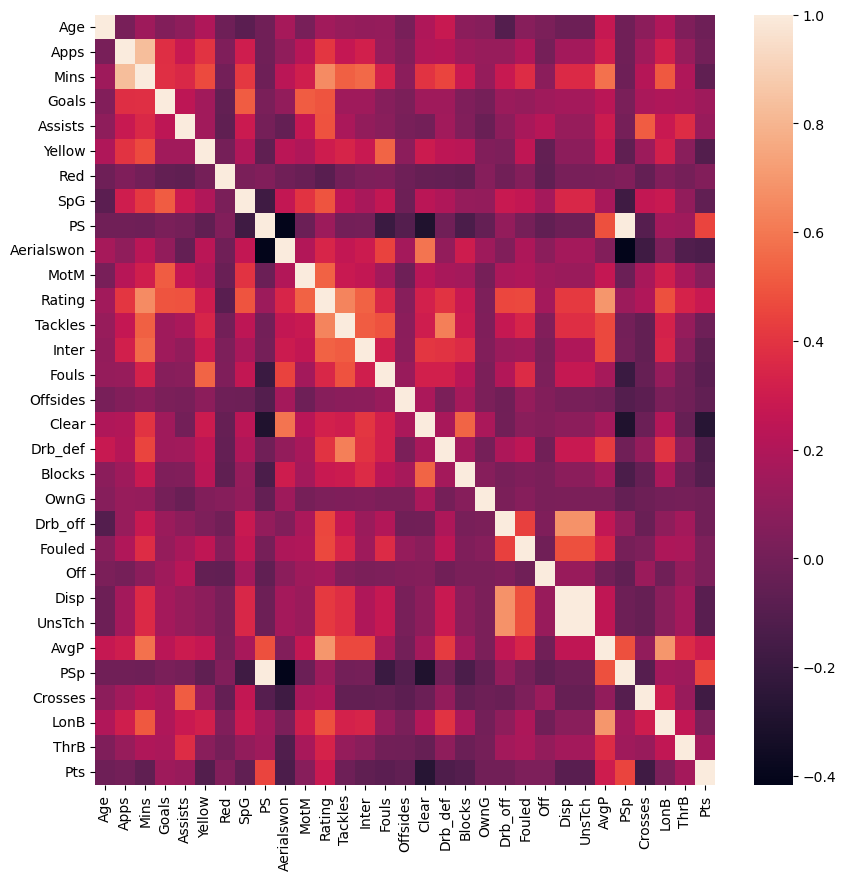

In [400]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(DM_corr_matrix)
plt.show()

In [401]:
# Pts부분만 뽑아서 상관관계 확인

DM_corr_matrix_Pts = DM_corr_matrix[['Pts']]
DM_corr_matrix_Pts

,Pts
Age,-0.013605
Apps,0.000805
Mins,-0.067125
Goals,0.139345
Assists,0.124568
Yellow,-0.109576
Red,0.050947
SpG,-0.058375
PS,0.452185
Aerialswon,-0.129628


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1552767479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


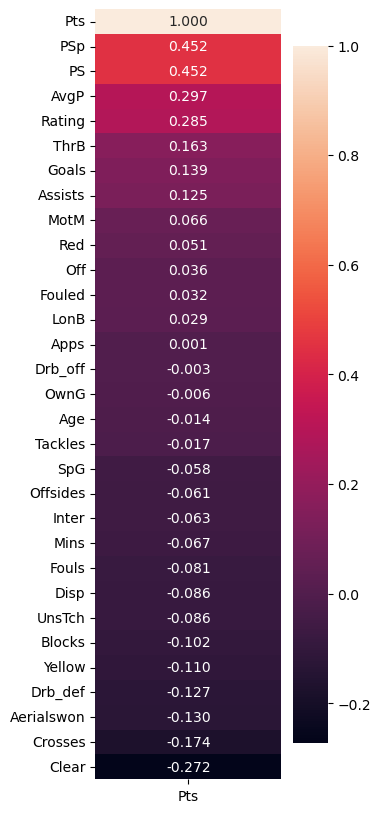

In [402]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

DM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(DM_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [403]:
index_li = DM_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = DM_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# PSp: 0.452 PS: 0.452 AvgP: 0.297 Rating: 0.285 ThrB: 0.163 Goals: 0.139 Assists: 0.125 MotM: 0.066 Red: 0.051 Off: 0.036

PSp: 0.452
PS: 0.452
AvgP: 0.297
Rating: 0.285
ThrB: 0.163
Goals: 0.139
Assists: 0.125
MotM: 0.066
Red: 0.051
Off: 0.036


## D

In [444]:
D_df=pd.read_csv('./position data/D_5seasons.csv')
D_df.drop('Unnamed: 0', axis=1, inplace=True)
D_df

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Joshua Kimmich,Bayern Munich,29,D,34,3060,2,13,4,0,...,1.5,0.1,0.7,0.7,74.1,90.5,2.2,4.2,0.1,1.000000
1,Mats Hummels,Bayern Munich,35,D,21,1776,1,1,1,0,...,0.4,0.0,0.1,0.1,82.6,89.4,0.0,4.5,0.1,1.000000
2,David Alaba,Bayern Munich,31,D,31,2534,3,3,4,0,...,0.4,0.2,0.6,0.6,56.9,85.5,0.7,1.7,0.0,1.000000
3,Niklas Süle,Bayern Munich,28,D,31,2652,2,0,3,0,...,0.2,0.0,0.2,0.2,82.6,92.9,0.0,5.3,0.0,1.000000
4,Javi Martínez,Bayern Munich,35,D,21,1313,3,0,3,0,...,0.6,0.0,0.1,0.1,43.0,87.8,0.0,1.9,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,Ethan Ampadu,Spezia,23,D,31,2649,0,1,8,1,...,0.6,0.0,0.2,0.2,47.9,81.5,0.2,3.0,0.1,0.169014
3181,Arkadiusz Reca,Spezia,28,D,30,2171,1,1,5,0,...,0.5,0.1,0.3,0.3,28.3,71.5,0.9,1.3,0.0,0.169014
3182,Kelvin Amian,Spezia,26,D,30,2374,0,1,5,1,...,0.2,0.0,0.6,0.6,28.2,75.3,0.4,1.2,0.0,0.169014
3183,Mattia Caldara,Spezia,30,D,20,1251,0,0,6,0,...,0.5,0.1,0.2,0.2,29.4,77.0,0.0,1.5,0.0,0.169014


In [405]:
D_df.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'Yellow', 'Red', 'SpG', 'PS', 'Aerialswon', 'MotM', 'Rating', 'Tackles',
       'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_def', 'Blocks', 'OwnG',
       'Drb_off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AvgP', 'PSp', 'Crosses',
       'LonB', 'ThrB', 'Pts'],
      dtype='object')

In [406]:
# 수치형 데이터만 뽑아온다.

D_numeric_df = D_df.select_dtypes(['int64', 'float64'])

In [407]:
D_corr_matrix = D_numeric_df.corr()
D_corr_matrix

,Age,Apps,Mins,Goals,Assists,Yellow,Red,SpG,PS,Aerialswon,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
Age,1.000000,0.012327,0.074776,0.016853,-0.026297,0.074261,0.027317,-0.021223,-0.013709,0.143279,...,-0.046256,-0.001962,-0.154950,-0.154950,0.068844,-0.009581,0.015824,0.205974,0.004086,-0.007094
Apps,0.012327,1.000000,0.863247,0.292725,0.258621,0.337911,0.018824,0.219518,0.042188,0.129757,...,0.084250,0.100309,0.053276,0.053276,0.214406,0.045652,0.074014,0.193347,0.079651,0.056835
Mins,0.074776,0.863247,1.000000,0.254354,0.200420,0.373364,0.054919,0.184194,0.104060,0.341185,...,0.124964,0.046968,-0.025517,-0.025517,0.459762,0.107871,0.023971,0.399736,0.077302,0.014387
Goals,0.016853,0.292725,0.254354,1.000000,0.280987,0.038786,-0.011541,0.635060,-0.009728,0.057577,...,0.123905,0.362766,0.242894,0.242894,0.068186,-0.009585,0.115924,0.014294,0.137808,0.170515
Assists,-0.026297,0.258621,0.200420,0.280987,1.000000,0.012030,-0.079498,0.349151,-0.108320,-0.273234,...,0.196630,0.319739,0.366908,0.366908,0.010102,-0.112377,0.590475,-0.137725,0.262304,0.208650
Yellow,0.074261,0.337911,0.373364,0.038786,0.012030,1.000000,0.096461,0.054781,-0.008743,0.187889,...,0.196869,-0.028439,-0.028960,-0.028960,0.126406,-0.007374,-0.081852,0.207138,0.043687,-0.057548
Red,0.027317,0.018824,0.054919,-0.011541,-0.079498,0.096461,1.000000,-0.022603,0.040410,0.100043,...,0.038584,-0.046442,-0.075633,-0.075633,0.049168,0.040410,-0.102115,0.101333,-0.028439,-0.060917
SpG,-0.021223,0.219518,0.184194,0.635060,0.349151,0.054781,-0.022603,1.000000,-0.100723,0.045996,...,0.216692,0.384066,0.401980,0.401980,0.031205,-0.100774,0.226110,-0.016599,0.215925,0.136390
PS,-0.013709,0.042188,0.104060,-0.009728,-0.108320,-0.008743,0.040410,-0.100723,1.000000,0.074845,...,-0.106231,-0.190893,-0.264436,-0.264436,0.656877,0.992253,-0.326880,0.338454,0.067214,0.481692
Aerialswon,0.143279,0.129757,0.341185,0.057577,-0.273234,0.187889,0.100043,0.045996,0.074845,1.000000,...,-0.085088,-0.115954,-0.341804,-0.341804,0.371251,0.081926,-0.422812,0.438701,-0.080837,-0.036850


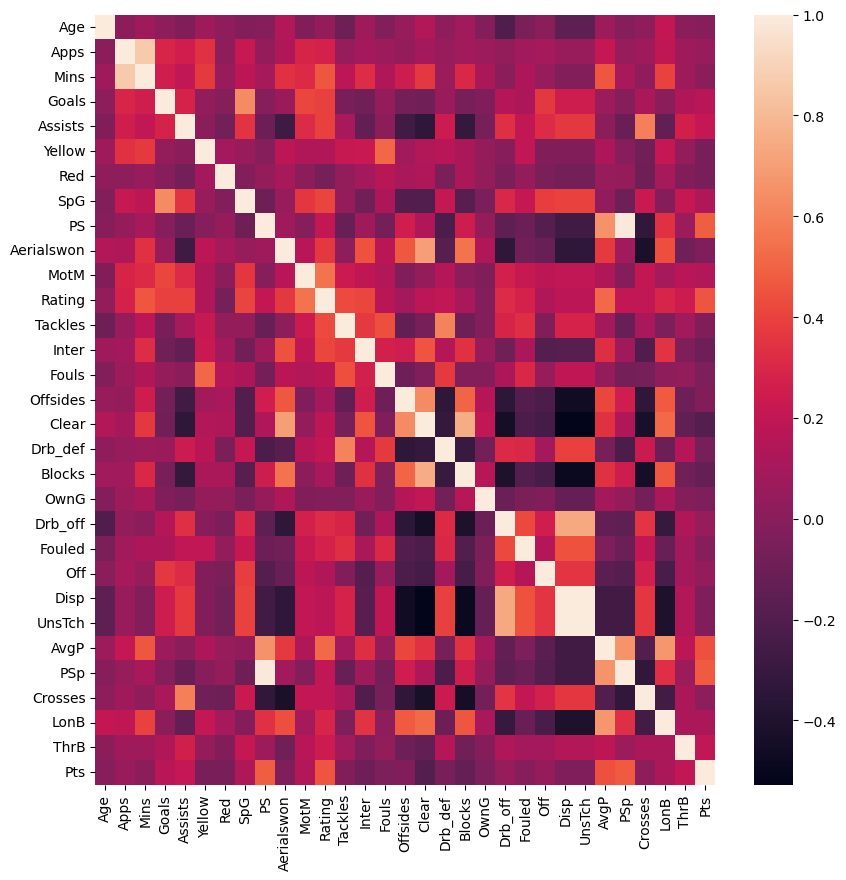

In [408]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(D_corr_matrix)
plt.show()

In [409]:
# Pts부분만 뽑아서 상관관계 확인

D_corr_matrix_Pts = D_corr_matrix[['Pts']]
D_corr_matrix_Pts

,Pts
Age,-0.007094
Apps,0.056835
Mins,0.014387
Goals,0.170515
Assists,0.208650
Yellow,-0.057548
Red,-0.060917
SpG,0.136390
PS,0.481692
Aerialswon,-0.036850


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/1558401655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


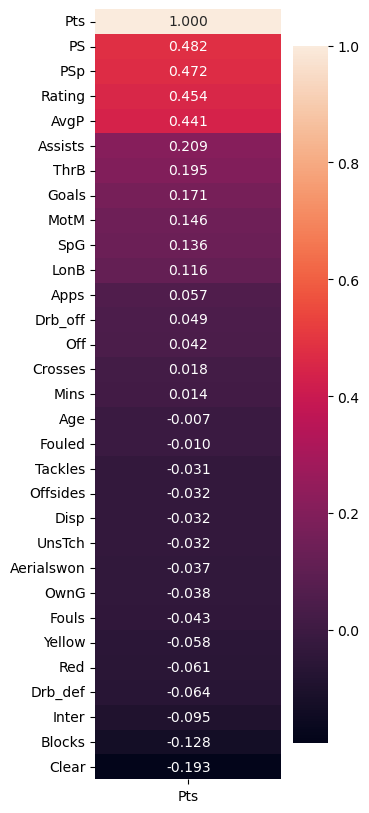

In [410]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

D_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(D_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [411]:
index_li = DM_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = DM_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# PSp: 0.452 PS: 0.452 AvgP: 0.297 Rating: 0.285 ThrB: 0.163 Goals: 0.139 Assists: 0.125 MotM: 0.066 Red: 0.051 Off: 0.036    

PSp: 0.452
PS: 0.452
AvgP: 0.297
Rating: 0.285
ThrB: 0.163
Goals: 0.139
Assists: 0.125
MotM: 0.066
Red: 0.051
Off: 0.036


## GK

In [445]:
GK_df=pd.read_csv('./position data/GK_5seasons.csv')
GK_df.drop('Unnamed: 0', axis=1, inplace=True)
GK_df

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Manuel Neuer,Bayern Munich,38,GK,26,2303,0,0,1,0,...,0.1,0.0,0.0,0.0,31.1,81.6,0.0,5.5,0.0,1.000000
1,Oliver Baumann,Hoffenheim,33,GK,33,2970,0,1,0,0,...,0.2,0.0,0.0,0.0,33.1,76.4,0.0,6.0,0.0,0.542373
2,Péter Gulácsi,RB Leipzig,33,GK,33,2926,0,0,0,0,...,0.1,0.0,0.0,0.0,27.2,58.9,0.0,7.9,0.0,0.796610
3,Kevin Trapp,Eintracht Frankfurt,33,GK,33,2938,0,0,2,0,...,0.2,0.0,0.0,0.0,33.3,63.6,0.0,11.3,0.0,0.593220
4,Roman Bürki,Borussia Dortmund,33,GK,32,2880,0,0,1,0,...,0.3,0.0,0.0,0.0,28.2,65.8,0.0,5.4,0.0,0.966102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Vanja Milinkovic-Savic,Torino,27,GK,38,3420,0,0,4,0,...,0.1,0.0,0.0,0.0,42.3,57.9,0.0,8.6,0.0,0.478873
481,Emil Audero,Sampdoria,27,GK,25,2250,0,0,1,0,...,0.1,0.0,0.0,0.0,32.4,63.6,0.0,8.4,0.0,0.000000
482,Marco Carnesecchi,Cremonese,23,GK,27,2430,0,1,1,0,...,0.2,0.0,0.0,0.0,30.1,53.1,0.0,6.9,0.0,0.112676
483,Lorenzo Montipò,Verona,28,GK,37,3330,0,0,2,0,...,0.1,0.0,0.0,0.0,28.8,58.5,0.0,9.9,0.0,0.169014


In [413]:
GK_df.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'Yellow', 'Red', 'SpG', 'PS', 'Aerialswon', 'MotM', 'Rating', 'Tackles',
       'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_def', 'Blocks', 'OwnG',
       'Drb_off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AvgP', 'PSp', 'Crosses',
       'LonB', 'ThrB', 'Pts'],
      dtype='object')

In [414]:
# 수치형 데이터만 뽑아온다.

GK_numeric_df = GK_df.select_dtypes(['int64', 'float64'])

In [415]:
GK_corr_matrix = GK_numeric_df.corr()
GK_corr_matrix

,Age,Apps,Mins,Goals,Assists,Yellow,Red,SpG,PS,Aerialswon,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
Age,1.000000,-0.013058,-0.015142,-0.000238,-0.056771,-0.007440,0.039473,0.009659,-0.019385,0.021484,...,-0.081648,NaN,-0.035195,-0.035195,-0.013629,-0.019385,NaN,0.129702,NaN,0.021881
Apps,-0.013058,1.000000,0.998308,0.031914,0.077898,0.207139,-0.058228,0.061292,-0.013378,-0.010407,...,0.068322,NaN,-0.062275,-0.062275,-0.026839,-0.013378,NaN,0.027154,NaN,0.138456
Mins,-0.015142,0.998308,1.000000,0.032209,0.075563,0.203984,-0.077635,0.062133,-0.014216,-0.009216,...,0.068009,NaN,-0.059034,-0.059034,-0.018036,-0.014216,NaN,0.031534,NaN,0.137271
Goals,-0.000238,0.031914,0.032209,1.000000,-0.020911,-0.002678,-0.022339,0.252295,0.029069,0.016181,...,0.008159,NaN,-0.008052,-0.008052,-0.002386,0.029069,NaN,-0.021831,NaN,0.023166
Assists,-0.056771,0.077898,0.075563,-0.020911,1.000000,-0.010932,-0.020397,-0.027052,0.100863,-0.032012,...,0.024467,NaN,-0.027052,-0.027052,0.147504,0.100863,NaN,0.016733,NaN,0.114428
Yellow,-0.007440,0.207139,0.203984,-0.002678,-0.010932,1.000000,0.009494,-0.014484,-0.140623,0.117677,...,0.155665,NaN,0.084688,0.084688,0.009967,-0.140623,NaN,0.037304,NaN,-0.155564
Red,0.039473,-0.058228,-0.077635,-0.022339,-0.020397,0.009494,1.000000,-0.028900,-0.000169,0.058074,...,0.058388,NaN,-0.028900,-0.028900,-0.085465,-0.000169,NaN,-0.061649,NaN,-0.026462
SpG,0.009659,0.061292,0.062133,0.252295,-0.027052,-0.014484,-0.028900,1.000000,-0.047419,0.020932,...,0.044124,NaN,-0.010417,-0.010417,0.032744,-0.047419,NaN,0.062865,NaN,-0.053850
PS,-0.019385,-0.013378,-0.014216,0.029069,0.100863,-0.140623,-0.000169,-0.047419,1.000000,-0.207701,...,-0.147568,NaN,-0.004665,-0.004665,0.204285,1.000000,NaN,-0.436800,NaN,0.568223
Aerialswon,0.021484,-0.010407,-0.009216,0.016181,-0.032012,0.117677,0.058074,0.020932,-0.207701,1.000000,...,0.358235,NaN,0.036315,0.036315,0.033457,-0.207701,NaN,0.109483,NaN,-0.179330


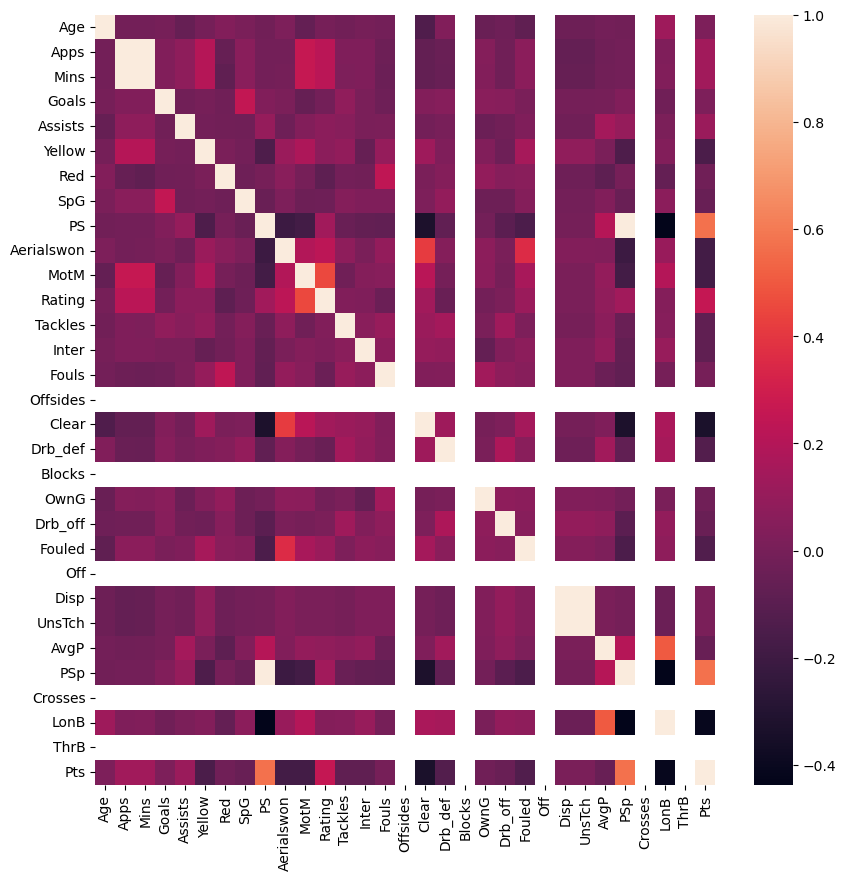

In [416]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(GK_corr_matrix)
plt.show()

In [417]:
GK_numeric_df.drop(['Offsides', 'Blocks', 'Off', 'Crosses', 'ThrB'], axis=1, inplace=True)

In [418]:
GK_corr_matrix = GK_numeric_df.corr()
GK_corr_matrix

,Age,Apps,Mins,Goals,Assists,Yellow,Red,SpG,PS,Aerialswon,...,Drb_def,OwnG,Drb_off,Fouled,Disp,UnsTch,AvgP,PSp,LonB,Pts
Age,1.000000,-0.013058,-0.015142,-0.000238,-0.056771,-0.007440,0.039473,0.009659,-0.019385,0.021484,...,0.029964,-0.048774,-0.028546,-0.081648,-0.035195,-0.035195,-0.013629,-0.019385,0.129702,0.021881
Apps,-0.013058,1.000000,0.998308,0.031914,0.077898,0.207139,-0.058228,0.061292,-0.013378,-0.010407,...,-0.046828,0.042339,-0.021745,0.068322,-0.062275,-0.062275,-0.026839,-0.013378,0.027154,0.138456
Mins,-0.015142,0.998308,1.000000,0.032209,0.075563,0.203984,-0.077635,0.062133,-0.014216,-0.009216,...,-0.050692,0.037658,-0.022162,0.068009,-0.059034,-0.059034,-0.018036,-0.014216,0.031534,0.137271
Goals,-0.000238,0.031914,0.032209,1.000000,-0.020911,-0.002678,-0.022339,0.252295,0.029069,0.016181,...,0.051171,0.060533,0.054259,0.008159,-0.008052,-0.008052,-0.002386,0.029069,-0.021831,0.023166
Assists,-0.056771,0.077898,0.075563,-0.020911,1.000000,-0.010932,-0.020397,-0.027052,0.100863,-0.032012,...,0.005869,-0.038976,-0.021070,0.024467,-0.027052,-0.027052,0.147504,0.100863,0.016733,0.114428
Yellow,-0.007440,0.207139,0.203984,-0.002678,-0.010932,1.000000,0.009494,-0.014484,-0.140623,0.117677,...,0.026810,0.032728,-0.027998,0.155665,0.084688,0.084688,0.009967,-0.140623,0.037304,-0.155564
Red,0.039473,-0.058228,-0.077635,-0.022339,-0.020397,0.009494,1.000000,-0.028900,-0.000169,0.058074,...,0.043015,0.088508,0.051202,0.058388,-0.028900,-0.028900,-0.085465,-0.000169,-0.061649,-0.026462
SpG,0.009659,0.061292,0.062133,0.252295,-0.027052,-0.014484,-0.028900,1.000000,-0.047419,0.020932,...,0.093236,-0.033070,-0.033283,0.044124,-0.010417,-0.010417,0.032744,-0.047419,0.062865,-0.053850
PS,-0.019385,-0.013378,-0.014216,0.029069,0.100863,-0.140623,-0.000169,-0.047419,1.000000,-0.207701,...,-0.072380,-0.015290,-0.096113,-0.147568,-0.004665,-0.004665,0.204285,1.000000,-0.436800,0.568223
Aerialswon,0.021484,-0.010407,-0.009216,0.016181,-0.032012,0.117677,0.058074,0.020932,-0.207701,1.000000,...,0.042932,0.071540,0.010173,0.358235,0.036315,0.036315,0.033457,-0.207701,0.109483,-0.179330


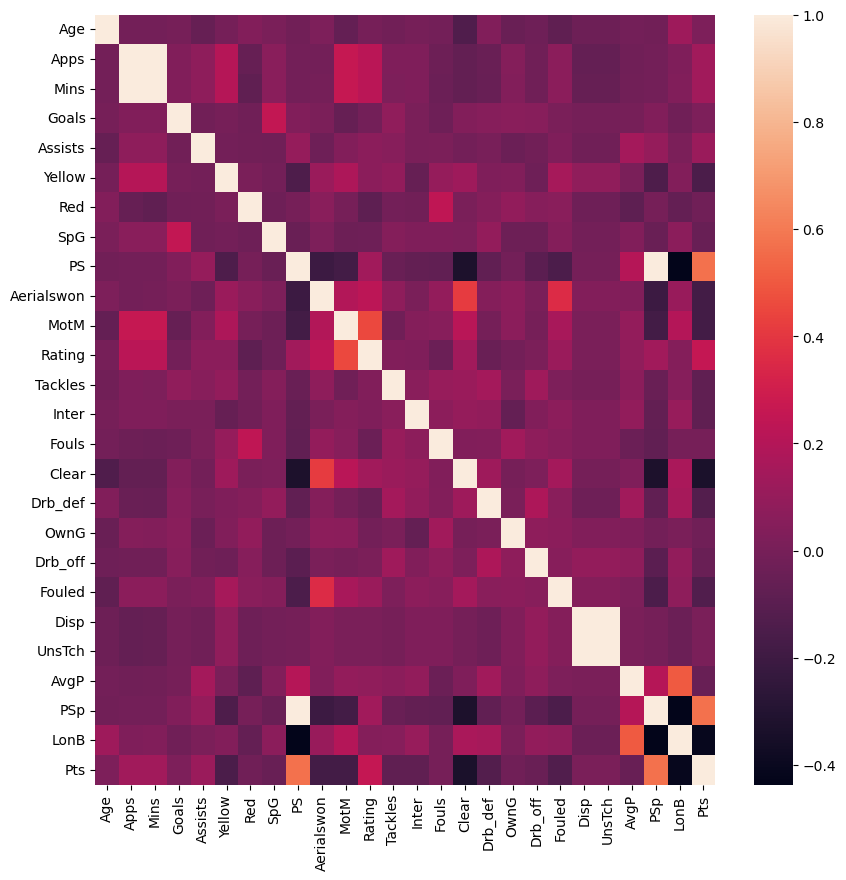

In [419]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(GK_corr_matrix)
plt.show()

In [420]:
# Pts부분만 뽑아서 상관관계 확인

GK_corr_matrix_Pts = GK_corr_matrix[['Pts']]
GK_corr_matrix_Pts

,Pts
Age,0.021881
Apps,0.138456
Mins,0.137271
Goals,0.023166
Assists,0.114428
Yellow,-0.155564
Red,-0.026462
SpG,-0.053850
PS,0.568223
Aerialswon,-0.179330


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77161/3614864672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


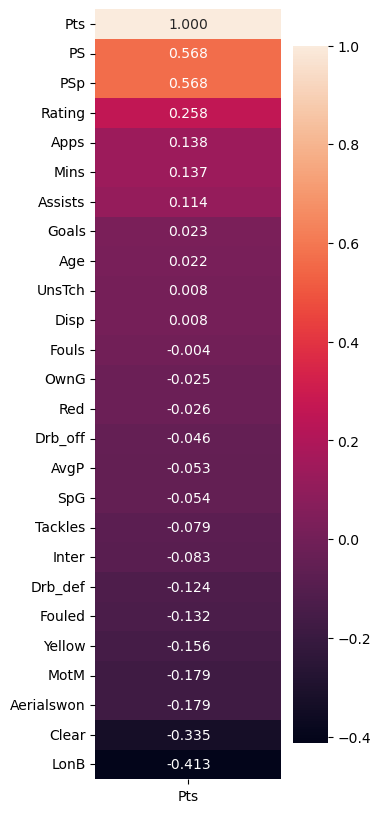

In [421]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(GK_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [422]:
index_li = GK_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = GK_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# PS: 0.568 PSp: 0.568 Rating: 0.258 Apps: 0.138 Mins: 0.137 Assists: 0.114 Goals: 0.023 Age: 0.022 UnsTch: 0.008 Disp: 0.008

PS: 0.568
PSp: 0.568
Rating: 0.258
Apps: 0.138
Mins: 0.137
Assists: 0.114
Goals: 0.023
Age: 0.022
UnsTch: 0.008
Disp: 0.008
